# Conditional Generative Adversarial Networks
Rather then just generating random samples, we can condition GAN's to some vector z by simply feeding the data, y that we wish to condition on to both the generator and discriminator. Hence, our Generator and Discriminator are now G(z,y) and D(x,y) respectively. Usually, y can be any type of additional inputs, for example, class labels.

We can see it with a probabilistic point of view. G(z,y) is modeling the distribution of our data, given z and y, that is, our data is generated with this scheme x∼G(x|z,y).

Similarly, for the Discriminator, now it tries to find discriminating label for x and xG, that are modeled with d∼D(d|x,y).

Hence, we could see that both D and G is jointly conditioned to two variable z or x and y.

Now, the objective function is given by:

$\min_G \max_D V(D, G) = \mathop{\mathbb{E}}_{x \sim p_{data}(x)} [\log D(x, y)] + \mathop{\mathbb{E}}_{z \sim p_z(z)} [\log(1 – D(G(z, y), y))]$

NOTE: See the GAN Basics notebooks before viewing this for an overview of the general structure and methods used.

In [1]:
import os
import numpy as np
import pandas as pd
from keras.datasets import fashion_mnist
from matplotlib import pyplot

Using TensorFlow backend.


## Load Dataset
Define class labels

In [2]:
# classes dictionary
mnist_label_dict = {0: 'tshirt',
             1: 'trouser',
             2: 'pullover',
             3: 'dress',
             4: 'coat',
             5: 'sandal',
             6: 'shirt',
             7: 'sneaker',
             8: 'bag',
             9: 'boot'}

In [3]:
def load_fashion_minst_data():
    # load the data
    (x_train, y_train), (_, _) = fashion_mnist.load_data()

    # expand to 3d, e.g. add channels dimension
    x_train = np.expand_dims(x_train, axis=-1)
    
    # normalize our inputs to be in the range[-1, 1] 
    x_train = (x_train.astype(np.float32) - 127.5)/127.5

    return x_train, y_train

 
x_train, y_train = load_fashion_minst_data()
input_classes =pd.Series(y_train).nunique()
print("x_train shape: {}".format(x_train.shape))
print("y_train.shape:{}".format(y_train.shape))
print("Input classes:{}".format(input_classes))

x_train shape: (60000, 28, 28, 1)
y_train.shape:(60000,)
Input classes:10


## Define the model
Load the reusable ConditionalGAN class from the models module

In [4]:
%load_ext autoreload
%autoreload 2
from models.conditional_gan import ConditionalGAN

In [5]:
X, y = load_fashion_minst_data()

print("Input shape:", X[0].shape)

fashion_conditional_gan = ConditionalGAN(in_shape=X[0].shape, n_classes=10, latent_dim=100)

W0804 10:57:40.130321 10020 deprecation_wrapper.py:119] From C:\applications\Miniconda3\envs\tf-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0804 10:57:40.131323 10020 deprecation_wrapper.py:119] From C:\applications\Miniconda3\envs\tf-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0804 10:57:40.132338 10020 deprecation_wrapper.py:119] From C:\applications\Miniconda3\envs\tf-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0804 10:57:40.173322 10020 deprecation_wrapper.py:119] From C:\applications\Miniconda3\envs\tf-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default 

Input shape: (28, 28, 1)


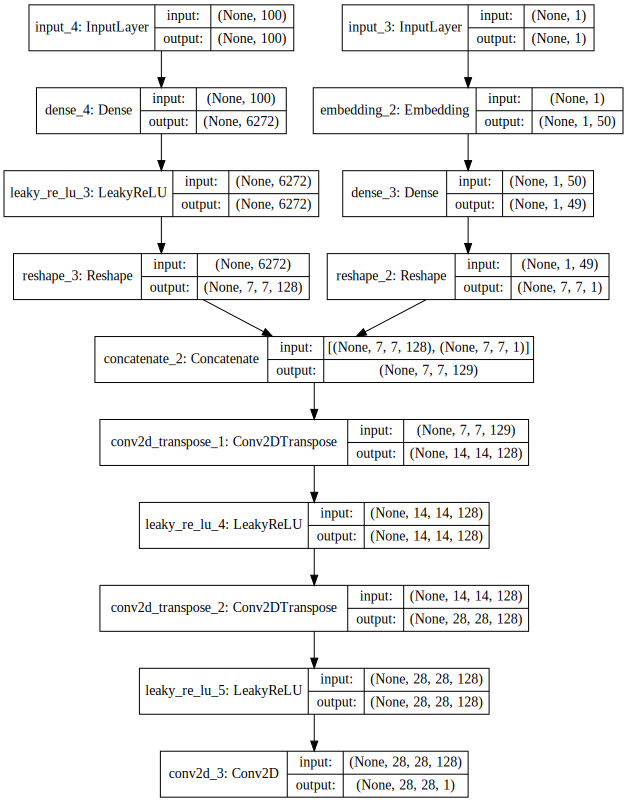

In [6]:
fashion_conditional_gan.plot_generator()

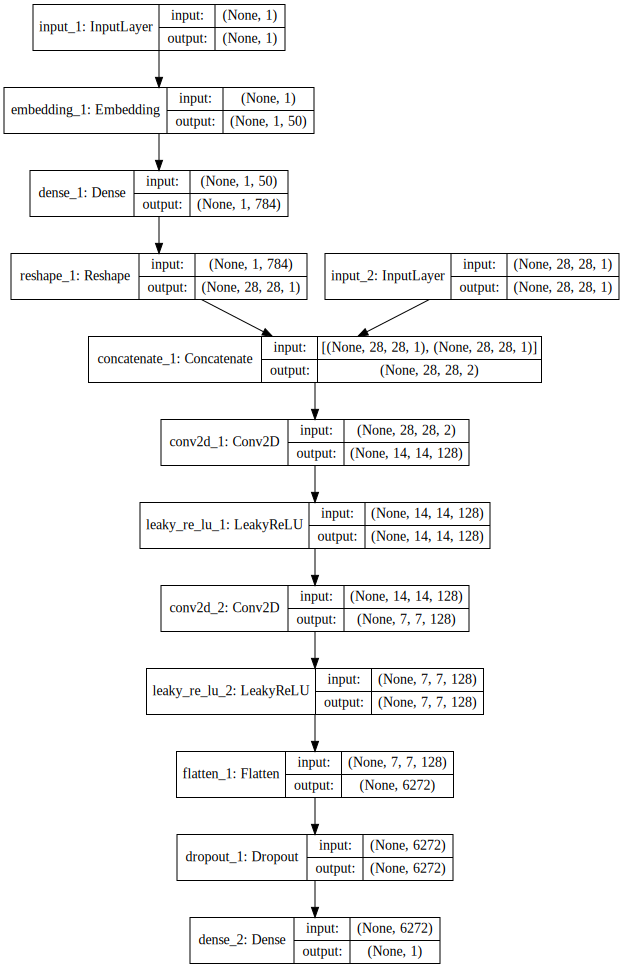

In [7]:
fashion_conditional_gan.plot_discriminator()

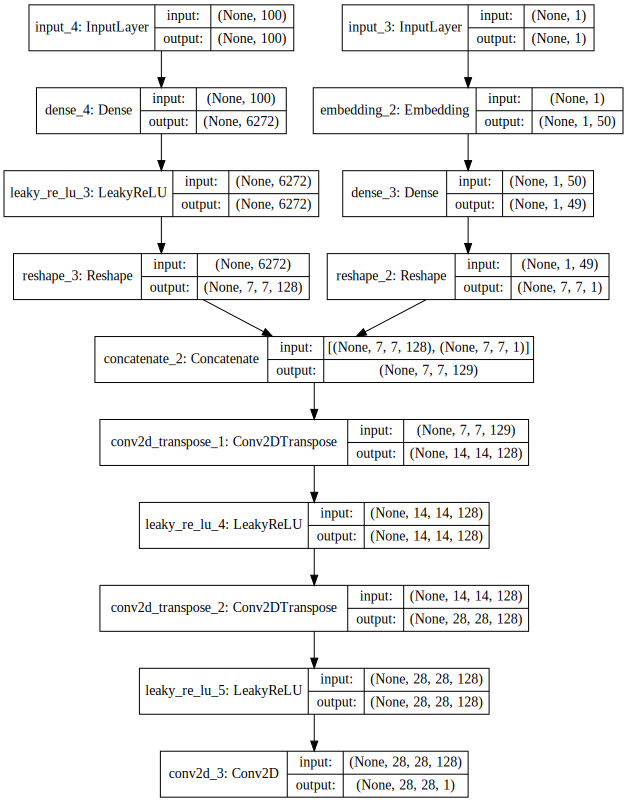

In [8]:
fashion_conditional_gan.plot_gan()

## Train the model

C:\applications\Miniconda3\envs\tf-gpu\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
C:\applications\Miniconda3\envs\tf-gpu\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>1, 1/468, d1=0.685, d2=0.695 g=0.692
>1, 2/468, d1=0.625, d2=0.697 g=0.690
>1, 3/468, d1=0.556, d2=0.703 g=0.684
>1, 4/468, d1=0.502, d2=0.715 g=0.672
>1, 5/468, d1=0.445, d2=0.736 g=0.654
>1, 6/468, d1=0.399, d2=0.766 g=0.632


C:\applications\Miniconda3\envs\tf-gpu\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>1, 7/468, d1=0.350, d2=0.804 g=0.611
>1, 8/468, d1=0.333, d2=0.828 g=0.596
>1, 9/468, d1=0.306, d2=0.846 g=0.616
>1, 10/468, d1=0.305, d2=0.809 g=0.661
>1, 11/468, d1=0.290, d2=0.732 g=0.741
>1, 12/468, d1=0.300, d2=0.639 g=0.867
>1, 13/468, d1=0.354, d2=0.533 g=0.986
>1, 14/468, d1=0.318, d2=0.483 g=1.079
>1, 15/468, d1=0.329, d2=0.472 g=1.039
>1, 16/468, d1=0.283, d2=0.514 g=0.939
>1, 17/468, d1=0.303, d2=0.583 g=0.835
>1, 18/468, d1=0.283, d2=0.644 g=0.753
>1, 19/468, d1=0.284, d2=0.698 g=0.698
>1, 20/468, d1=0.270, d2=0.786 g=0.628
>1, 21/468, d1=0.219, d2=0.912 g=0.549
>1, 22/468, d1=0.161, d2=1.025 g=0.496
>1, 23/468, d1=0.148, d2=1.090 g=0.484
>1, 24/468, d1=0.098, d2=1.066 g=0.518
>1, 25/468, d1=0.128, d2=0.930 g=0.632
>1, 26/468, d1=0.100, d2=0.718 g=0.845
>1, 27/468, d1=0.080, d2=0.516 g=1.118
>1, 28/468, d1=0.082, d2=0.386 g=1.324
>1, 29/468, d1=0.064, d2=0.347 g=1.305
>1, 30/468, d1=0.054, d2=0.398 g=1.169
>1, 31/468, d1=0.054, d2=0.481 g=1.001
>1, 32/468, d1=0.064, d2=0.5

>1, 216/468, d1=0.685, d2=0.613 g=0.854
>1, 217/468, d1=0.661, d2=0.617 g=0.870
>1, 218/468, d1=0.663, d2=0.608 g=0.882
>1, 219/468, d1=0.624, d2=0.612 g=0.892
>1, 220/468, d1=0.692, d2=0.604 g=0.879
>1, 221/468, d1=0.657, d2=0.609 g=0.890
>1, 222/468, d1=0.709, d2=0.613 g=0.852
>1, 223/468, d1=0.678, d2=0.642 g=0.806
>1, 224/468, d1=0.681, d2=0.652 g=0.790
>1, 225/468, d1=0.665, d2=0.684 g=0.750
>1, 226/468, d1=0.668, d2=0.735 g=0.727
>1, 227/468, d1=0.633, d2=0.744 g=0.694
>1, 228/468, d1=0.629, d2=0.754 g=0.676
>1, 229/468, d1=0.564, d2=0.761 g=0.679
>1, 230/468, d1=0.611, d2=0.787 g=0.657
>1, 231/468, d1=0.626, d2=0.832 g=0.650
>1, 232/468, d1=0.637, d2=0.829 g=0.624
>1, 233/468, d1=0.666, d2=0.863 g=0.617
>1, 234/468, d1=0.624, d2=0.850 g=0.619
>1, 235/468, d1=0.643, d2=0.834 g=0.625
>1, 236/468, d1=0.620, d2=0.814 g=0.648
>1, 237/468, d1=0.611, d2=0.816 g=0.665
>1, 238/468, d1=0.589, d2=0.774 g=0.695
>1, 239/468, d1=0.605, d2=0.723 g=0.721
>1, 240/468, d1=0.556, d2=0.709 g=0.781


>1, 425/468, d1=0.701, d2=0.704 g=0.753
>1, 426/468, d1=0.704, d2=0.673 g=0.789
>1, 427/468, d1=0.697, d2=0.649 g=0.818
>1, 428/468, d1=0.654, d2=0.604 g=0.870
>1, 429/468, d1=0.675, d2=0.584 g=0.865
>1, 430/468, d1=0.685, d2=0.586 g=0.911
>1, 431/468, d1=0.672, d2=0.540 g=0.914
>1, 432/468, d1=0.642, d2=0.520 g=0.955
>1, 433/468, d1=0.691, d2=0.547 g=0.950
>1, 434/468, d1=0.651, d2=0.532 g=0.961
>1, 435/468, d1=0.603, d2=0.525 g=0.939
>1, 436/468, d1=0.639, d2=0.553 g=0.943
>1, 437/468, d1=0.624, d2=0.612 g=0.892
>1, 438/468, d1=0.622, d2=0.565 g=0.875
>1, 439/468, d1=0.661, d2=0.605 g=0.849
>1, 440/468, d1=0.666, d2=0.645 g=0.783
>1, 441/468, d1=0.677, d2=0.701 g=0.755
>1, 442/468, d1=0.655, d2=0.747 g=0.745
>1, 443/468, d1=0.666, d2=0.742 g=0.697
>1, 444/468, d1=0.642, d2=0.773 g=0.678
>1, 445/468, d1=0.640, d2=0.805 g=0.677
>1, 446/468, d1=0.667, d2=0.770 g=0.666
>1, 447/468, d1=0.658, d2=0.778 g=0.657
>1, 448/468, d1=0.674, d2=0.781 g=0.665
>1, 449/468, d1=0.726, d2=0.776 g=0.705


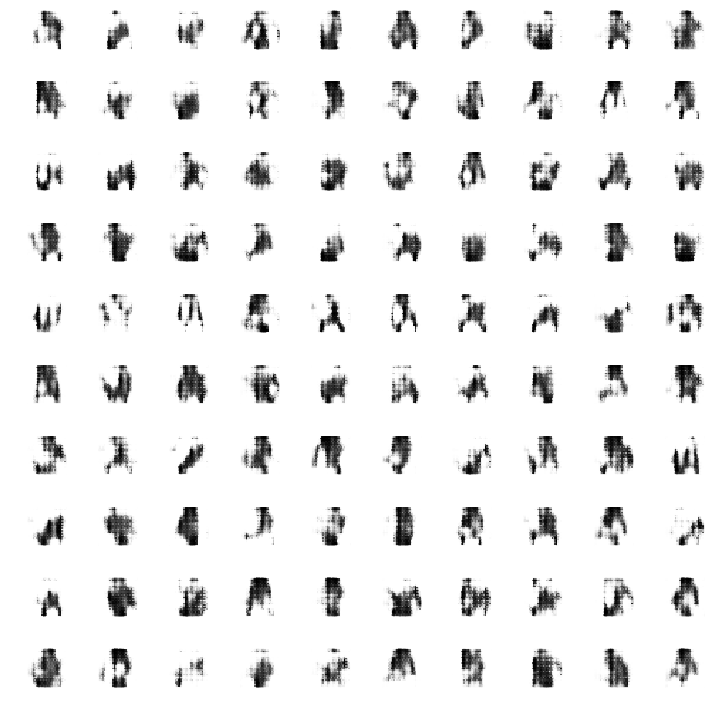

>Saved: conditional-gan_generated_plot_0001.png and conditional-gan_model_0001
>2, 1/468, d1=0.692, d2=0.606 g=0.868
>2, 2/468, d1=0.661, d2=0.647 g=0.803
>2, 3/468, d1=0.625, d2=0.689 g=0.757
>2, 4/468, d1=0.654, d2=0.711 g=0.719
>2, 5/468, d1=0.666, d2=0.728 g=0.701
>2, 6/468, d1=0.632, d2=0.796 g=0.699
>2, 7/468, d1=0.661, d2=0.799 g=0.677
>2, 8/468, d1=0.706, d2=0.810 g=0.659
>2, 9/468, d1=0.697, d2=0.832 g=0.684
>2, 10/468, d1=0.676, d2=0.744 g=0.665
>2, 11/468, d1=0.667, d2=0.797 g=0.691
>2, 12/468, d1=0.674, d2=0.795 g=0.727
>2, 13/468, d1=0.717, d2=0.739 g=0.795
>2, 14/468, d1=0.670, d2=0.670 g=0.836
>2, 15/468, d1=0.673, d2=0.606 g=0.854
>2, 16/468, d1=0.696, d2=0.608 g=0.908
>2, 17/468, d1=0.699, d2=0.571 g=0.906
>2, 18/468, d1=0.695, d2=0.545 g=0.930
>2, 19/468, d1=0.714, d2=0.572 g=0.941
>2, 20/468, d1=0.679, d2=0.565 g=0.919
>2, 21/468, d1=0.641, d2=0.555 g=0.911
>2, 22/468, d1=0.649, d2=0.573 g=0.924
>2, 23/468, d1=0.584, d2=0.599 g=0.920
>2, 24/468, d1=0.670, d2=0.620 g=

>2, 209/468, d1=0.521, d2=0.619 g=0.853
>2, 210/468, d1=0.545, d2=0.650 g=0.803
>2, 211/468, d1=0.549, d2=0.676 g=0.818
>2, 212/468, d1=0.641, d2=0.606 g=0.813
>2, 213/468, d1=0.548, d2=0.624 g=0.825
>2, 214/468, d1=0.555, d2=0.618 g=0.826
>2, 215/468, d1=0.593, d2=0.646 g=0.820
>2, 216/468, d1=0.593, d2=0.649 g=0.840
>2, 217/468, d1=0.597, d2=0.675 g=0.839
>2, 218/468, d1=0.531, d2=0.663 g=0.796
>2, 219/468, d1=0.573, d2=0.635 g=0.825
>2, 220/468, d1=0.599, d2=0.637 g=0.845
>2, 221/468, d1=0.544, d2=0.674 g=0.818
>2, 222/468, d1=0.551, d2=0.693 g=0.814
>2, 223/468, d1=0.546, d2=0.659 g=0.805
>2, 224/468, d1=0.598, d2=0.689 g=0.776
>2, 225/468, d1=0.622, d2=0.671 g=0.796
>2, 226/468, d1=0.537, d2=0.646 g=0.784
>2, 227/468, d1=0.556, d2=0.636 g=0.759
>2, 228/468, d1=0.576, d2=0.653 g=0.788
>2, 229/468, d1=0.541, d2=0.695 g=0.781
>2, 230/468, d1=0.560, d2=0.636 g=0.738
>2, 231/468, d1=0.579, d2=0.676 g=0.784
>2, 232/468, d1=0.532, d2=0.705 g=0.745
>2, 233/468, d1=0.544, d2=0.735 g=0.793


>2, 418/468, d1=0.689, d2=0.763 g=0.758
>2, 419/468, d1=0.759, d2=0.724 g=0.810
>2, 420/468, d1=0.803, d2=0.677 g=0.827
>2, 421/468, d1=0.746, d2=0.669 g=0.882
>2, 422/468, d1=0.772, d2=0.609 g=0.941
>2, 423/468, d1=0.751, d2=0.570 g=0.946
>2, 424/468, d1=0.743, d2=0.533 g=0.991
>2, 425/468, d1=0.738, d2=0.554 g=0.941
>2, 426/468, d1=0.698, d2=0.586 g=0.898
>2, 427/468, d1=0.675, d2=0.680 g=0.838
>2, 428/468, d1=0.657, d2=0.752 g=0.743
>2, 429/468, d1=0.740, d2=0.789 g=0.719
>2, 430/468, d1=0.717, d2=0.799 g=0.699
>2, 431/468, d1=0.748, d2=0.803 g=0.689
>2, 432/468, d1=0.691, d2=0.777 g=0.753
>2, 433/468, d1=0.683, d2=0.713 g=0.806
>2, 434/468, d1=0.728, d2=0.645 g=0.873
>2, 435/468, d1=0.707, d2=0.599 g=0.898
>2, 436/468, d1=0.690, d2=0.583 g=0.932
>2, 437/468, d1=0.698, d2=0.578 g=0.900
>2, 438/468, d1=0.654, d2=0.628 g=0.853
>2, 439/468, d1=0.606, d2=0.675 g=0.814
>2, 440/468, d1=0.831, d2=0.711 g=0.730
>2, 441/468, d1=0.640, d2=0.822 g=0.699
>2, 442/468, d1=0.694, d2=0.803 g=0.694


>3, 159/468, d1=0.629, d2=0.711 g=0.771
>3, 160/468, d1=0.644, d2=0.718 g=0.763
>3, 161/468, d1=0.616, d2=0.681 g=0.767
>3, 162/468, d1=0.603, d2=0.656 g=0.769
>3, 163/468, d1=0.641, d2=0.645 g=0.803
>3, 164/468, d1=0.610, d2=0.678 g=0.821
>3, 165/468, d1=0.585, d2=0.649 g=0.806
>3, 166/468, d1=0.638, d2=0.665 g=0.773
>3, 167/468, d1=0.639, d2=0.697 g=0.781
>3, 168/468, d1=0.669, d2=0.679 g=0.763
>3, 169/468, d1=0.619, d2=0.687 g=0.748
>3, 170/468, d1=0.612, d2=0.700 g=0.729
>3, 171/468, d1=0.616, d2=0.709 g=0.751
>3, 172/468, d1=0.651, d2=0.691 g=0.726
>3, 173/468, d1=0.609, d2=0.718 g=0.726
>3, 174/468, d1=0.670, d2=0.705 g=0.726
>3, 175/468, d1=0.652, d2=0.688 g=0.755
>3, 176/468, d1=0.649, d2=0.664 g=0.762
>3, 177/468, d1=0.669, d2=0.699 g=0.756
>3, 178/468, d1=0.640, d2=0.642 g=0.801
>3, 179/468, d1=0.668, d2=0.665 g=0.807
>3, 180/468, d1=0.660, d2=0.649 g=0.831
>3, 181/468, d1=0.650, d2=0.622 g=0.830
>3, 182/468, d1=0.668, d2=0.617 g=0.855
>3, 183/468, d1=0.653, d2=0.604 g=0.857


>3, 369/468, d1=0.665, d2=0.640 g=0.791
>3, 370/468, d1=0.651, d2=0.668 g=0.780
>3, 371/468, d1=0.655, d2=0.661 g=0.779
>3, 372/468, d1=0.646, d2=0.653 g=0.781
>3, 373/468, d1=0.680, d2=0.665 g=0.767
>3, 374/468, d1=0.659, d2=0.646 g=0.755
>3, 375/468, d1=0.665, d2=0.677 g=0.765
>3, 376/468, d1=0.693, d2=0.697 g=0.751
>3, 377/468, d1=0.642, d2=0.687 g=0.755
>3, 378/468, d1=0.674, d2=0.676 g=0.762
>3, 379/468, d1=0.695, d2=0.659 g=0.771
>3, 380/468, d1=0.640, d2=0.672 g=0.786
>3, 381/468, d1=0.652, d2=0.665 g=0.796
>3, 382/468, d1=0.671, d2=0.638 g=0.800
>3, 383/468, d1=0.614, d2=0.637 g=0.791
>3, 384/468, d1=0.642, d2=0.643 g=0.788
>3, 385/468, d1=0.668, d2=0.666 g=0.794
>3, 386/468, d1=0.671, d2=0.662 g=0.785
>3, 387/468, d1=0.663, d2=0.671 g=0.745
>3, 388/468, d1=0.647, d2=0.700 g=0.753
>3, 389/468, d1=0.665, d2=0.722 g=0.756
>3, 390/468, d1=0.652, d2=0.678 g=0.769
>3, 391/468, d1=0.665, d2=0.669 g=0.774
>3, 392/468, d1=0.648, d2=0.648 g=0.782
>3, 393/468, d1=0.694, d2=0.621 g=0.824


>4, 110/468, d1=0.676, d2=0.665 g=0.777
>4, 111/468, d1=0.660, d2=0.666 g=0.763
>4, 112/468, d1=0.659, d2=0.654 g=0.785
>4, 113/468, d1=0.677, d2=0.648 g=0.740
>4, 114/468, d1=0.642, d2=0.670 g=0.755
>4, 115/468, d1=0.664, d2=0.611 g=0.775
>4, 116/468, d1=0.692, d2=0.664 g=0.771
>4, 117/468, d1=0.650, d2=0.639 g=0.798
>4, 118/468, d1=0.660, d2=0.643 g=0.786
>4, 119/468, d1=0.709, d2=0.660 g=0.768
>4, 120/468, d1=0.678, d2=0.663 g=0.786
>4, 121/468, d1=0.678, d2=0.666 g=0.775
>4, 122/468, d1=0.701, d2=0.652 g=0.778
>4, 123/468, d1=0.693, d2=0.657 g=0.787
>4, 124/468, d1=0.681, d2=0.658 g=0.791
>4, 125/468, d1=0.679, d2=0.654 g=0.782
>4, 126/468, d1=0.659, d2=0.669 g=0.773
>4, 127/468, d1=0.697, d2=0.646 g=0.783
>4, 128/468, d1=0.649, d2=0.629 g=0.805
>4, 129/468, d1=0.661, d2=0.648 g=0.775
>4, 130/468, d1=0.675, d2=0.646 g=0.777
>4, 131/468, d1=0.665, d2=0.675 g=0.790
>4, 132/468, d1=0.664, d2=0.648 g=0.780
>4, 133/468, d1=0.693, d2=0.633 g=0.774
>4, 134/468, d1=0.651, d2=0.637 g=0.769


>4, 319/468, d1=0.700, d2=0.654 g=0.747
>4, 320/468, d1=0.659, d2=0.648 g=0.756
>4, 321/468, d1=0.688, d2=0.664 g=0.759
>4, 322/468, d1=0.646, d2=0.658 g=0.767
>4, 323/468, d1=0.645, d2=0.654 g=0.777
>4, 324/468, d1=0.627, d2=0.665 g=0.781
>4, 325/468, d1=0.690, d2=0.663 g=0.733
>4, 326/468, d1=0.649, d2=0.694 g=0.746
>4, 327/468, d1=0.636, d2=0.697 g=0.734
>4, 328/468, d1=0.678, d2=0.723 g=0.744
>4, 329/468, d1=0.655, d2=0.681 g=0.754
>4, 330/468, d1=0.669, d2=0.667 g=0.779
>4, 331/468, d1=0.629, d2=0.680 g=0.818
>4, 332/468, d1=0.653, d2=0.640 g=0.829
>4, 333/468, d1=0.693, d2=0.634 g=0.823
>4, 334/468, d1=0.678, d2=0.625 g=0.827
>4, 335/468, d1=0.682, d2=0.613 g=0.799
>4, 336/468, d1=0.687, d2=0.674 g=0.772
>4, 337/468, d1=0.702, d2=0.667 g=0.768
>4, 338/468, d1=0.664, d2=0.677 g=0.751
>4, 339/468, d1=0.703, d2=0.667 g=0.776
>4, 340/468, d1=0.697, d2=0.674 g=0.780
>4, 341/468, d1=0.665, d2=0.635 g=0.789
>4, 342/468, d1=0.665, d2=0.639 g=0.825
>4, 343/468, d1=0.651, d2=0.616 g=0.825


>5, 61/468, d1=0.658, d2=0.653 g=0.772
>5, 62/468, d1=0.671, d2=0.650 g=0.780
>5, 63/468, d1=0.657, d2=0.686 g=0.753
>5, 64/468, d1=0.645, d2=0.683 g=0.762
>5, 65/468, d1=0.638, d2=0.681 g=0.773
>5, 66/468, d1=0.636, d2=0.684 g=0.753
>5, 67/468, d1=0.658, d2=0.673 g=0.771
>5, 68/468, d1=0.678, d2=0.654 g=0.786
>5, 69/468, d1=0.676, d2=0.658 g=0.798
>5, 70/468, d1=0.676, d2=0.638 g=0.800
>5, 71/468, d1=0.707, d2=0.656 g=0.793
>5, 72/468, d1=0.682, d2=0.654 g=0.780
>5, 73/468, d1=0.682, d2=0.673 g=0.769
>5, 74/468, d1=0.702, d2=0.687 g=0.769
>5, 75/468, d1=0.662, d2=0.669 g=0.776
>5, 76/468, d1=0.671, d2=0.632 g=0.782
>5, 77/468, d1=0.678, d2=0.662 g=0.774
>5, 78/468, d1=0.669, d2=0.676 g=0.772
>5, 79/468, d1=0.637, d2=0.681 g=0.780
>5, 80/468, d1=0.644, d2=0.678 g=0.762
>5, 81/468, d1=0.668, d2=0.656 g=0.759
>5, 82/468, d1=0.676, d2=0.670 g=0.780
>5, 83/468, d1=0.651, d2=0.663 g=0.772
>5, 84/468, d1=0.658, d2=0.663 g=0.752
>5, 85/468, d1=0.700, d2=0.662 g=0.760
>5, 86/468, d1=0.680, d2=

>5, 271/468, d1=0.650, d2=0.670 g=0.755
>5, 272/468, d1=0.656, d2=0.674 g=0.761
>5, 273/468, d1=0.653, d2=0.670 g=0.759
>5, 274/468, d1=0.682, d2=0.670 g=0.760
>5, 275/468, d1=0.671, d2=0.669 g=0.772
>5, 276/468, d1=0.672, d2=0.638 g=0.778
>5, 277/468, d1=0.647, d2=0.672 g=0.759
>5, 278/468, d1=0.695, d2=0.652 g=0.769
>5, 279/468, d1=0.655, d2=0.653 g=0.774
>5, 280/468, d1=0.673, d2=0.670 g=0.778
>5, 281/468, d1=0.697, d2=0.672 g=0.769
>5, 282/468, d1=0.665, d2=0.648 g=0.751
>5, 283/468, d1=0.656, d2=0.660 g=0.757
>5, 284/468, d1=0.666, d2=0.662 g=0.769
>5, 285/468, d1=0.670, d2=0.657 g=0.758
>5, 286/468, d1=0.685, d2=0.653 g=0.770
>5, 287/468, d1=0.659, d2=0.645 g=0.758
>5, 288/468, d1=0.660, d2=0.663 g=0.768
>5, 289/468, d1=0.657, d2=0.670 g=0.762
>5, 290/468, d1=0.661, d2=0.692 g=0.772
>5, 291/468, d1=0.650, d2=0.694 g=0.755
>5, 292/468, d1=0.663, d2=0.676 g=0.754
>5, 293/468, d1=0.676, d2=0.663 g=0.788
>5, 294/468, d1=0.693, d2=0.676 g=0.765
>5, 295/468, d1=0.697, d2=0.672 g=0.767


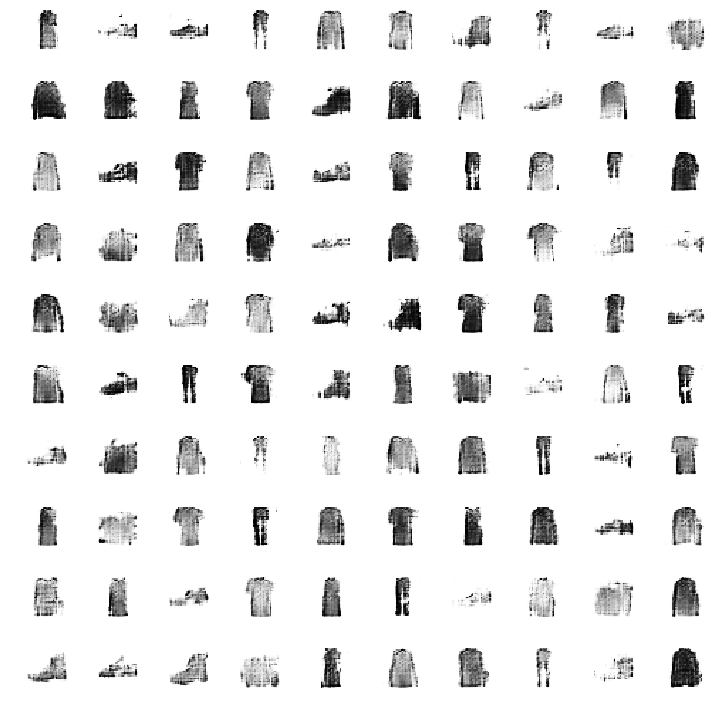

>Saved: conditional-gan_generated_plot_0005.png and conditional-gan_model_0005
>6, 1/468, d1=0.658, d2=0.658 g=0.768
>6, 2/468, d1=0.659, d2=0.624 g=0.778
>6, 3/468, d1=0.636, d2=0.666 g=0.774
>6, 4/468, d1=0.648, d2=0.680 g=0.753
>6, 5/468, d1=0.639, d2=0.712 g=0.729
>6, 6/468, d1=0.668, d2=0.689 g=0.749
>6, 7/468, d1=0.648, d2=0.701 g=0.741
>6, 8/468, d1=0.648, d2=0.656 g=0.790
>6, 9/468, d1=0.689, d2=0.655 g=0.765
>6, 10/468, d1=0.671, d2=0.641 g=0.846
>6, 11/468, d1=0.666, d2=0.646 g=0.852
>6, 12/468, d1=0.684, d2=0.638 g=0.811
>6, 13/468, d1=0.674, d2=0.635 g=0.809
>6, 14/468, d1=0.671, d2=0.672 g=0.768
>6, 15/468, d1=0.692, d2=0.696 g=0.736
>6, 16/468, d1=0.711, d2=0.713 g=0.728
>6, 17/468, d1=0.687, d2=0.705 g=0.747
>6, 18/468, d1=0.663, d2=0.662 g=0.767
>6, 19/468, d1=0.652, d2=0.661 g=0.783
>6, 20/468, d1=0.641, d2=0.650 g=0.827
>6, 21/468, d1=0.653, d2=0.622 g=0.782
>6, 22/468, d1=0.607, d2=0.674 g=0.752
>6, 23/468, d1=0.682, d2=0.758 g=0.747
>6, 24/468, d1=0.649, d2=0.714 g=

>6, 209/468, d1=0.655, d2=0.684 g=0.753
>6, 210/468, d1=0.652, d2=0.713 g=0.754
>6, 211/468, d1=0.639, d2=0.702 g=0.767
>6, 212/468, d1=0.662, d2=0.674 g=0.758
>6, 213/468, d1=0.674, d2=0.660 g=0.804
>6, 214/468, d1=0.694, d2=0.618 g=0.805
>6, 215/468, d1=0.699, d2=0.623 g=0.842
>6, 216/468, d1=0.689, d2=0.633 g=0.821
>6, 217/468, d1=0.677, d2=0.639 g=0.802
>6, 218/468, d1=0.696, d2=0.639 g=0.778
>6, 219/468, d1=0.698, d2=0.654 g=0.778
>6, 220/468, d1=0.676, d2=0.643 g=0.760
>6, 221/468, d1=0.678, d2=0.672 g=0.775
>6, 222/468, d1=0.652, d2=0.671 g=0.760
>6, 223/468, d1=0.651, d2=0.672 g=0.748
>6, 224/468, d1=0.632, d2=0.670 g=0.759
>6, 225/468, d1=0.634, d2=0.680 g=0.755
>6, 226/468, d1=0.639, d2=0.680 g=0.759
>6, 227/468, d1=0.644, d2=0.688 g=0.772
>6, 228/468, d1=0.660, d2=0.669 g=0.740
>6, 229/468, d1=0.646, d2=0.696 g=0.766
>6, 230/468, d1=0.643, d2=0.688 g=0.771
>6, 231/468, d1=0.634, d2=0.678 g=0.748
>6, 232/468, d1=0.652, d2=0.663 g=0.749
>6, 233/468, d1=0.641, d2=0.675 g=0.754


>6, 419/468, d1=0.674, d2=0.654 g=0.804
>6, 420/468, d1=0.702, d2=0.658 g=0.808
>6, 421/468, d1=0.665, d2=0.632 g=0.813
>6, 422/468, d1=0.643, d2=0.658 g=0.791
>6, 423/468, d1=0.693, d2=0.650 g=0.801
>6, 424/468, d1=0.688, d2=0.638 g=0.772
>6, 425/468, d1=0.661, d2=0.641 g=0.799
>6, 426/468, d1=0.666, d2=0.662 g=0.792
>6, 427/468, d1=0.660, d2=0.643 g=0.809
>6, 428/468, d1=0.646, d2=0.656 g=0.795
>6, 429/468, d1=0.672, d2=0.659 g=0.824
>6, 430/468, d1=0.652, d2=0.651 g=0.798
>6, 431/468, d1=0.649, d2=0.638 g=0.779
>6, 432/468, d1=0.662, d2=0.656 g=0.788
>6, 433/468, d1=0.676, d2=0.656 g=0.784
>6, 434/468, d1=0.669, d2=0.671 g=0.782
>6, 435/468, d1=0.695, d2=0.628 g=0.807
>6, 436/468, d1=0.669, d2=0.644 g=0.812
>6, 437/468, d1=0.685, d2=0.630 g=0.823
>6, 438/468, d1=0.708, d2=0.666 g=0.775
>6, 439/468, d1=0.682, d2=0.641 g=0.791
>6, 440/468, d1=0.676, d2=0.630 g=0.771
>6, 441/468, d1=0.661, d2=0.638 g=0.775
>6, 442/468, d1=0.690, d2=0.671 g=0.785
>6, 443/468, d1=0.686, d2=0.661 g=0.792


>7, 160/468, d1=0.646, d2=0.640 g=0.778
>7, 161/468, d1=0.675, d2=0.643 g=0.768
>7, 162/468, d1=0.678, d2=0.651 g=0.789
>7, 163/468, d1=0.675, d2=0.656 g=0.779
>7, 164/468, d1=0.656, d2=0.675 g=0.785
>7, 165/468, d1=0.656, d2=0.644 g=0.804
>7, 166/468, d1=0.690, d2=0.658 g=0.801
>7, 167/468, d1=0.701, d2=0.633 g=0.793
>7, 168/468, d1=0.676, d2=0.668 g=0.772
>7, 169/468, d1=0.662, d2=0.674 g=0.781
>7, 170/468, d1=0.677, d2=0.635 g=0.776
>7, 171/468, d1=0.672, d2=0.651 g=0.777
>7, 172/468, d1=0.653, d2=0.685 g=0.774
>7, 173/468, d1=0.694, d2=0.653 g=0.788
>7, 174/468, d1=0.674, d2=0.642 g=0.783
>7, 175/468, d1=0.696, d2=0.663 g=0.766
>7, 176/468, d1=0.665, d2=0.679 g=0.780
>7, 177/468, d1=0.667, d2=0.650 g=0.795
>7, 178/468, d1=0.691, d2=0.669 g=0.766
>7, 179/468, d1=0.675, d2=0.645 g=0.775
>7, 180/468, d1=0.708, d2=0.654 g=0.779
>7, 181/468, d1=0.674, d2=0.670 g=0.801
>7, 182/468, d1=0.714, d2=0.668 g=0.757
>7, 183/468, d1=0.654, d2=0.688 g=0.783
>7, 184/468, d1=0.644, d2=0.649 g=0.766


>7, 368/468, d1=0.695, d2=0.690 g=0.774
>7, 369/468, d1=0.691, d2=0.662 g=0.762
>7, 370/468, d1=0.669, d2=0.648 g=0.783
>7, 371/468, d1=0.709, d2=0.676 g=0.807
>7, 372/468, d1=0.677, d2=0.658 g=0.807
>7, 373/468, d1=0.684, d2=0.656 g=0.797
>7, 374/468, d1=0.697, d2=0.657 g=0.789
>7, 375/468, d1=0.658, d2=0.649 g=0.777
>7, 376/468, d1=0.655, d2=0.658 g=0.759
>7, 377/468, d1=0.654, d2=0.657 g=0.761
>7, 378/468, d1=0.695, d2=0.647 g=0.762
>7, 379/468, d1=0.641, d2=0.665 g=0.762
>7, 380/468, d1=0.645, d2=0.659 g=0.769
>7, 381/468, d1=0.686, d2=0.672 g=0.771
>7, 382/468, d1=0.671, d2=0.666 g=0.771
>7, 383/468, d1=0.652, d2=0.649 g=0.797
>7, 384/468, d1=0.666, d2=0.649 g=0.760
>7, 385/468, d1=0.664, d2=0.655 g=0.785
>7, 386/468, d1=0.676, d2=0.665 g=0.746
>7, 387/468, d1=0.667, d2=0.673 g=0.753
>7, 388/468, d1=0.659, d2=0.684 g=0.756
>7, 389/468, d1=0.649, d2=0.688 g=0.777
>7, 390/468, d1=0.700, d2=0.664 g=0.770
>7, 391/468, d1=0.631, d2=0.691 g=0.763
>7, 392/468, d1=0.684, d2=0.655 g=0.758


>8, 109/468, d1=0.715, d2=0.622 g=0.803
>8, 110/468, d1=0.649, d2=0.634 g=0.794
>8, 111/468, d1=0.680, d2=0.657 g=0.824
>8, 112/468, d1=0.684, d2=0.651 g=0.792
>8, 113/468, d1=0.674, d2=0.612 g=0.797
>8, 114/468, d1=0.680, d2=0.648 g=0.757
>8, 115/468, d1=0.618, d2=0.701 g=0.758
>8, 116/468, d1=0.644, d2=0.707 g=0.754
>8, 117/468, d1=0.688, d2=0.697 g=0.778
>8, 118/468, d1=0.679, d2=0.677 g=0.794
>8, 119/468, d1=0.668, d2=0.651 g=0.810
>8, 120/468, d1=0.712, d2=0.611 g=0.864
>8, 121/468, d1=0.724, d2=0.610 g=0.793
>8, 122/468, d1=0.673, d2=0.629 g=0.808
>8, 123/468, d1=0.660, d2=0.652 g=0.798
>8, 124/468, d1=0.643, d2=0.712 g=0.788
>8, 125/468, d1=0.659, d2=0.693 g=0.772
>8, 126/468, d1=0.661, d2=0.680 g=0.754
>8, 127/468, d1=0.650, d2=0.676 g=0.790
>8, 128/468, d1=0.685, d2=0.648 g=0.795
>8, 129/468, d1=0.665, d2=0.641 g=0.810
>8, 130/468, d1=0.631, d2=0.687 g=0.793
>8, 131/468, d1=0.662, d2=0.671 g=0.759
>8, 132/468, d1=0.650, d2=0.681 g=0.762
>8, 133/468, d1=0.645, d2=0.665 g=0.746


>8, 317/468, d1=0.658, d2=0.661 g=0.778
>8, 318/468, d1=0.648, d2=0.676 g=0.751
>8, 319/468, d1=0.646, d2=0.674 g=0.778
>8, 320/468, d1=0.670, d2=0.648 g=0.773
>8, 321/468, d1=0.649, d2=0.674 g=0.755
>8, 322/468, d1=0.666, d2=0.649 g=0.760
>8, 323/468, d1=0.649, d2=0.696 g=0.779
>8, 324/468, d1=0.662, d2=0.664 g=0.764
>8, 325/468, d1=0.671, d2=0.642 g=0.756
>8, 326/468, d1=0.650, d2=0.688 g=0.787
>8, 327/468, d1=0.639, d2=0.670 g=0.766
>8, 328/468, d1=0.651, d2=0.669 g=0.794
>8, 329/468, d1=0.676, d2=0.655 g=0.773
>8, 330/468, d1=0.648, d2=0.664 g=0.778
>8, 331/468, d1=0.654, d2=0.631 g=0.777
>8, 332/468, d1=0.694, d2=0.669 g=0.782
>8, 333/468, d1=0.676, d2=0.670 g=0.776
>8, 334/468, d1=0.664, d2=0.659 g=0.771
>8, 335/468, d1=0.700, d2=0.641 g=0.747
>8, 336/468, d1=0.682, d2=0.662 g=0.760
>8, 337/468, d1=0.654, d2=0.656 g=0.772
>8, 338/468, d1=0.673, d2=0.678 g=0.770
>8, 339/468, d1=0.667, d2=0.660 g=0.779
>8, 340/468, d1=0.675, d2=0.696 g=0.788
>8, 341/468, d1=0.637, d2=0.691 g=0.773


>9, 58/468, d1=0.658, d2=0.655 g=0.782
>9, 59/468, d1=0.670, d2=0.660 g=0.767
>9, 60/468, d1=0.654, d2=0.644 g=0.776
>9, 61/468, d1=0.664, d2=0.673 g=0.770
>9, 62/468, d1=0.663, d2=0.665 g=0.761
>9, 63/468, d1=0.686, d2=0.673 g=0.757
>9, 64/468, d1=0.703, d2=0.685 g=0.794
>9, 65/468, d1=0.689, d2=0.637 g=0.766
>9, 66/468, d1=0.690, d2=0.649 g=0.786
>9, 67/468, d1=0.667, d2=0.674 g=0.783
>9, 68/468, d1=0.663, d2=0.662 g=0.783
>9, 69/468, d1=0.693, d2=0.651 g=0.776
>9, 70/468, d1=0.693, d2=0.653 g=0.765
>9, 71/468, d1=0.657, d2=0.671 g=0.746
>9, 72/468, d1=0.680, d2=0.644 g=0.778
>9, 73/468, d1=0.666, d2=0.651 g=0.811
>9, 74/468, d1=0.617, d2=0.642 g=0.804
>9, 75/468, d1=0.694, d2=0.680 g=0.788
>9, 76/468, d1=0.639, d2=0.675 g=0.752
>9, 77/468, d1=0.685, d2=0.750 g=0.727
>9, 78/468, d1=0.689, d2=0.718 g=0.757
>9, 79/468, d1=0.663, d2=0.639 g=0.839
>9, 80/468, d1=0.684, d2=0.585 g=0.832
>9, 81/468, d1=0.707, d2=0.587 g=0.844
>9, 82/468, d1=0.664, d2=0.690 g=0.782
>9, 83/468, d1=0.697, d2=

>9, 266/468, d1=0.697, d2=0.666 g=0.769
>9, 267/468, d1=0.658, d2=0.687 g=0.767
>9, 268/468, d1=0.661, d2=0.701 g=0.764
>9, 269/468, d1=0.648, d2=0.658 g=0.776
>9, 270/468, d1=0.698, d2=0.647 g=0.773
>9, 271/468, d1=0.648, d2=0.673 g=0.725
>9, 272/468, d1=0.618, d2=0.696 g=0.750
>9, 273/468, d1=0.671, d2=0.690 g=0.758
>9, 274/468, d1=0.698, d2=0.683 g=0.758
>9, 275/468, d1=0.676, d2=0.659 g=0.771
>9, 276/468, d1=0.676, d2=0.641 g=0.781
>9, 277/468, d1=0.665, d2=0.664 g=0.810
>9, 278/468, d1=0.678, d2=0.633 g=0.797
>9, 279/468, d1=0.689, d2=0.635 g=0.805
>9, 280/468, d1=0.693, d2=0.635 g=0.805
>9, 281/468, d1=0.657, d2=0.658 g=0.761
>9, 282/468, d1=0.694, d2=0.658 g=0.769
>9, 283/468, d1=0.695, d2=0.676 g=0.740
>9, 284/468, d1=0.687, d2=0.658 g=0.734
>9, 285/468, d1=0.661, d2=0.689 g=0.766
>9, 286/468, d1=0.650, d2=0.667 g=0.775
>9, 287/468, d1=0.657, d2=0.668 g=0.785
>9, 288/468, d1=0.627, d2=0.711 g=0.761
>9, 289/468, d1=0.624, d2=0.716 g=0.758
>9, 290/468, d1=0.666, d2=0.694 g=0.736


>10, 7/468, d1=0.654, d2=0.650 g=0.758
>10, 8/468, d1=0.657, d2=0.677 g=0.772
>10, 9/468, d1=0.673, d2=0.671 g=0.734
>10, 10/468, d1=0.644, d2=0.691 g=0.753
>10, 11/468, d1=0.661, d2=0.710 g=0.776
>10, 12/468, d1=0.722, d2=0.670 g=0.793
>10, 13/468, d1=0.646, d2=0.654 g=0.792
>10, 14/468, d1=0.719, d2=0.641 g=0.792
>10, 15/468, d1=0.657, d2=0.626 g=0.818
>10, 16/468, d1=0.669, d2=0.644 g=0.762
>10, 17/468, d1=0.713, d2=0.689 g=0.775
>10, 18/468, d1=0.682, d2=0.667 g=0.763
>10, 19/468, d1=0.662, d2=0.667 g=0.788
>10, 20/468, d1=0.684, d2=0.635 g=0.774
>10, 21/468, d1=0.691, d2=0.619 g=0.780
>10, 22/468, d1=0.638, d2=0.643 g=0.761
>10, 23/468, d1=0.651, d2=0.725 g=0.771
>10, 24/468, d1=0.691, d2=0.722 g=0.731
>10, 25/468, d1=0.637, d2=0.689 g=0.769
>10, 26/468, d1=0.689, d2=0.669 g=0.795
>10, 27/468, d1=0.696, d2=0.653 g=0.839
>10, 28/468, d1=0.675, d2=0.588 g=0.859
>10, 29/468, d1=0.679, d2=0.590 g=0.831
>10, 30/468, d1=0.705, d2=0.628 g=0.792
>10, 31/468, d1=0.693, d2=0.722 g=0.743
>10

>10, 211/468, d1=0.695, d2=0.652 g=0.765
>10, 212/468, d1=0.670, d2=0.632 g=0.759
>10, 213/468, d1=0.674, d2=0.679 g=0.761
>10, 214/468, d1=0.651, d2=0.657 g=0.783
>10, 215/468, d1=0.669, d2=0.658 g=0.758
>10, 216/468, d1=0.684, d2=0.695 g=0.747
>10, 217/468, d1=0.682, d2=0.641 g=0.778
>10, 218/468, d1=0.658, d2=0.671 g=0.792
>10, 219/468, d1=0.637, d2=0.668 g=0.787
>10, 220/468, d1=0.669, d2=0.648 g=0.777
>10, 221/468, d1=0.693, d2=0.642 g=0.771
>10, 222/468, d1=0.681, d2=0.672 g=0.762
>10, 223/468, d1=0.688, d2=0.670 g=0.773
>10, 224/468, d1=0.651, d2=0.680 g=0.785
>10, 225/468, d1=0.641, d2=0.668 g=0.759
>10, 226/468, d1=0.624, d2=0.648 g=0.800
>10, 227/468, d1=0.651, d2=0.645 g=0.789
>10, 228/468, d1=0.676, d2=0.693 g=0.749
>10, 229/468, d1=0.690, d2=0.727 g=0.770
>10, 230/468, d1=0.662, d2=0.672 g=0.776
>10, 231/468, d1=0.702, d2=0.641 g=0.816
>10, 232/468, d1=0.690, d2=0.634 g=0.813
>10, 233/468, d1=0.675, d2=0.640 g=0.771
>10, 234/468, d1=0.659, d2=0.646 g=0.741
>10, 235/468, d1

>10, 415/468, d1=0.678, d2=0.658 g=0.797
>10, 416/468, d1=0.685, d2=0.671 g=0.799
>10, 417/468, d1=0.645, d2=0.655 g=0.778
>10, 418/468, d1=0.643, d2=0.665 g=0.775
>10, 419/468, d1=0.686, d2=0.681 g=0.762
>10, 420/468, d1=0.681, d2=0.665 g=0.780
>10, 421/468, d1=0.702, d2=0.640 g=0.799
>10, 422/468, d1=0.660, d2=0.621 g=0.802
>10, 423/468, d1=0.697, d2=0.643 g=0.818
>10, 424/468, d1=0.684, d2=0.662 g=0.762
>10, 425/468, d1=0.714, d2=0.674 g=0.768
>10, 426/468, d1=0.676, d2=0.643 g=0.776
>10, 427/468, d1=0.656, d2=0.656 g=0.763
>10, 428/468, d1=0.661, d2=0.674 g=0.776
>10, 429/468, d1=0.680, d2=0.654 g=0.777
>10, 430/468, d1=0.694, d2=0.689 g=0.790
>10, 431/468, d1=0.654, d2=0.662 g=0.793
>10, 432/468, d1=0.691, d2=0.684 g=0.794
>10, 433/468, d1=0.686, d2=0.645 g=0.814
>10, 434/468, d1=0.699, d2=0.652 g=0.790
>10, 435/468, d1=0.698, d2=0.663 g=0.768
>10, 436/468, d1=0.691, d2=0.662 g=0.770
>10, 437/468, d1=0.649, d2=0.670 g=0.765
>10, 438/468, d1=0.658, d2=0.657 g=0.770
>10, 439/468, d1

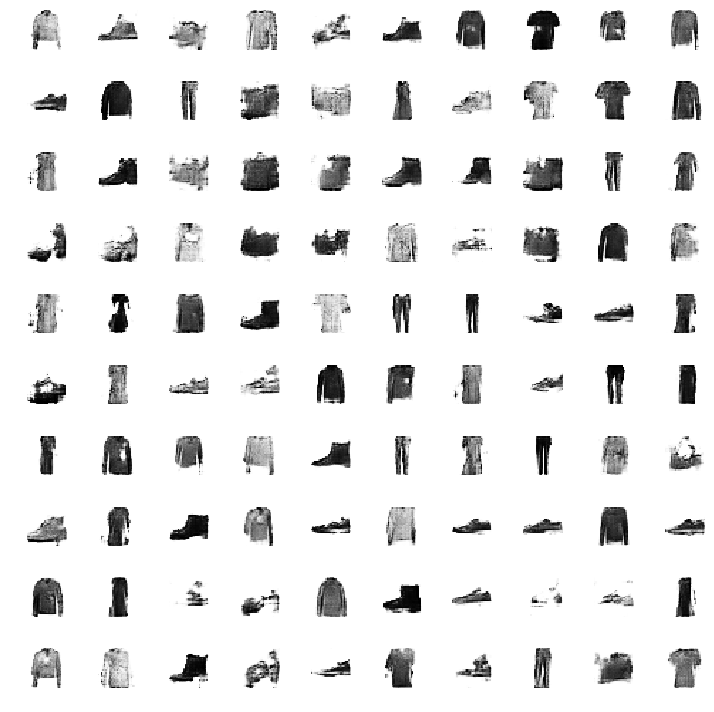

>Saved: conditional-gan_generated_plot_0010.png and conditional-gan_model_0010
>11, 1/468, d1=0.642, d2=0.683 g=0.774
>11, 2/468, d1=0.663, d2=0.704 g=0.784
>11, 3/468, d1=0.690, d2=0.685 g=0.773
>11, 4/468, d1=0.681, d2=0.701 g=0.794
>11, 5/468, d1=0.680, d2=0.671 g=0.767
>11, 6/468, d1=0.660, d2=0.661 g=0.753
>11, 7/468, d1=0.687, d2=0.682 g=0.778
>11, 8/468, d1=0.603, d2=0.689 g=0.774
>11, 9/468, d1=0.695, d2=0.663 g=0.785
>11, 10/468, d1=0.674, d2=0.659 g=0.806
>11, 11/468, d1=0.657, d2=0.672 g=0.804
>11, 12/468, d1=0.698, d2=0.650 g=0.813
>11, 13/468, d1=0.664, d2=0.670 g=0.834
>11, 14/468, d1=0.685, d2=0.637 g=0.803
>11, 15/468, d1=0.706, d2=0.676 g=0.789
>11, 16/468, d1=0.675, d2=0.663 g=0.769
>11, 17/468, d1=0.664, d2=0.668 g=0.814
>11, 18/468, d1=0.673, d2=0.622 g=0.805
>11, 19/468, d1=0.676, d2=0.614 g=0.803
>11, 20/468, d1=0.666, d2=0.652 g=0.771
>11, 21/468, d1=0.621, d2=0.701 g=0.751
>11, 22/468, d1=0.645, d2=0.689 g=0.756
>11, 23/468, d1=0.660, d2=0.673 g=0.779
>11, 24/46

>11, 202/468, d1=0.676, d2=0.649 g=0.759
>11, 203/468, d1=0.695, d2=0.657 g=0.805
>11, 204/468, d1=0.668, d2=0.667 g=0.760
>11, 205/468, d1=0.691, d2=0.675 g=0.774
>11, 206/468, d1=0.651, d2=0.666 g=0.752
>11, 207/468, d1=0.670, d2=0.650 g=0.771
>11, 208/468, d1=0.679, d2=0.682 g=0.782
>11, 209/468, d1=0.688, d2=0.636 g=0.779
>11, 210/468, d1=0.641, d2=0.678 g=0.784
>11, 211/468, d1=0.672, d2=0.681 g=0.772
>11, 212/468, d1=0.657, d2=0.724 g=0.789
>11, 213/468, d1=0.663, d2=0.670 g=0.756
>11, 214/468, d1=0.667, d2=0.669 g=0.760
>11, 215/468, d1=0.633, d2=0.652 g=0.770
>11, 216/468, d1=0.662, d2=0.680 g=0.769
>11, 217/468, d1=0.625, d2=0.687 g=0.778
>11, 218/468, d1=0.686, d2=0.654 g=0.779
>11, 219/468, d1=0.659, d2=0.682 g=0.771
>11, 220/468, d1=0.679, d2=0.645 g=0.791
>11, 221/468, d1=0.708, d2=0.685 g=0.795
>11, 222/468, d1=0.672, d2=0.624 g=0.786
>11, 223/468, d1=0.689, d2=0.663 g=0.779
>11, 224/468, d1=0.680, d2=0.663 g=0.772
>11, 225/468, d1=0.701, d2=0.699 g=0.749
>11, 226/468, d1

>11, 406/468, d1=0.651, d2=0.677 g=0.777
>11, 407/468, d1=0.669, d2=0.646 g=0.762
>11, 408/468, d1=0.647, d2=0.642 g=0.759
>11, 409/468, d1=0.658, d2=0.680 g=0.746
>11, 410/468, d1=0.669, d2=0.673 g=0.776
>11, 411/468, d1=0.672, d2=0.653 g=0.760
>11, 412/468, d1=0.690, d2=0.670 g=0.789
>11, 413/468, d1=0.686, d2=0.678 g=0.776
>11, 414/468, d1=0.686, d2=0.683 g=0.767
>11, 415/468, d1=0.685, d2=0.648 g=0.799
>11, 416/468, d1=0.697, d2=0.644 g=0.784
>11, 417/468, d1=0.662, d2=0.675 g=0.773
>11, 418/468, d1=0.645, d2=0.682 g=0.802
>11, 419/468, d1=0.688, d2=0.646 g=0.783
>11, 420/468, d1=0.637, d2=0.635 g=0.786
>11, 421/468, d1=0.673, d2=0.649 g=0.775
>11, 422/468, d1=0.698, d2=0.677 g=0.785
>11, 423/468, d1=0.685, d2=0.616 g=0.779
>11, 424/468, d1=0.679, d2=0.630 g=0.788
>11, 425/468, d1=0.712, d2=0.645 g=0.766
>11, 426/468, d1=0.673, d2=0.679 g=0.756
>11, 427/468, d1=0.689, d2=0.675 g=0.796
>11, 428/468, d1=0.655, d2=0.694 g=0.786
>11, 429/468, d1=0.673, d2=0.653 g=0.800
>11, 430/468, d1

>12, 141/468, d1=0.673, d2=0.669 g=0.799
>12, 142/468, d1=0.682, d2=0.697 g=0.774
>12, 143/468, d1=0.729, d2=0.645 g=0.759
>12, 144/468, d1=0.624, d2=0.639 g=0.799
>12, 145/468, d1=0.691, d2=0.642 g=0.790
>12, 146/468, d1=0.641, d2=0.672 g=0.768
>12, 147/468, d1=0.684, d2=0.668 g=0.751
>12, 148/468, d1=0.686, d2=0.660 g=0.721
>12, 149/468, d1=0.639, d2=0.719 g=0.751
>12, 150/468, d1=0.636, d2=0.698 g=0.787
>12, 151/468, d1=0.677, d2=0.667 g=0.805
>12, 152/468, d1=0.683, d2=0.653 g=0.826
>12, 153/468, d1=0.638, d2=0.615 g=0.805
>12, 154/468, d1=0.666, d2=0.655 g=0.787
>12, 155/468, d1=0.683, d2=0.692 g=0.748
>12, 156/468, d1=0.652, d2=0.725 g=0.757
>12, 157/468, d1=0.681, d2=0.619 g=0.777
>12, 158/468, d1=0.664, d2=0.644 g=0.788
>12, 159/468, d1=0.689, d2=0.692 g=0.772
>12, 160/468, d1=0.692, d2=0.659 g=0.749
>12, 161/468, d1=0.645, d2=0.693 g=0.743
>12, 162/468, d1=0.607, d2=0.672 g=0.753
>12, 163/468, d1=0.657, d2=0.663 g=0.755
>12, 164/468, d1=0.637, d2=0.685 g=0.761
>12, 165/468, d1

>12, 344/468, d1=0.662, d2=0.626 g=0.763
>12, 345/468, d1=0.688, d2=0.663 g=0.800
>12, 346/468, d1=0.684, d2=0.631 g=0.799
>12, 347/468, d1=0.659, d2=0.683 g=0.779
>12, 348/468, d1=0.685, d2=0.673 g=0.755
>12, 349/468, d1=0.647, d2=0.667 g=0.772
>12, 350/468, d1=0.651, d2=0.661 g=0.798
>12, 351/468, d1=0.700, d2=0.640 g=0.805
>12, 352/468, d1=0.655, d2=0.615 g=0.835
>12, 353/468, d1=0.660, d2=0.633 g=0.829
>12, 354/468, d1=0.702, d2=0.676 g=0.801
>12, 355/468, d1=0.719, d2=0.665 g=0.763
>12, 356/468, d1=0.718, d2=0.693 g=0.776
>12, 357/468, d1=0.675, d2=0.639 g=0.805
>12, 358/468, d1=0.666, d2=0.644 g=0.860
>12, 359/468, d1=0.662, d2=0.641 g=0.764
>12, 360/468, d1=0.638, d2=0.654 g=0.774
>12, 361/468, d1=0.687, d2=0.716 g=0.762
>12, 362/468, d1=0.688, d2=0.666 g=0.784
>12, 363/468, d1=0.667, d2=0.628 g=0.819
>12, 364/468, d1=0.664, d2=0.663 g=0.817
>12, 365/468, d1=0.683, d2=0.655 g=0.805
>12, 366/468, d1=0.708, d2=0.732 g=0.776
>12, 367/468, d1=0.682, d2=0.675 g=0.747
>12, 368/468, d1

>13, 79/468, d1=0.654, d2=0.686 g=0.753
>13, 80/468, d1=0.648, d2=0.676 g=0.786
>13, 81/468, d1=0.684, d2=0.627 g=0.785
>13, 82/468, d1=0.662, d2=0.692 g=0.795
>13, 83/468, d1=0.664, d2=0.617 g=0.811
>13, 84/468, d1=0.677, d2=0.676 g=0.781
>13, 85/468, d1=0.698, d2=0.643 g=0.732
>13, 86/468, d1=0.684, d2=0.703 g=0.765
>13, 87/468, d1=0.676, d2=0.658 g=0.812
>13, 88/468, d1=0.689, d2=0.671 g=0.823
>13, 89/468, d1=0.667, d2=0.651 g=0.808
>13, 90/468, d1=0.673, d2=0.656 g=0.750
>13, 91/468, d1=0.686, d2=0.640 g=0.751
>13, 92/468, d1=0.664, d2=0.726 g=0.768
>13, 93/468, d1=0.636, d2=0.696 g=0.771
>13, 94/468, d1=0.693, d2=0.623 g=0.843
>13, 95/468, d1=0.680, d2=0.640 g=0.812
>13, 96/468, d1=0.646, d2=0.635 g=0.761
>13, 97/468, d1=0.713, d2=0.706 g=0.751
>13, 98/468, d1=0.667, d2=0.674 g=0.794
>13, 99/468, d1=0.633, d2=0.672 g=0.783
>13, 100/468, d1=0.699, d2=0.636 g=0.770
>13, 101/468, d1=0.665, d2=0.687 g=0.779
>13, 102/468, d1=0.657, d2=0.702 g=0.766
>13, 103/468, d1=0.672, d2=0.699 g=0.

>13, 282/468, d1=0.650, d2=0.722 g=0.770
>13, 283/468, d1=0.647, d2=0.641 g=0.809
>13, 284/468, d1=0.660, d2=0.668 g=0.788
>13, 285/468, d1=0.683, d2=0.643 g=0.828
>13, 286/468, d1=0.644, d2=0.631 g=0.819
>13, 287/468, d1=0.687, d2=0.685 g=0.776
>13, 288/468, d1=0.709, d2=0.697 g=0.766
>13, 289/468, d1=0.687, d2=0.654 g=0.793
>13, 290/468, d1=0.644, d2=0.630 g=0.815
>13, 291/468, d1=0.718, d2=0.684 g=0.762
>13, 292/468, d1=0.665, d2=0.675 g=0.778
>13, 293/468, d1=0.682, d2=0.687 g=0.781
>13, 294/468, d1=0.686, d2=0.631 g=0.785
>13, 295/468, d1=0.699, d2=0.684 g=0.740
>13, 296/468, d1=0.658, d2=0.675 g=0.782
>13, 297/468, d1=0.659, d2=0.645 g=0.784
>13, 298/468, d1=0.685, d2=0.673 g=0.794
>13, 299/468, d1=0.674, d2=0.679 g=0.766
>13, 300/468, d1=0.665, d2=0.661 g=0.763
>13, 301/468, d1=0.658, d2=0.710 g=0.748
>13, 302/468, d1=0.676, d2=0.645 g=0.780
>13, 303/468, d1=0.652, d2=0.647 g=0.792
>13, 304/468, d1=0.625, d2=0.637 g=0.812
>13, 305/468, d1=0.669, d2=0.696 g=0.779
>13, 306/468, d1

>14, 17/468, d1=0.687, d2=0.645 g=0.801
>14, 18/468, d1=0.708, d2=0.664 g=0.784
>14, 19/468, d1=0.683, d2=0.746 g=0.758
>14, 20/468, d1=0.674, d2=0.685 g=0.765
>14, 21/468, d1=0.620, d2=0.646 g=0.796
>14, 22/468, d1=0.713, d2=0.626 g=0.790
>14, 23/468, d1=0.651, d2=0.651 g=0.787
>14, 24/468, d1=0.672, d2=0.696 g=0.759
>14, 25/468, d1=0.649, d2=0.694 g=0.779
>14, 26/468, d1=0.680, d2=0.636 g=0.824
>14, 27/468, d1=0.638, d2=0.661 g=0.805
>14, 28/468, d1=0.735, d2=0.632 g=0.826
>14, 29/468, d1=0.682, d2=0.681 g=0.799
>14, 30/468, d1=0.693, d2=0.664 g=0.787
>14, 31/468, d1=0.672, d2=0.663 g=0.769
>14, 32/468, d1=0.684, d2=0.657 g=0.771
>14, 33/468, d1=0.667, d2=0.663 g=0.777
>14, 34/468, d1=0.691, d2=0.687 g=0.772
>14, 35/468, d1=0.664, d2=0.672 g=0.797
>14, 36/468, d1=0.677, d2=0.673 g=0.779
>14, 37/468, d1=0.707, d2=0.663 g=0.768
>14, 38/468, d1=0.653, d2=0.670 g=0.773
>14, 39/468, d1=0.683, d2=0.631 g=0.769
>14, 40/468, d1=0.674, d2=0.683 g=0.770
>14, 41/468, d1=0.643, d2=0.651 g=0.794


>14, 224/468, d1=0.673, d2=0.662 g=0.829
>14, 225/468, d1=0.688, d2=0.732 g=0.795
>14, 226/468, d1=0.672, d2=0.651 g=0.777
>14, 227/468, d1=0.681, d2=0.660 g=0.823
>14, 228/468, d1=0.691, d2=0.667 g=0.751
>14, 229/468, d1=0.635, d2=0.649 g=0.770
>14, 230/468, d1=0.630, d2=0.647 g=0.750
>14, 231/468, d1=0.656, d2=0.652 g=0.754
>14, 232/468, d1=0.647, d2=0.707 g=0.758
>14, 233/468, d1=0.693, d2=0.690 g=0.785
>14, 234/468, d1=0.696, d2=0.631 g=0.768
>14, 235/468, d1=0.699, d2=0.659 g=0.768
>14, 236/468, d1=0.663, d2=0.654 g=0.766
>14, 237/468, d1=0.669, d2=0.678 g=0.749
>14, 238/468, d1=0.676, d2=0.683 g=0.771
>14, 239/468, d1=0.659, d2=0.680 g=0.752
>14, 240/468, d1=0.657, d2=0.662 g=0.779
>14, 241/468, d1=0.673, d2=0.648 g=0.764
>14, 242/468, d1=0.629, d2=0.672 g=0.752
>14, 243/468, d1=0.685, d2=0.701 g=0.768
>14, 244/468, d1=0.675, d2=0.688 g=0.759
>14, 245/468, d1=0.643, d2=0.664 g=0.760
>14, 246/468, d1=0.673, d2=0.641 g=0.799
>14, 247/468, d1=0.687, d2=0.645 g=0.771
>14, 248/468, d1

>14, 426/468, d1=0.653, d2=0.652 g=0.762
>14, 427/468, d1=0.657, d2=0.681 g=0.747
>14, 428/468, d1=0.663, d2=0.694 g=0.770
>14, 429/468, d1=0.646, d2=0.693 g=0.774
>14, 430/468, d1=0.707, d2=0.661 g=0.830
>14, 431/468, d1=0.673, d2=0.651 g=0.794
>14, 432/468, d1=0.703, d2=0.690 g=0.757
>14, 433/468, d1=0.690, d2=0.686 g=0.764
>14, 434/468, d1=0.703, d2=0.678 g=0.774
>14, 435/468, d1=0.670, d2=0.670 g=0.759
>14, 436/468, d1=0.679, d2=0.699 g=0.770
>14, 437/468, d1=0.688, d2=0.674 g=0.799
>14, 438/468, d1=0.657, d2=0.688 g=0.768
>14, 439/468, d1=0.687, d2=0.660 g=0.763
>14, 440/468, d1=0.643, d2=0.679 g=0.779
>14, 441/468, d1=0.695, d2=0.645 g=0.787
>14, 442/468, d1=0.688, d2=0.692 g=0.770
>14, 443/468, d1=0.690, d2=0.659 g=0.803
>14, 444/468, d1=0.689, d2=0.673 g=0.786
>14, 445/468, d1=0.676, d2=0.687 g=0.775
>14, 446/468, d1=0.671, d2=0.683 g=0.766
>14, 447/468, d1=0.644, d2=0.653 g=0.755
>14, 448/468, d1=0.686, d2=0.652 g=0.780
>14, 449/468, d1=0.677, d2=0.653 g=0.781
>14, 450/468, d1

>15, 166/468, d1=0.684, d2=0.679 g=0.753
>15, 167/468, d1=0.679, d2=0.702 g=0.753
>15, 168/468, d1=0.715, d2=0.717 g=0.746
>15, 169/468, d1=0.662, d2=0.680 g=0.765
>15, 170/468, d1=0.654, d2=0.691 g=0.761
>15, 171/468, d1=0.621, d2=0.707 g=0.740
>15, 172/468, d1=0.649, d2=0.729 g=0.745
>15, 173/468, d1=0.659, d2=0.658 g=0.776
>15, 174/468, d1=0.697, d2=0.681 g=0.793
>15, 175/468, d1=0.693, d2=0.684 g=0.762
>15, 176/468, d1=0.676, d2=0.658 g=0.761
>15, 177/468, d1=0.690, d2=0.669 g=0.764
>15, 178/468, d1=0.674, d2=0.659 g=0.760
>15, 179/468, d1=0.667, d2=0.640 g=0.770
>15, 180/468, d1=0.671, d2=0.657 g=0.772
>15, 181/468, d1=0.639, d2=0.662 g=0.783
>15, 182/468, d1=0.677, d2=0.678 g=0.793
>15, 183/468, d1=0.681, d2=0.686 g=0.775
>15, 184/468, d1=0.653, d2=0.687 g=0.785
>15, 185/468, d1=0.656, d2=0.704 g=0.786
>15, 186/468, d1=0.719, d2=0.652 g=0.801
>15, 187/468, d1=0.686, d2=0.642 g=0.789
>15, 188/468, d1=0.677, d2=0.657 g=0.772
>15, 189/468, d1=0.661, d2=0.698 g=0.779
>15, 190/468, d1

>15, 370/468, d1=0.692, d2=0.680 g=0.759
>15, 371/468, d1=0.649, d2=0.680 g=0.750
>15, 372/468, d1=0.661, d2=0.663 g=0.790
>15, 373/468, d1=0.703, d2=0.673 g=0.762
>15, 374/468, d1=0.665, d2=0.676 g=0.783
>15, 375/468, d1=0.709, d2=0.695 g=0.764
>15, 376/468, d1=0.660, d2=0.653 g=0.780
>15, 377/468, d1=0.651, d2=0.654 g=0.769
>15, 378/468, d1=0.633, d2=0.656 g=0.765
>15, 379/468, d1=0.693, d2=0.670 g=0.780
>15, 380/468, d1=0.689, d2=0.688 g=0.809
>15, 381/468, d1=0.702, d2=0.624 g=0.803
>15, 382/468, d1=0.662, d2=0.664 g=0.797
>15, 383/468, d1=0.667, d2=0.645 g=0.768
>15, 384/468, d1=0.686, d2=0.706 g=0.777
>15, 385/468, d1=0.708, d2=0.667 g=0.767
>15, 386/468, d1=0.673, d2=0.664 g=0.773
>15, 387/468, d1=0.705, d2=0.643 g=0.771
>15, 388/468, d1=0.663, d2=0.672 g=0.789
>15, 389/468, d1=0.651, d2=0.694 g=0.760
>15, 390/468, d1=0.688, d2=0.665 g=0.756
>15, 391/468, d1=0.602, d2=0.671 g=0.793
>15, 392/468, d1=0.716, d2=0.679 g=0.784
>15, 393/468, d1=0.675, d2=0.640 g=0.806
>15, 394/468, d1

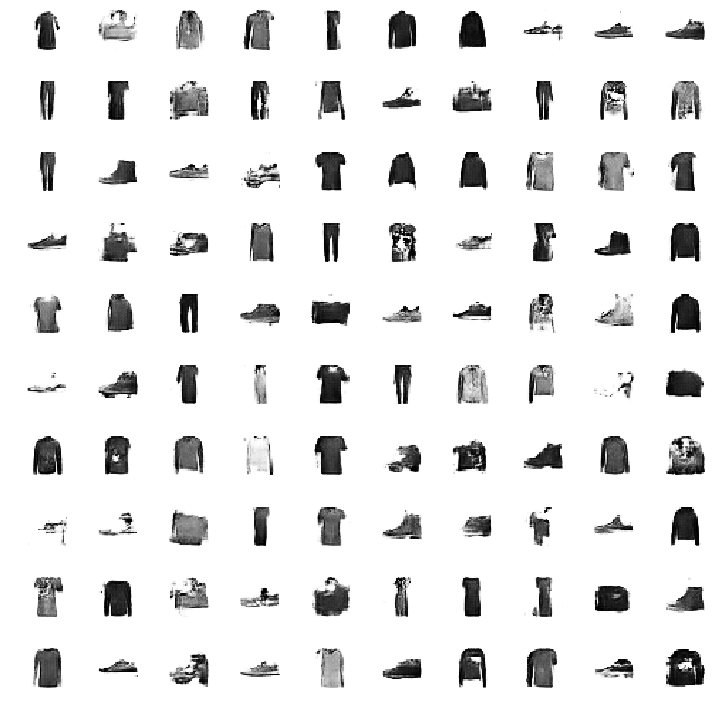

>Saved: conditional-gan_generated_plot_0015.png and conditional-gan_model_0015
>16, 1/468, d1=0.644, d2=0.705 g=0.783
>16, 2/468, d1=0.711, d2=0.731 g=0.804
>16, 3/468, d1=0.626, d2=0.671 g=0.802
>16, 4/468, d1=0.673, d2=0.636 g=0.816
>16, 5/468, d1=0.702, d2=0.630 g=0.791
>16, 6/468, d1=0.644, d2=0.688 g=0.802
>16, 7/468, d1=0.692, d2=0.624 g=0.816
>16, 8/468, d1=0.704, d2=0.655 g=0.779
>16, 9/468, d1=0.658, d2=0.670 g=0.763
>16, 10/468, d1=0.664, d2=0.679 g=0.767
>16, 11/468, d1=0.665, d2=0.675 g=0.765
>16, 12/468, d1=0.634, d2=0.668 g=0.792
>16, 13/468, d1=0.681, d2=0.618 g=0.774
>16, 14/468, d1=0.672, d2=0.682 g=0.755
>16, 15/468, d1=0.652, d2=0.696 g=0.754
>16, 16/468, d1=0.690, d2=0.700 g=0.794
>16, 17/468, d1=0.702, d2=0.666 g=0.772
>16, 18/468, d1=0.699, d2=0.670 g=0.776
>16, 19/468, d1=0.678, d2=0.701 g=0.768
>16, 20/468, d1=0.690, d2=0.645 g=0.799
>16, 21/468, d1=0.622, d2=0.646 g=0.753
>16, 22/468, d1=0.705, d2=0.647 g=0.754
>16, 23/468, d1=0.687, d2=0.675 g=0.779
>16, 24/46

>16, 203/468, d1=0.656, d2=0.669 g=0.793
>16, 204/468, d1=0.678, d2=0.680 g=0.777
>16, 205/468, d1=0.689, d2=0.644 g=0.758
>16, 206/468, d1=0.703, d2=0.664 g=0.746
>16, 207/468, d1=0.692, d2=0.674 g=0.765
>16, 208/468, d1=0.642, d2=0.701 g=0.769
>16, 209/468, d1=0.665, d2=0.700 g=0.769
>16, 210/468, d1=0.672, d2=0.665 g=0.774
>16, 211/468, d1=0.673, d2=0.663 g=0.767
>16, 212/468, d1=0.690, d2=0.640 g=0.762
>16, 213/468, d1=0.678, d2=0.681 g=0.769
>16, 214/468, d1=0.673, d2=0.660 g=0.783
>16, 215/468, d1=0.691, d2=0.731 g=0.759
>16, 216/468, d1=0.686, d2=0.654 g=0.762
>16, 217/468, d1=0.615, d2=0.688 g=0.768
>16, 218/468, d1=0.696, d2=0.695 g=0.742
>16, 219/468, d1=0.665, d2=0.669 g=0.743
>16, 220/468, d1=0.658, d2=0.652 g=0.747
>16, 221/468, d1=0.707, d2=0.662 g=0.787
>16, 222/468, d1=0.681, d2=0.641 g=0.782
>16, 223/468, d1=0.676, d2=0.679 g=0.807
>16, 224/468, d1=0.661, d2=0.662 g=0.798
>16, 225/468, d1=0.685, d2=0.677 g=0.773
>16, 226/468, d1=0.712, d2=0.708 g=0.761
>16, 227/468, d1

>16, 406/468, d1=0.657, d2=0.662 g=0.779
>16, 407/468, d1=0.656, d2=0.642 g=0.805
>16, 408/468, d1=0.654, d2=0.670 g=0.819
>16, 409/468, d1=0.689, d2=0.651 g=0.774
>16, 410/468, d1=0.675, d2=0.692 g=0.764
>16, 411/468, d1=0.663, d2=0.701 g=0.759
>16, 412/468, d1=0.685, d2=0.662 g=0.802
>16, 413/468, d1=0.682, d2=0.645 g=0.844
>16, 414/468, d1=0.657, d2=0.624 g=0.776
>16, 415/468, d1=0.681, d2=0.650 g=0.775
>16, 416/468, d1=0.673, d2=0.721 g=0.770
>16, 417/468, d1=0.675, d2=0.706 g=0.775
>16, 418/468, d1=0.630, d2=0.676 g=0.792
>16, 419/468, d1=0.635, d2=0.659 g=0.803
>16, 420/468, d1=0.658, d2=0.649 g=0.799
>16, 421/468, d1=0.668, d2=0.631 g=0.822
>16, 422/468, d1=0.635, d2=0.662 g=0.770
>16, 423/468, d1=0.667, d2=0.682 g=0.755
>16, 424/468, d1=0.661, d2=0.671 g=0.794
>16, 425/468, d1=0.621, d2=0.659 g=0.797
>16, 426/468, d1=0.714, d2=0.631 g=0.798
>16, 427/468, d1=0.662, d2=0.630 g=0.768
>16, 428/468, d1=0.698, d2=0.690 g=0.766
>16, 429/468, d1=0.677, d2=0.646 g=0.773
>16, 430/468, d1

>17, 141/468, d1=0.667, d2=0.673 g=0.800
>17, 142/468, d1=0.691, d2=0.632 g=0.793
>17, 143/468, d1=0.666, d2=0.679 g=0.774
>17, 144/468, d1=0.662, d2=0.670 g=0.767
>17, 145/468, d1=0.677, d2=0.637 g=0.758
>17, 146/468, d1=0.659, d2=0.672 g=0.785
>17, 147/468, d1=0.693, d2=0.683 g=0.769
>17, 148/468, d1=0.660, d2=0.655 g=0.788
>17, 149/468, d1=0.659, d2=0.663 g=0.794
>17, 150/468, d1=0.643, d2=0.658 g=0.762
>17, 151/468, d1=0.696, d2=0.652 g=0.768
>17, 152/468, d1=0.668, d2=0.693 g=0.760
>17, 153/468, d1=0.666, d2=0.632 g=0.809
>17, 154/468, d1=0.683, d2=0.633 g=0.774
>17, 155/468, d1=0.679, d2=0.666 g=0.795
>17, 156/468, d1=0.649, d2=0.661 g=0.765
>17, 157/468, d1=0.692, d2=0.679 g=0.775
>17, 158/468, d1=0.690, d2=0.668 g=0.771
>17, 159/468, d1=0.649, d2=0.655 g=0.804
>17, 160/468, d1=0.652, d2=0.709 g=0.759
>17, 161/468, d1=0.660, d2=0.627 g=0.837
>17, 162/468, d1=0.702, d2=0.662 g=0.819
>17, 163/468, d1=0.677, d2=0.666 g=0.805
>17, 164/468, d1=0.686, d2=0.653 g=0.771
>17, 165/468, d1

>17, 345/468, d1=0.671, d2=0.694 g=0.740
>17, 346/468, d1=0.679, d2=0.668 g=0.786
>17, 347/468, d1=0.643, d2=0.633 g=0.787
>17, 348/468, d1=0.675, d2=0.638 g=0.821
>17, 349/468, d1=0.669, d2=0.662 g=0.798
>17, 350/468, d1=0.655, d2=0.656 g=0.756
>17, 351/468, d1=0.656, d2=0.658 g=0.777
>17, 352/468, d1=0.678, d2=0.685 g=0.760
>17, 353/468, d1=0.630, d2=0.702 g=0.766
>17, 354/468, d1=0.674, d2=0.674 g=0.807
>17, 355/468, d1=0.660, d2=0.635 g=0.785
>17, 356/468, d1=0.673, d2=0.655 g=0.796
>17, 357/468, d1=0.655, d2=0.731 g=0.747
>17, 358/468, d1=0.654, d2=0.711 g=0.775
>17, 359/468, d1=0.679, d2=0.637 g=0.806
>17, 360/468, d1=0.690, d2=0.652 g=0.830
>17, 361/468, d1=0.685, d2=0.643 g=0.846
>17, 362/468, d1=0.658, d2=0.632 g=0.772
>17, 363/468, d1=0.644, d2=0.662 g=0.766
>17, 364/468, d1=0.599, d2=0.733 g=0.771
>17, 365/468, d1=0.667, d2=0.663 g=0.831
>17, 366/468, d1=0.672, d2=0.650 g=0.907
>17, 367/468, d1=0.668, d2=0.590 g=0.863
>17, 368/468, d1=0.665, d2=0.630 g=0.811
>17, 369/468, d1

>18, 80/468, d1=0.641, d2=0.653 g=0.773
>18, 81/468, d1=0.673, d2=0.658 g=0.783
>18, 82/468, d1=0.685, d2=0.656 g=0.772
>18, 83/468, d1=0.695, d2=0.686 g=0.791
>18, 84/468, d1=0.668, d2=0.643 g=0.756
>18, 85/468, d1=0.682, d2=0.654 g=0.780
>18, 86/468, d1=0.613, d2=0.643 g=0.808
>18, 87/468, d1=0.677, d2=0.658 g=0.797
>18, 88/468, d1=0.695, d2=0.621 g=0.828
>18, 89/468, d1=0.705, d2=0.653 g=0.815
>18, 90/468, d1=0.698, d2=0.674 g=0.788
>18, 91/468, d1=0.684, d2=0.665 g=0.768
>18, 92/468, d1=0.682, d2=0.639 g=0.767
>18, 93/468, d1=0.636, d2=0.671 g=0.803
>18, 94/468, d1=0.646, d2=0.664 g=0.769
>18, 95/468, d1=0.665, d2=0.644 g=0.768
>18, 96/468, d1=0.676, d2=0.725 g=0.768
>18, 97/468, d1=0.636, d2=0.630 g=0.786
>18, 98/468, d1=0.679, d2=0.650 g=0.824
>18, 99/468, d1=0.679, d2=0.622 g=0.807
>18, 100/468, d1=0.659, d2=0.682 g=0.823
>18, 101/468, d1=0.682, d2=0.672 g=0.741
>18, 102/468, d1=0.639, d2=0.645 g=0.761
>18, 103/468, d1=0.662, d2=0.661 g=0.768
>18, 104/468, d1=0.659, d2=0.668 g=0

>18, 284/468, d1=0.659, d2=0.741 g=0.740
>18, 285/468, d1=0.699, d2=0.680 g=0.779
>18, 286/468, d1=0.657, d2=0.678 g=0.782
>18, 287/468, d1=0.635, d2=0.642 g=0.784
>18, 288/468, d1=0.679, d2=0.638 g=0.812
>18, 289/468, d1=0.662, d2=0.667 g=0.788
>18, 290/468, d1=0.634, d2=0.662 g=0.753
>18, 291/468, d1=0.681, d2=0.673 g=0.756
>18, 292/468, d1=0.675, d2=0.670 g=0.778
>18, 293/468, d1=0.652, d2=0.632 g=0.778
>18, 294/468, d1=0.667, d2=0.672 g=0.784
>18, 295/468, d1=0.662, d2=0.643 g=0.807
>18, 296/468, d1=0.626, d2=0.691 g=0.771
>18, 297/468, d1=0.680, d2=0.687 g=0.751
>18, 298/468, d1=0.663, d2=0.692 g=0.766
>18, 299/468, d1=0.635, d2=0.643 g=0.809
>18, 300/468, d1=0.662, d2=0.657 g=0.800
>18, 301/468, d1=0.684, d2=0.623 g=0.831
>18, 302/468, d1=0.670, d2=0.645 g=0.758
>18, 303/468, d1=0.662, d2=0.700 g=0.773
>18, 304/468, d1=0.675, d2=0.660 g=0.775
>18, 305/468, d1=0.657, d2=0.646 g=0.801
>18, 306/468, d1=0.699, d2=0.670 g=0.782
>18, 307/468, d1=0.643, d2=0.673 g=0.766
>18, 308/468, d1

>19, 19/468, d1=0.662, d2=0.673 g=0.766
>19, 20/468, d1=0.680, d2=0.703 g=0.783
>19, 21/468, d1=0.632, d2=0.669 g=0.768
>19, 22/468, d1=0.649, d2=0.668 g=0.790
>19, 23/468, d1=0.697, d2=0.679 g=0.776
>19, 24/468, d1=0.653, d2=0.650 g=0.798
>19, 25/468, d1=0.728, d2=0.655 g=0.742
>19, 26/468, d1=0.659, d2=0.672 g=0.755
>19, 27/468, d1=0.678, d2=0.621 g=0.777
>19, 28/468, d1=0.688, d2=0.716 g=0.762
>19, 29/468, d1=0.694, d2=0.660 g=0.799
>19, 30/468, d1=0.697, d2=0.683 g=0.766
>19, 31/468, d1=0.685, d2=0.644 g=0.808
>19, 32/468, d1=0.690, d2=0.645 g=0.765
>19, 33/468, d1=0.649, d2=0.695 g=0.777
>19, 34/468, d1=0.682, d2=0.653 g=0.784
>19, 35/468, d1=0.634, d2=0.653 g=0.770
>19, 36/468, d1=0.681, d2=0.687 g=0.790
>19, 37/468, d1=0.681, d2=0.678 g=0.800
>19, 38/468, d1=0.697, d2=0.668 g=0.754
>19, 39/468, d1=0.652, d2=0.652 g=0.808
>19, 40/468, d1=0.715, d2=0.639 g=0.807
>19, 41/468, d1=0.652, d2=0.638 g=0.803
>19, 42/468, d1=0.679, d2=0.678 g=0.771
>19, 43/468, d1=0.708, d2=0.716 g=0.765


>19, 223/468, d1=0.646, d2=0.672 g=0.770
>19, 224/468, d1=0.661, d2=0.688 g=0.776
>19, 225/468, d1=0.631, d2=0.660 g=0.781
>19, 226/468, d1=0.669, d2=0.683 g=0.795
>19, 227/468, d1=0.671, d2=0.660 g=0.778
>19, 228/468, d1=0.697, d2=0.706 g=0.806
>19, 229/468, d1=0.665, d2=0.662 g=0.794
>19, 230/468, d1=0.689, d2=0.655 g=0.742
>19, 231/468, d1=0.692, d2=0.677 g=0.774
>19, 232/468, d1=0.667, d2=0.655 g=0.771
>19, 233/468, d1=0.680, d2=0.676 g=0.778
>19, 234/468, d1=0.664, d2=0.643 g=0.778
>19, 235/468, d1=0.620, d2=0.693 g=0.795
>19, 236/468, d1=0.643, d2=0.650 g=0.778
>19, 237/468, d1=0.716, d2=0.649 g=0.800
>19, 238/468, d1=0.667, d2=0.689 g=0.819
>19, 239/468, d1=0.721, d2=0.710 g=0.768
>19, 240/468, d1=0.650, d2=0.610 g=0.809
>19, 241/468, d1=0.670, d2=0.669 g=0.795
>19, 242/468, d1=0.681, d2=0.678 g=0.771
>19, 243/468, d1=0.699, d2=0.659 g=0.762
>19, 244/468, d1=0.665, d2=0.677 g=0.755
>19, 245/468, d1=0.621, d2=0.639 g=0.780
>19, 246/468, d1=0.682, d2=0.668 g=0.772
>19, 247/468, d1

>19, 427/468, d1=0.674, d2=0.617 g=0.813
>19, 428/468, d1=0.658, d2=0.621 g=0.844
>19, 429/468, d1=0.636, d2=0.623 g=0.814
>19, 430/468, d1=0.700, d2=0.665 g=0.766
>19, 431/468, d1=0.687, d2=0.651 g=0.808
>19, 432/468, d1=0.641, d2=0.617 g=0.837
>19, 433/468, d1=0.710, d2=0.622 g=0.842
>19, 434/468, d1=0.628, d2=0.654 g=0.780
>19, 435/468, d1=0.653, d2=0.674 g=0.784
>19, 436/468, d1=0.683, d2=0.672 g=0.755
>19, 437/468, d1=0.661, d2=0.634 g=0.773
>19, 438/468, d1=0.651, d2=0.655 g=0.815
>19, 439/468, d1=0.706, d2=0.662 g=0.783
>19, 440/468, d1=0.736, d2=0.657 g=0.763
>19, 441/468, d1=0.663, d2=0.688 g=0.751
>19, 442/468, d1=0.660, d2=0.650 g=0.761
>19, 443/468, d1=0.657, d2=0.666 g=0.775
>19, 444/468, d1=0.664, d2=0.713 g=0.783
>19, 445/468, d1=0.625, d2=0.649 g=0.754
>19, 446/468, d1=0.660, d2=0.711 g=0.755
>19, 447/468, d1=0.625, d2=0.697 g=0.804
>19, 448/468, d1=0.669, d2=0.654 g=0.843
>19, 449/468, d1=0.692, d2=0.601 g=0.833
>19, 450/468, d1=0.697, d2=0.644 g=0.806
>19, 451/468, d1

>20, 163/468, d1=0.695, d2=0.654 g=0.826
>20, 164/468, d1=0.658, d2=0.646 g=0.807
>20, 165/468, d1=0.717, d2=0.667 g=0.798
>20, 166/468, d1=0.696, d2=0.718 g=0.772
>20, 167/468, d1=0.685, d2=0.688 g=0.795
>20, 168/468, d1=0.665, d2=0.687 g=0.787
>20, 169/468, d1=0.688, d2=0.677 g=0.775
>20, 170/468, d1=0.634, d2=0.720 g=0.768
>20, 171/468, d1=0.677, d2=0.637 g=0.802
>20, 172/468, d1=0.681, d2=0.624 g=0.789
>20, 173/468, d1=0.708, d2=0.633 g=0.791
>20, 174/468, d1=0.689, d2=0.651 g=0.784
>20, 175/468, d1=0.668, d2=0.671 g=0.767
>20, 176/468, d1=0.667, d2=0.664 g=0.781
>20, 177/468, d1=0.649, d2=0.659 g=0.797
>20, 178/468, d1=0.686, d2=0.679 g=0.786
>20, 179/468, d1=0.658, d2=0.635 g=0.793
>20, 180/468, d1=0.689, d2=0.687 g=0.763
>20, 181/468, d1=0.622, d2=0.719 g=0.735
>20, 182/468, d1=0.650, d2=0.678 g=0.768
>20, 183/468, d1=0.651, d2=0.654 g=0.801
>20, 184/468, d1=0.675, d2=0.616 g=0.808
>20, 185/468, d1=0.639, d2=0.644 g=0.825
>20, 186/468, d1=0.679, d2=0.668 g=0.804
>20, 187/468, d1

>20, 367/468, d1=0.636, d2=0.672 g=0.769
>20, 368/468, d1=0.658, d2=0.649 g=0.799
>20, 369/468, d1=0.653, d2=0.681 g=0.774
>20, 370/468, d1=0.708, d2=0.685 g=0.799
>20, 371/468, d1=0.664, d2=0.666 g=0.769
>20, 372/468, d1=0.639, d2=0.658 g=0.766
>20, 373/468, d1=0.671, d2=0.661 g=0.782
>20, 374/468, d1=0.653, d2=0.691 g=0.790
>20, 375/468, d1=0.625, d2=0.674 g=0.804
>20, 376/468, d1=0.636, d2=0.685 g=0.769
>20, 377/468, d1=0.660, d2=0.678 g=0.803
>20, 378/468, d1=0.680, d2=0.634 g=0.791
>20, 379/468, d1=0.682, d2=0.686 g=0.794
>20, 380/468, d1=0.673, d2=0.624 g=0.828
>20, 381/468, d1=0.704, d2=0.634 g=0.817
>20, 382/468, d1=0.693, d2=0.654 g=0.807
>20, 383/468, d1=0.710, d2=0.663 g=0.806
>20, 384/468, d1=0.673, d2=0.680 g=0.779
>20, 385/468, d1=0.682, d2=0.684 g=0.772
>20, 386/468, d1=0.651, d2=0.674 g=0.785
>20, 387/468, d1=0.673, d2=0.660 g=0.763
>20, 388/468, d1=0.637, d2=0.687 g=0.804
>20, 389/468, d1=0.674, d2=0.666 g=0.783
>20, 390/468, d1=0.666, d2=0.639 g=0.763
>20, 391/468, d1

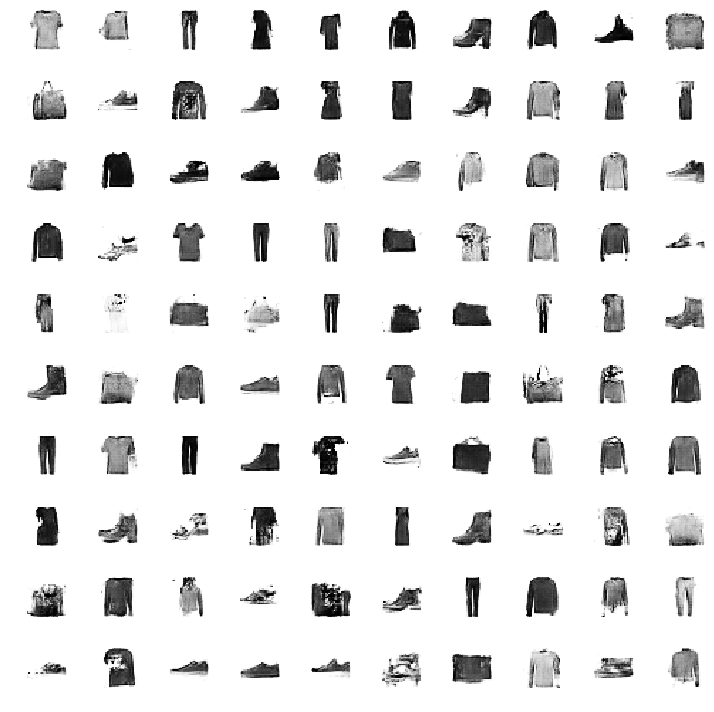

>Saved: conditional-gan_generated_plot_0020.png and conditional-gan_model_0020
>21, 1/468, d1=0.660, d2=0.666 g=0.760
>21, 2/468, d1=0.634, d2=0.673 g=0.763
>21, 3/468, d1=0.614, d2=0.671 g=0.743
>21, 4/468, d1=0.658, d2=0.655 g=0.758
>21, 5/468, d1=0.648, d2=0.653 g=0.775
>21, 6/468, d1=0.674, d2=0.672 g=0.789
>21, 7/468, d1=0.662, d2=0.638 g=0.784
>21, 8/468, d1=0.652, d2=0.652 g=0.767
>21, 9/468, d1=0.640, d2=0.657 g=0.788
>21, 10/468, d1=0.701, d2=0.641 g=0.772
>21, 11/468, d1=0.725, d2=0.666 g=0.790
>21, 12/468, d1=0.681, d2=0.620 g=0.762
>21, 13/468, d1=0.675, d2=0.675 g=0.770
>21, 14/468, d1=0.694, d2=0.637 g=0.779
>21, 15/468, d1=0.642, d2=0.635 g=0.798
>21, 16/468, d1=0.639, d2=0.680 g=0.756
>21, 17/468, d1=0.683, d2=0.650 g=0.743
>21, 18/468, d1=0.653, d2=0.642 g=0.756
>21, 19/468, d1=0.677, d2=0.690 g=0.763
>21, 20/468, d1=0.688, d2=0.647 g=0.751
>21, 21/468, d1=0.685, d2=0.716 g=0.783
>21, 22/468, d1=0.643, d2=0.698 g=0.747
>21, 23/468, d1=0.623, d2=0.666 g=0.804
>21, 24/46

>21, 207/468, d1=0.674, d2=0.694 g=0.791
>21, 208/468, d1=0.711, d2=0.642 g=0.816
>21, 209/468, d1=0.658, d2=0.659 g=0.819
>21, 210/468, d1=0.691, d2=0.670 g=0.783
>21, 211/468, d1=0.678, d2=0.639 g=0.783
>21, 212/468, d1=0.663, d2=0.678 g=0.791
>21, 213/468, d1=0.697, d2=0.686 g=0.785
>21, 214/468, d1=0.696, d2=0.693 g=0.778
>21, 215/468, d1=0.665, d2=0.676 g=0.770
>21, 216/468, d1=0.679, d2=0.663 g=0.786
>21, 217/468, d1=0.653, d2=0.639 g=0.776
>21, 218/468, d1=0.649, d2=0.670 g=0.796
>21, 219/468, d1=0.654, d2=0.619 g=0.787
>21, 220/468, d1=0.683, d2=0.642 g=0.793
>21, 221/468, d1=0.667, d2=0.720 g=0.763
>21, 222/468, d1=0.698, d2=0.695 g=0.762
>21, 223/468, d1=0.670, d2=0.663 g=0.793
>21, 224/468, d1=0.659, d2=0.675 g=0.799
>21, 225/468, d1=0.674, d2=0.666 g=0.762
>21, 226/468, d1=0.690, d2=0.670 g=0.756
>21, 227/468, d1=0.640, d2=0.689 g=0.760
>21, 228/468, d1=0.655, d2=0.699 g=0.779
>21, 229/468, d1=0.691, d2=0.642 g=0.807
>21, 230/468, d1=0.669, d2=0.638 g=0.802
>21, 231/468, d1

>21, 411/468, d1=0.623, d2=0.683 g=0.771
>21, 412/468, d1=0.628, d2=0.624 g=0.817
>21, 413/468, d1=0.681, d2=0.664 g=0.762
>21, 414/468, d1=0.672, d2=0.704 g=0.812
>21, 415/468, d1=0.670, d2=0.661 g=0.771
>21, 416/468, d1=0.663, d2=0.652 g=0.765
>21, 417/468, d1=0.662, d2=0.677 g=0.770
>21, 418/468, d1=0.678, d2=0.661 g=0.764
>21, 419/468, d1=0.604, d2=0.675 g=0.771
>21, 420/468, d1=0.617, d2=0.659 g=0.783
>21, 421/468, d1=0.660, d2=0.669 g=0.785
>21, 422/468, d1=0.709, d2=0.681 g=0.766
>21, 423/468, d1=0.670, d2=0.637 g=0.772
>21, 424/468, d1=0.645, d2=0.642 g=0.751
>21, 425/468, d1=0.691, d2=0.670 g=0.765
>21, 426/468, d1=0.670, d2=0.686 g=0.788
>21, 427/468, d1=0.682, d2=0.703 g=0.783
>21, 428/468, d1=0.716, d2=0.667 g=0.766
>21, 429/468, d1=0.651, d2=0.684 g=0.775
>21, 430/468, d1=0.656, d2=0.686 g=0.792
>21, 431/468, d1=0.735, d2=0.657 g=0.761
>21, 432/468, d1=0.665, d2=0.691 g=0.765
>21, 433/468, d1=0.673, d2=0.668 g=0.794
>21, 434/468, d1=0.678, d2=0.670 g=0.811
>21, 435/468, d1

>22, 146/468, d1=0.652, d2=0.675 g=0.791
>22, 147/468, d1=0.674, d2=0.697 g=0.769
>22, 148/468, d1=0.716, d2=0.678 g=0.796
>22, 149/468, d1=0.701, d2=0.695 g=0.834
>22, 150/468, d1=0.673, d2=0.637 g=0.836
>22, 151/468, d1=0.713, d2=0.643 g=0.806
>22, 152/468, d1=0.738, d2=0.667 g=0.801
>22, 153/468, d1=0.707, d2=0.654 g=0.780
>22, 154/468, d1=0.657, d2=0.675 g=0.789
>22, 155/468, d1=0.666, d2=0.676 g=0.797
>22, 156/468, d1=0.688, d2=0.641 g=0.802
>22, 157/468, d1=0.678, d2=0.670 g=0.784
>22, 158/468, d1=0.647, d2=0.688 g=0.741
>22, 159/468, d1=0.657, d2=0.680 g=0.729
>22, 160/468, d1=0.671, d2=0.681 g=0.781
>22, 161/468, d1=0.667, d2=0.680 g=0.787
>22, 162/468, d1=0.686, d2=0.682 g=0.768
>22, 163/468, d1=0.645, d2=0.661 g=0.786
>22, 164/468, d1=0.657, d2=0.658 g=0.767
>22, 165/468, d1=0.642, d2=0.648 g=0.768
>22, 166/468, d1=0.657, d2=0.703 g=0.781
>22, 167/468, d1=0.672, d2=0.642 g=0.807
>22, 168/468, d1=0.724, d2=0.638 g=0.795
>22, 169/468, d1=0.690, d2=0.689 g=0.752
>22, 170/468, d1

>22, 350/468, d1=0.689, d2=0.671 g=0.757
>22, 351/468, d1=0.707, d2=0.703 g=0.781
>22, 352/468, d1=0.649, d2=0.686 g=0.780
>22, 353/468, d1=0.660, d2=0.670 g=0.807
>22, 354/468, d1=0.688, d2=0.646 g=0.795
>22, 355/468, d1=0.690, d2=0.652 g=0.786
>22, 356/468, d1=0.702, d2=0.702 g=0.753
>22, 357/468, d1=0.660, d2=0.700 g=0.755
>22, 358/468, d1=0.678, d2=0.674 g=0.804
>22, 359/468, d1=0.643, d2=0.654 g=0.794
>22, 360/468, d1=0.665, d2=0.690 g=0.799
>22, 361/468, d1=0.669, d2=0.678 g=0.766
>22, 362/468, d1=0.694, d2=0.663 g=0.782
>22, 363/468, d1=0.691, d2=0.692 g=0.797
>22, 364/468, d1=0.668, d2=0.615 g=0.792
>22, 365/468, d1=0.656, d2=0.692 g=0.800
>22, 366/468, d1=0.657, d2=0.632 g=0.796
>22, 367/468, d1=0.658, d2=0.685 g=0.750
>22, 368/468, d1=0.680, d2=0.706 g=0.781
>22, 369/468, d1=0.664, d2=0.651 g=0.777
>22, 370/468, d1=0.694, d2=0.663 g=0.776
>22, 371/468, d1=0.670, d2=0.675 g=0.755
>22, 372/468, d1=0.641, d2=0.660 g=0.809
>22, 373/468, d1=0.634, d2=0.666 g=0.785
>22, 374/468, d1

>23, 85/468, d1=0.648, d2=0.673 g=0.775
>23, 86/468, d1=0.644, d2=0.687 g=0.771
>23, 87/468, d1=0.636, d2=0.658 g=0.787
>23, 88/468, d1=0.666, d2=0.688 g=0.768
>23, 89/468, d1=0.666, d2=0.697 g=0.780
>23, 90/468, d1=0.673, d2=0.659 g=0.786
>23, 91/468, d1=0.646, d2=0.652 g=0.795
>23, 92/468, d1=0.669, d2=0.654 g=0.786
>23, 93/468, d1=0.668, d2=0.670 g=0.785
>23, 94/468, d1=0.701, d2=0.659 g=0.752
>23, 95/468, d1=0.658, d2=0.672 g=0.775
>23, 96/468, d1=0.675, d2=0.698 g=0.775
>23, 97/468, d1=0.682, d2=0.647 g=0.794
>23, 98/468, d1=0.674, d2=0.642 g=0.792
>23, 99/468, d1=0.720, d2=0.648 g=0.772
>23, 100/468, d1=0.670, d2=0.655 g=0.745
>23, 101/468, d1=0.671, d2=0.684 g=0.775
>23, 102/468, d1=0.659, d2=0.669 g=0.793
>23, 103/468, d1=0.663, d2=0.651 g=0.825
>23, 104/468, d1=0.672, d2=0.708 g=0.794
>23, 105/468, d1=0.688, d2=0.670 g=0.775
>23, 106/468, d1=0.639, d2=0.724 g=0.805
>23, 107/468, d1=0.682, d2=0.667 g=0.767
>23, 108/468, d1=0.673, d2=0.674 g=0.804
>23, 109/468, d1=0.662, d2=0.64

>23, 289/468, d1=0.701, d2=0.635 g=0.799
>23, 290/468, d1=0.704, d2=0.689 g=0.772
>23, 291/468, d1=0.697, d2=0.681 g=0.774
>23, 292/468, d1=0.668, d2=0.654 g=0.814
>23, 293/468, d1=0.671, d2=0.623 g=0.818
>23, 294/468, d1=0.678, d2=0.660 g=0.817
>23, 295/468, d1=0.636, d2=0.651 g=0.781
>23, 296/468, d1=0.698, d2=0.660 g=0.769
>23, 297/468, d1=0.629, d2=0.701 g=0.768
>23, 298/468, d1=0.639, d2=0.648 g=0.790
>23, 299/468, d1=0.646, d2=0.662 g=0.801
>23, 300/468, d1=0.701, d2=0.670 g=0.809
>23, 301/468, d1=0.634, d2=0.625 g=0.798
>23, 302/468, d1=0.690, d2=0.663 g=0.781
>23, 303/468, d1=0.693, d2=0.701 g=0.781
>23, 304/468, d1=0.674, d2=0.686 g=0.782
>23, 305/468, d1=0.661, d2=0.668 g=0.828
>23, 306/468, d1=0.685, d2=0.639 g=0.865
>23, 307/468, d1=0.679, d2=0.671 g=0.772
>23, 308/468, d1=0.648, d2=0.710 g=0.750
>23, 309/468, d1=0.625, d2=0.722 g=0.789
>23, 310/468, d1=0.654, d2=0.689 g=0.789
>23, 311/468, d1=0.703, d2=0.615 g=0.817
>23, 312/468, d1=0.705, d2=0.664 g=0.826
>23, 313/468, d1

>24, 25/468, d1=0.646, d2=0.707 g=0.759
>24, 26/468, d1=0.637, d2=0.696 g=0.781
>24, 27/468, d1=0.668, d2=0.667 g=0.776
>24, 28/468, d1=0.636, d2=0.651 g=0.789
>24, 29/468, d1=0.668, d2=0.646 g=0.797
>24, 30/468, d1=0.669, d2=0.681 g=0.786
>24, 31/468, d1=0.662, d2=0.679 g=0.805
>24, 32/468, d1=0.659, d2=0.677 g=0.788
>24, 33/468, d1=0.692, d2=0.654 g=0.801
>24, 34/468, d1=0.661, d2=0.635 g=0.826
>24, 35/468, d1=0.709, d2=0.671 g=0.795
>24, 36/468, d1=0.710, d2=0.646 g=0.786
>24, 37/468, d1=0.694, d2=0.701 g=0.734
>24, 38/468, d1=0.662, d2=0.653 g=0.792
>24, 39/468, d1=0.637, d2=0.660 g=0.791
>24, 40/468, d1=0.643, d2=0.679 g=0.787
>24, 41/468, d1=0.665, d2=0.658 g=0.802
>24, 42/468, d1=0.684, d2=0.663 g=0.752
>24, 43/468, d1=0.629, d2=0.645 g=0.787
>24, 44/468, d1=0.685, d2=0.658 g=0.779
>24, 45/468, d1=0.648, d2=0.661 g=0.768
>24, 46/468, d1=0.666, d2=0.665 g=0.772
>24, 47/468, d1=0.658, d2=0.654 g=0.780
>24, 48/468, d1=0.679, d2=0.675 g=0.796
>24, 49/468, d1=0.685, d2=0.665 g=0.793


>24, 229/468, d1=0.652, d2=0.664 g=0.790
>24, 230/468, d1=0.725, d2=0.652 g=0.778
>24, 231/468, d1=0.690, d2=0.644 g=0.767
>24, 232/468, d1=0.640, d2=0.689 g=0.755
>24, 233/468, d1=0.692, d2=0.728 g=0.738
>24, 234/468, d1=0.681, d2=0.723 g=0.778
>24, 235/468, d1=0.691, d2=0.661 g=0.809
>24, 236/468, d1=0.681, d2=0.652 g=0.797
>24, 237/468, d1=0.674, d2=0.634 g=0.778
>24, 238/468, d1=0.684, d2=0.652 g=0.748
>24, 239/468, d1=0.669, d2=0.690 g=0.764
>24, 240/468, d1=0.691, d2=0.694 g=0.780
>24, 241/468, d1=0.679, d2=0.672 g=0.770
>24, 242/468, d1=0.666, d2=0.660 g=0.778
>24, 243/468, d1=0.636, d2=0.675 g=0.776
>24, 244/468, d1=0.690, d2=0.658 g=0.775
>24, 245/468, d1=0.654, d2=0.648 g=0.784
>24, 246/468, d1=0.695, d2=0.653 g=0.783
>24, 247/468, d1=0.658, d2=0.689 g=0.780
>24, 248/468, d1=0.679, d2=0.641 g=0.770
>24, 249/468, d1=0.674, d2=0.639 g=0.778
>24, 250/468, d1=0.667, d2=0.714 g=0.793
>24, 251/468, d1=0.709, d2=0.661 g=0.780
>24, 252/468, d1=0.647, d2=0.644 g=0.791
>24, 253/468, d1

>24, 432/468, d1=0.672, d2=0.672 g=0.795
>24, 433/468, d1=0.677, d2=0.667 g=0.798
>24, 434/468, d1=0.687, d2=0.651 g=0.804
>24, 435/468, d1=0.660, d2=0.695 g=0.763
>24, 436/468, d1=0.672, d2=0.723 g=0.776
>24, 437/468, d1=0.697, d2=0.689 g=0.787
>24, 438/468, d1=0.670, d2=0.657 g=0.813
>24, 439/468, d1=0.662, d2=0.634 g=0.815
>24, 440/468, d1=0.654, d2=0.682 g=0.803
>24, 441/468, d1=0.675, d2=0.644 g=0.780
>24, 442/468, d1=0.659, d2=0.674 g=0.759
>24, 443/468, d1=0.641, d2=0.641 g=0.798
>24, 444/468, d1=0.710, d2=0.647 g=0.814
>24, 445/468, d1=0.638, d2=0.666 g=0.805
>24, 446/468, d1=0.701, d2=0.672 g=0.802
>24, 447/468, d1=0.658, d2=0.666 g=0.798
>24, 448/468, d1=0.669, d2=0.669 g=0.806
>24, 449/468, d1=0.678, d2=0.599 g=0.799
>24, 450/468, d1=0.680, d2=0.660 g=0.775
>24, 451/468, d1=0.690, d2=0.667 g=0.794
>24, 452/468, d1=0.696, d2=0.665 g=0.790
>24, 453/468, d1=0.643, d2=0.662 g=0.777
>24, 454/468, d1=0.640, d2=0.651 g=0.769
>24, 455/468, d1=0.635, d2=0.669 g=0.778
>24, 456/468, d1

>25, 172/468, d1=0.684, d2=0.654 g=0.785
>25, 173/468, d1=0.689, d2=0.633 g=0.788
>25, 174/468, d1=0.701, d2=0.634 g=0.763
>25, 175/468, d1=0.667, d2=0.680 g=0.783
>25, 176/468, d1=0.659, d2=0.682 g=0.771
>25, 177/468, d1=0.664, d2=0.704 g=0.783
>25, 178/468, d1=0.681, d2=0.643 g=0.779
>25, 179/468, d1=0.683, d2=0.663 g=0.771
>25, 180/468, d1=0.636, d2=0.656 g=0.805
>25, 181/468, d1=0.687, d2=0.656 g=0.779
>25, 182/468, d1=0.667, d2=0.657 g=0.773
>25, 183/468, d1=0.658, d2=0.689 g=0.775
>25, 184/468, d1=0.654, d2=0.702 g=0.784
>25, 185/468, d1=0.614, d2=0.695 g=0.771
>25, 186/468, d1=0.662, d2=0.657 g=0.778
>25, 187/468, d1=0.674, d2=0.661 g=0.808
>25, 188/468, d1=0.644, d2=0.680 g=0.783
>25, 189/468, d1=0.693, d2=0.664 g=0.783
>25, 190/468, d1=0.694, d2=0.638 g=0.808
>25, 191/468, d1=0.661, d2=0.652 g=0.801
>25, 192/468, d1=0.668, d2=0.666 g=0.791
>25, 193/468, d1=0.669, d2=0.689 g=0.790
>25, 194/468, d1=0.672, d2=0.665 g=0.791
>25, 195/468, d1=0.712, d2=0.651 g=0.806
>25, 196/468, d1

>25, 376/468, d1=0.692, d2=0.691 g=0.762
>25, 377/468, d1=0.648, d2=0.660 g=0.798
>25, 378/468, d1=0.682, d2=0.661 g=0.792
>25, 379/468, d1=0.690, d2=0.672 g=0.773
>25, 380/468, d1=0.646, d2=0.670 g=0.798
>25, 381/468, d1=0.678, d2=0.669 g=0.791
>25, 382/468, d1=0.698, d2=0.625 g=0.784
>25, 383/468, d1=0.723, d2=0.662 g=0.792
>25, 384/468, d1=0.700, d2=0.656 g=0.764
>25, 385/468, d1=0.652, d2=0.662 g=0.770
>25, 386/468, d1=0.631, d2=0.674 g=0.772
>25, 387/468, d1=0.673, d2=0.674 g=0.798
>25, 388/468, d1=0.671, d2=0.675 g=0.791
>25, 389/468, d1=0.703, d2=0.656 g=0.794
>25, 390/468, d1=0.647, d2=0.678 g=0.770
>25, 391/468, d1=0.696, d2=0.681 g=0.795
>25, 392/468, d1=0.677, d2=0.645 g=0.778
>25, 393/468, d1=0.657, d2=0.676 g=0.778
>25, 394/468, d1=0.661, d2=0.659 g=0.766
>25, 395/468, d1=0.670, d2=0.680 g=0.783
>25, 396/468, d1=0.662, d2=0.665 g=0.775
>25, 397/468, d1=0.619, d2=0.661 g=0.775
>25, 398/468, d1=0.647, d2=0.671 g=0.772
>25, 399/468, d1=0.656, d2=0.653 g=0.785
>25, 400/468, d1

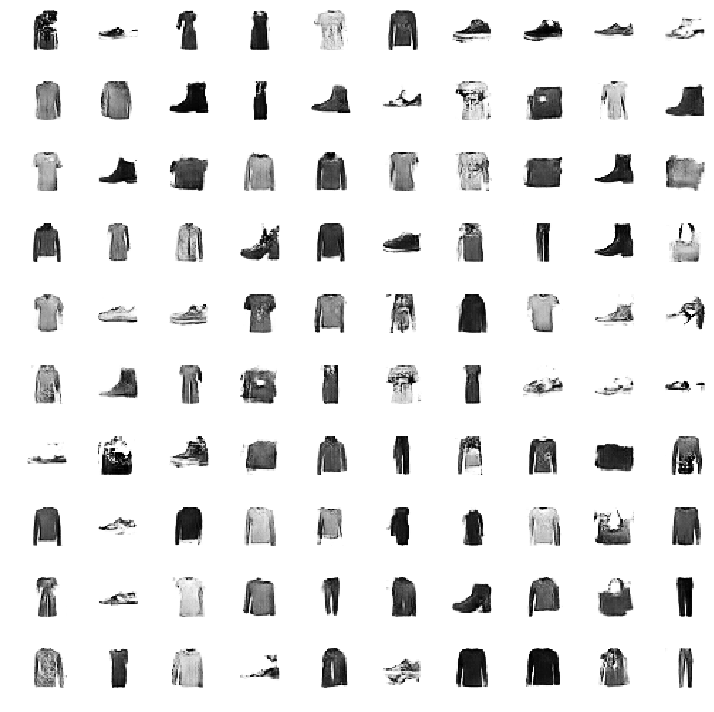

>Saved: conditional-gan_generated_plot_0025.png and conditional-gan_model_0025
>26, 1/468, d1=0.661, d2=0.655 g=0.782
>26, 2/468, d1=0.698, d2=0.686 g=0.790
>26, 3/468, d1=0.742, d2=0.674 g=0.768
>26, 4/468, d1=0.694, d2=0.623 g=0.806
>26, 5/468, d1=0.685, d2=0.705 g=0.794
>26, 6/468, d1=0.679, d2=0.684 g=0.770
>26, 7/468, d1=0.661, d2=0.657 g=0.820
>26, 8/468, d1=0.655, d2=0.672 g=0.812
>26, 9/468, d1=0.701, d2=0.664 g=0.810
>26, 10/468, d1=0.695, d2=0.670 g=0.792
>26, 11/468, d1=0.663, d2=0.684 g=0.783
>26, 12/468, d1=0.656, d2=0.674 g=0.813
>26, 13/468, d1=0.698, d2=0.632 g=0.815
>26, 14/468, d1=0.676, d2=0.651 g=0.813
>26, 15/468, d1=0.643, d2=0.710 g=0.780
>26, 16/468, d1=0.715, d2=0.685 g=0.785
>26, 17/468, d1=0.669, d2=0.656 g=0.807
>26, 18/468, d1=0.647, d2=0.632 g=0.826
>26, 19/468, d1=0.698, d2=0.659 g=0.822
>26, 20/468, d1=0.721, d2=0.664 g=0.777
>26, 21/468, d1=0.676, d2=0.695 g=0.802
>26, 22/468, d1=0.677, d2=0.682 g=0.787
>26, 23/468, d1=0.679, d2=0.659 g=0.794
>26, 24/46

>26, 203/468, d1=0.679, d2=0.633 g=0.823
>26, 204/468, d1=0.681, d2=0.650 g=0.812
>26, 205/468, d1=0.665, d2=0.692 g=0.787
>26, 206/468, d1=0.684, d2=0.673 g=0.806
>26, 207/468, d1=0.683, d2=0.648 g=0.810
>26, 208/468, d1=0.691, d2=0.635 g=0.777
>26, 209/468, d1=0.656, d2=0.640 g=0.749
>26, 210/468, d1=0.656, d2=0.634 g=0.751
>26, 211/468, d1=0.671, d2=0.677 g=0.769
>26, 212/468, d1=0.693, d2=0.644 g=0.790
>26, 213/468, d1=0.636, d2=0.672 g=0.776
>26, 214/468, d1=0.625, d2=0.666 g=0.803
>26, 215/468, d1=0.653, d2=0.682 g=0.750
>26, 216/468, d1=0.720, d2=0.679 g=0.791
>26, 217/468, d1=0.630, d2=0.653 g=0.784
>26, 218/468, d1=0.664, d2=0.661 g=0.833
>26, 219/468, d1=0.683, d2=0.627 g=0.790
>26, 220/468, d1=0.703, d2=0.708 g=0.772
>26, 221/468, d1=0.633, d2=0.700 g=0.750
>26, 222/468, d1=0.644, d2=0.684 g=0.775
>26, 223/468, d1=0.673, d2=0.667 g=0.859
>26, 224/468, d1=0.689, d2=0.633 g=0.838
>26, 225/468, d1=0.743, d2=0.663 g=0.776
>26, 226/468, d1=0.637, d2=0.672 g=0.820
>26, 227/468, d1

>26, 406/468, d1=0.645, d2=0.661 g=0.752
>26, 407/468, d1=0.634, d2=0.686 g=0.772
>26, 408/468, d1=0.654, d2=0.651 g=0.837
>26, 409/468, d1=0.675, d2=0.646 g=0.806
>26, 410/468, d1=0.650, d2=0.657 g=0.774
>26, 411/468, d1=0.670, d2=0.663 g=0.798
>26, 412/468, d1=0.677, d2=0.623 g=0.817
>26, 413/468, d1=0.687, d2=0.655 g=0.812
>26, 414/468, d1=0.689, d2=0.677 g=0.765
>26, 415/468, d1=0.666, d2=0.694 g=0.787
>26, 416/468, d1=0.624, d2=0.669 g=0.788
>26, 417/468, d1=0.663, d2=0.682 g=0.842
>26, 418/468, d1=0.677, d2=0.671 g=0.828
>26, 419/468, d1=0.670, d2=0.633 g=0.800
>26, 420/468, d1=0.707, d2=0.669 g=0.758
>26, 421/468, d1=0.696, d2=0.679 g=0.777
>26, 422/468, d1=0.665, d2=0.647 g=0.810
>26, 423/468, d1=0.700, d2=0.661 g=0.824
>26, 424/468, d1=0.701, d2=0.668 g=0.790
>26, 425/468, d1=0.659, d2=0.662 g=0.803
>26, 426/468, d1=0.696, d2=0.691 g=0.807
>26, 427/468, d1=0.634, d2=0.665 g=0.801
>26, 428/468, d1=0.657, d2=0.705 g=0.784
>26, 429/468, d1=0.669, d2=0.641 g=0.797
>26, 430/468, d1

>27, 141/468, d1=0.659, d2=0.666 g=0.780
>27, 142/468, d1=0.631, d2=0.650 g=0.782
>27, 143/468, d1=0.667, d2=0.656 g=0.789
>27, 144/468, d1=0.649, d2=0.666 g=0.793
>27, 145/468, d1=0.674, d2=0.690 g=0.800
>27, 146/468, d1=0.714, d2=0.671 g=0.781
>27, 147/468, d1=0.662, d2=0.624 g=0.783
>27, 148/468, d1=0.674, d2=0.646 g=0.754
>27, 149/468, d1=0.656, d2=0.641 g=0.782
>27, 150/468, d1=0.675, d2=0.678 g=0.797
>27, 151/468, d1=0.650, d2=0.646 g=0.799
>27, 152/468, d1=0.664, d2=0.643 g=0.762
>27, 153/468, d1=0.640, d2=0.661 g=0.774
>27, 154/468, d1=0.685, d2=0.674 g=0.801
>27, 155/468, d1=0.685, d2=0.668 g=0.812
>27, 156/468, d1=0.646, d2=0.642 g=0.758
>27, 157/468, d1=0.654, d2=0.656 g=0.809
>27, 158/468, d1=0.653, d2=0.660 g=0.752
>27, 159/468, d1=0.665, d2=0.679 g=0.765
>27, 160/468, d1=0.670, d2=0.665 g=0.771
>27, 161/468, d1=0.691, d2=0.647 g=0.795
>27, 162/468, d1=0.641, d2=0.678 g=0.774
>27, 163/468, d1=0.629, d2=0.677 g=0.789
>27, 164/468, d1=0.638, d2=0.660 g=0.792
>27, 165/468, d1

>27, 345/468, d1=0.669, d2=0.668 g=0.743
>27, 346/468, d1=0.653, d2=0.684 g=0.767
>27, 347/468, d1=0.666, d2=0.666 g=0.781
>27, 348/468, d1=0.739, d2=0.636 g=0.820
>27, 349/468, d1=0.648, d2=0.678 g=0.813
>27, 350/468, d1=0.697, d2=0.625 g=0.770
>27, 351/468, d1=0.680, d2=0.690 g=0.783
>27, 352/468, d1=0.674, d2=0.640 g=0.759
>27, 353/468, d1=0.646, d2=0.647 g=0.798
>27, 354/468, d1=0.625, d2=0.646 g=0.794
>27, 355/468, d1=0.670, d2=0.621 g=0.821
>27, 356/468, d1=0.645, d2=0.664 g=0.798
>27, 357/468, d1=0.683, d2=0.655 g=0.784
>27, 358/468, d1=0.654, d2=0.647 g=0.782
>27, 359/468, d1=0.702, d2=0.642 g=0.790
>27, 360/468, d1=0.656, d2=0.701 g=0.779
>27, 361/468, d1=0.680, d2=0.700 g=0.803
>27, 362/468, d1=0.654, d2=0.658 g=0.789
>27, 363/468, d1=0.646, d2=0.649 g=0.799
>27, 364/468, d1=0.690, d2=0.662 g=0.780
>27, 365/468, d1=0.619, d2=0.643 g=0.789
>27, 366/468, d1=0.644, d2=0.658 g=0.788
>27, 367/468, d1=0.653, d2=0.694 g=0.743
>27, 368/468, d1=0.695, d2=0.670 g=0.788
>27, 369/468, d1

>28, 79/468, d1=0.673, d2=0.665 g=0.835
>28, 80/468, d1=0.677, d2=0.628 g=0.861
>28, 81/468, d1=0.682, d2=0.671 g=0.819
>28, 82/468, d1=0.749, d2=0.686 g=0.784
>28, 83/468, d1=0.698, d2=0.689 g=0.817
>28, 84/468, d1=0.696, d2=0.618 g=0.841
>28, 85/468, d1=0.662, d2=0.647 g=0.846
>28, 86/468, d1=0.698, d2=0.655 g=0.762
>28, 87/468, d1=0.644, d2=0.740 g=0.709
>28, 88/468, d1=0.676, d2=0.676 g=0.785
>28, 89/468, d1=0.644, d2=0.660 g=0.810
>28, 90/468, d1=0.716, d2=0.662 g=0.805
>28, 91/468, d1=0.697, d2=0.670 g=0.822
>28, 92/468, d1=0.626, d2=0.654 g=0.788
>28, 93/468, d1=0.687, d2=0.691 g=0.781
>28, 94/468, d1=0.677, d2=0.664 g=0.779
>28, 95/468, d1=0.708, d2=0.691 g=0.777
>28, 96/468, d1=0.674, d2=0.645 g=0.792
>28, 97/468, d1=0.661, d2=0.683 g=0.756
>28, 98/468, d1=0.627, d2=0.648 g=0.776
>28, 99/468, d1=0.652, d2=0.654 g=0.784
>28, 100/468, d1=0.695, d2=0.678 g=0.784
>28, 101/468, d1=0.663, d2=0.660 g=0.789
>28, 102/468, d1=0.690, d2=0.656 g=0.799
>28, 103/468, d1=0.688, d2=0.663 g=0.

>28, 283/468, d1=0.675, d2=0.710 g=0.806
>28, 284/468, d1=0.702, d2=0.669 g=0.794
>28, 285/468, d1=0.687, d2=0.662 g=0.771
>28, 286/468, d1=0.657, d2=0.669 g=0.768
>28, 287/468, d1=0.713, d2=0.668 g=0.772
>28, 288/468, d1=0.670, d2=0.701 g=0.803
>28, 289/468, d1=0.626, d2=0.686 g=0.798
>28, 290/468, d1=0.671, d2=0.665 g=0.783
>28, 291/468, d1=0.619, d2=0.670 g=0.779
>28, 292/468, d1=0.681, d2=0.635 g=0.777
>28, 293/468, d1=0.658, d2=0.644 g=0.798
>28, 294/468, d1=0.634, d2=0.659 g=0.803
>28, 295/468, d1=0.685, d2=0.677 g=0.795
>28, 296/468, d1=0.650, d2=0.652 g=0.783
>28, 297/468, d1=0.666, d2=0.687 g=0.794
>28, 298/468, d1=0.652, d2=0.645 g=0.799
>28, 299/468, d1=0.664, d2=0.665 g=0.822
>28, 300/468, d1=0.717, d2=0.675 g=0.814
>28, 301/468, d1=0.665, d2=0.628 g=0.768
>28, 302/468, d1=0.685, d2=0.712 g=0.838
>28, 303/468, d1=0.667, d2=0.634 g=0.822
>28, 304/468, d1=0.699, d2=0.660 g=0.801
>28, 305/468, d1=0.702, d2=0.670 g=0.784
>28, 306/468, d1=0.671, d2=0.682 g=0.758
>28, 307/468, d1

>29, 19/468, d1=0.623, d2=0.678 g=0.806
>29, 20/468, d1=0.664, d2=0.628 g=0.888
>29, 21/468, d1=0.691, d2=0.622 g=0.823
>29, 22/468, d1=0.671, d2=0.653 g=0.819
>29, 23/468, d1=0.665, d2=0.653 g=0.768
>29, 24/468, d1=0.669, d2=0.677 g=0.794
>29, 25/468, d1=0.674, d2=0.721 g=0.798
>29, 26/468, d1=0.691, d2=0.627 g=0.819
>29, 27/468, d1=0.729, d2=0.653 g=0.796
>29, 28/468, d1=0.679, d2=0.686 g=0.755
>29, 29/468, d1=0.644, d2=0.685 g=0.798
>29, 30/468, d1=0.648, d2=0.679 g=0.760
>29, 31/468, d1=0.656, d2=0.688 g=0.771
>29, 32/468, d1=0.647, d2=0.672 g=0.791
>29, 33/468, d1=0.653, d2=0.702 g=0.771
>29, 34/468, d1=0.669, d2=0.674 g=0.769
>29, 35/468, d1=0.661, d2=0.659 g=0.761
>29, 36/468, d1=0.711, d2=0.670 g=0.766
>29, 37/468, d1=0.684, d2=0.674 g=0.787
>29, 38/468, d1=0.620, d2=0.641 g=0.761
>29, 39/468, d1=0.659, d2=0.684 g=0.764
>29, 40/468, d1=0.642, d2=0.642 g=0.778
>29, 41/468, d1=0.676, d2=0.663 g=0.801
>29, 42/468, d1=0.652, d2=0.638 g=0.800
>29, 43/468, d1=0.632, d2=0.661 g=0.821


>29, 223/468, d1=0.623, d2=0.666 g=0.815
>29, 224/468, d1=0.712, d2=0.652 g=0.808
>29, 225/468, d1=0.631, d2=0.685 g=0.805
>29, 226/468, d1=0.714, d2=0.625 g=0.798
>29, 227/468, d1=0.701, d2=0.658 g=0.780
>29, 228/468, d1=0.663, d2=0.654 g=0.852
>29, 229/468, d1=0.679, d2=0.650 g=0.844
>29, 230/468, d1=0.697, d2=0.629 g=0.785
>29, 231/468, d1=0.700, d2=0.662 g=0.786
>29, 232/468, d1=0.632, d2=0.687 g=0.806
>29, 233/468, d1=0.670, d2=0.639 g=0.795
>29, 234/468, d1=0.686, d2=0.653 g=0.807
>29, 235/468, d1=0.664, d2=0.674 g=0.813
>29, 236/468, d1=0.680, d2=0.657 g=0.770
>29, 237/468, d1=0.681, d2=0.656 g=0.789
>29, 238/468, d1=0.704, d2=0.708 g=0.770
>29, 239/468, d1=0.679, d2=0.666 g=0.802
>29, 240/468, d1=0.635, d2=0.684 g=0.788
>29, 241/468, d1=0.692, d2=0.641 g=0.784
>29, 242/468, d1=0.654, d2=0.732 g=0.783
>29, 243/468, d1=0.667, d2=0.657 g=0.784
>29, 244/468, d1=0.599, d2=0.656 g=0.787
>29, 245/468, d1=0.682, d2=0.668 g=0.768
>29, 246/468, d1=0.686, d2=0.687 g=0.815
>29, 247/468, d1

>29, 427/468, d1=0.673, d2=0.649 g=0.804
>29, 428/468, d1=0.687, d2=0.644 g=0.767
>29, 429/468, d1=0.671, d2=0.668 g=0.758
>29, 430/468, d1=0.648, d2=0.683 g=0.797
>29, 431/468, d1=0.684, d2=0.707 g=0.774
>29, 432/468, d1=0.642, d2=0.643 g=0.791
>29, 433/468, d1=0.661, d2=0.630 g=0.776
>29, 434/468, d1=0.659, d2=0.664 g=0.809
>29, 435/468, d1=0.659, d2=0.731 g=0.786
>29, 436/468, d1=0.643, d2=0.668 g=0.789
>29, 437/468, d1=0.671, d2=0.662 g=0.801
>29, 438/468, d1=0.637, d2=0.686 g=0.827
>29, 439/468, d1=0.696, d2=0.668 g=0.811
>29, 440/468, d1=0.683, d2=0.678 g=0.827
>29, 441/468, d1=0.715, d2=0.589 g=0.799
>29, 442/468, d1=0.663, d2=0.637 g=0.826
>29, 443/468, d1=0.704, d2=0.631 g=0.786
>29, 444/468, d1=0.657, d2=0.660 g=0.790
>29, 445/468, d1=0.668, d2=0.650 g=0.781
>29, 446/468, d1=0.669, d2=0.701 g=0.777
>29, 447/468, d1=0.695, d2=0.634 g=0.786
>29, 448/468, d1=0.662, d2=0.646 g=0.802
>29, 449/468, d1=0.649, d2=0.677 g=0.780
>29, 450/468, d1=0.661, d2=0.669 g=0.793
>29, 451/468, d1

>30, 163/468, d1=0.640, d2=0.675 g=0.790
>30, 164/468, d1=0.686, d2=0.649 g=0.803
>30, 165/468, d1=0.648, d2=0.643 g=0.802
>30, 166/468, d1=0.668, d2=0.685 g=0.795
>30, 167/468, d1=0.678, d2=0.650 g=0.821
>30, 168/468, d1=0.680, d2=0.663 g=0.797
>30, 169/468, d1=0.670, d2=0.621 g=0.817
>30, 170/468, d1=0.681, d2=0.646 g=0.839
>30, 171/468, d1=0.682, d2=0.631 g=0.784
>30, 172/468, d1=0.652, d2=0.637 g=0.783
>30, 173/468, d1=0.697, d2=0.686 g=0.765
>30, 174/468, d1=0.664, d2=0.628 g=0.767
>30, 175/468, d1=0.675, d2=0.679 g=0.820
>30, 176/468, d1=0.687, d2=0.665 g=0.801
>30, 177/468, d1=0.661, d2=0.672 g=0.769
>30, 178/468, d1=0.678, d2=0.667 g=0.777
>30, 179/468, d1=0.654, d2=0.678 g=0.767
>30, 180/468, d1=0.695, d2=0.665 g=0.808
>30, 181/468, d1=0.689, d2=0.652 g=0.795
>30, 182/468, d1=0.672, d2=0.719 g=0.834
>30, 183/468, d1=0.658, d2=0.696 g=0.727
>30, 184/468, d1=0.660, d2=0.702 g=0.794
>30, 185/468, d1=0.671, d2=0.656 g=0.833
>30, 186/468, d1=0.640, d2=0.673 g=0.808
>30, 187/468, d1

>30, 367/468, d1=0.691, d2=0.621 g=0.821
>30, 368/468, d1=0.652, d2=0.658 g=0.780
>30, 369/468, d1=0.657, d2=0.687 g=0.787
>30, 370/468, d1=0.663, d2=0.706 g=0.754
>30, 371/468, d1=0.645, d2=0.654 g=0.792
>30, 372/468, d1=0.698, d2=0.650 g=0.780
>30, 373/468, d1=0.692, d2=0.665 g=0.808
>30, 374/468, d1=0.669, d2=0.664 g=0.801
>30, 375/468, d1=0.689, d2=0.651 g=0.789
>30, 376/468, d1=0.642, d2=0.645 g=0.794
>30, 377/468, d1=0.621, d2=0.645 g=0.829
>30, 378/468, d1=0.700, d2=0.669 g=0.811
>30, 379/468, d1=0.694, d2=0.637 g=0.803
>30, 380/468, d1=0.665, d2=0.669 g=0.789
>30, 381/468, d1=0.728, d2=0.665 g=0.804
>30, 382/468, d1=0.657, d2=0.662 g=0.788
>30, 383/468, d1=0.729, d2=0.683 g=0.798
>30, 384/468, d1=0.646, d2=0.680 g=0.768
>30, 385/468, d1=0.684, d2=0.655 g=0.778
>30, 386/468, d1=0.665, d2=0.657 g=0.783
>30, 387/468, d1=0.639, d2=0.651 g=0.776
>30, 388/468, d1=0.670, d2=0.647 g=0.803
>30, 389/468, d1=0.686, d2=0.681 g=0.804
>30, 390/468, d1=0.657, d2=0.651 g=0.791
>30, 391/468, d1

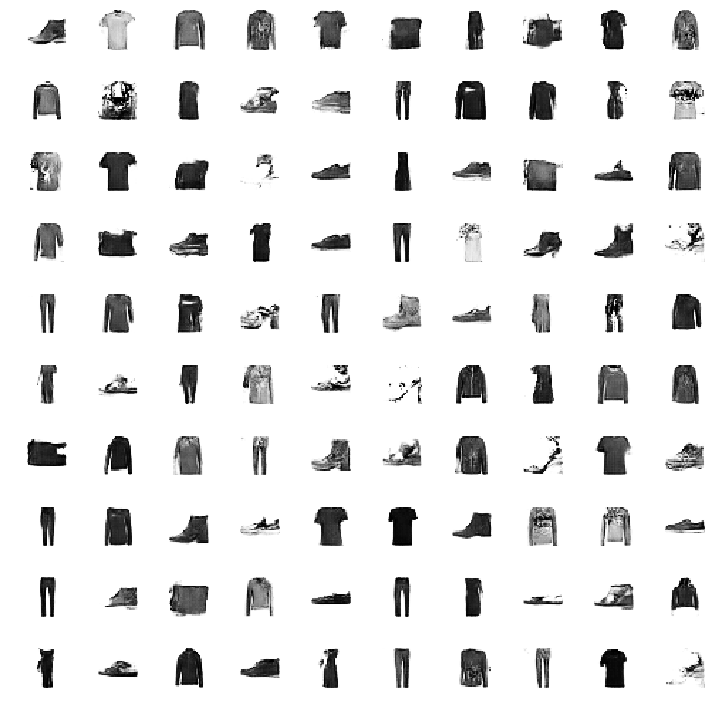

>Saved: conditional-gan_generated_plot_0030.png and conditional-gan_model_0030
>31, 1/468, d1=0.664, d2=0.668 g=0.802
>31, 2/468, d1=0.670, d2=0.659 g=0.757
>31, 3/468, d1=0.669, d2=0.653 g=0.767
>31, 4/468, d1=0.660, d2=0.692 g=0.801
>31, 5/468, d1=0.676, d2=0.700 g=0.806
>31, 6/468, d1=0.680, d2=0.659 g=0.787
>31, 7/468, d1=0.673, d2=0.681 g=0.807
>31, 8/468, d1=0.681, d2=0.674 g=0.800
>31, 9/468, d1=0.690, d2=0.638 g=0.786
>31, 10/468, d1=0.684, d2=0.649 g=0.824
>31, 11/468, d1=0.705, d2=0.680 g=0.780
>31, 12/468, d1=0.652, d2=0.628 g=0.760
>31, 13/468, d1=0.647, d2=0.671 g=0.780
>31, 14/468, d1=0.704, d2=0.659 g=0.800
>31, 15/468, d1=0.645, d2=0.642 g=0.779
>31, 16/468, d1=0.656, d2=0.680 g=0.775
>31, 17/468, d1=0.695, d2=0.694 g=0.745
>31, 18/468, d1=0.694, d2=0.650 g=0.813
>31, 19/468, d1=0.659, d2=0.665 g=0.788
>31, 20/468, d1=0.657, d2=0.648 g=0.793
>31, 21/468, d1=0.668, d2=0.670 g=0.756
>31, 22/468, d1=0.685, d2=0.683 g=0.792
>31, 23/468, d1=0.651, d2=0.688 g=0.743
>31, 24/46

>31, 203/468, d1=0.719, d2=0.643 g=0.789
>31, 204/468, d1=0.688, d2=0.709 g=0.804
>31, 205/468, d1=0.653, d2=0.645 g=0.751
>31, 206/468, d1=0.682, d2=0.648 g=0.805
>31, 207/468, d1=0.642, d2=0.674 g=0.799
>31, 208/468, d1=0.675, d2=0.655 g=0.806
>31, 209/468, d1=0.628, d2=0.712 g=0.809
>31, 210/468, d1=0.656, d2=0.620 g=0.793
>31, 211/468, d1=0.700, d2=0.662 g=0.813
>31, 212/468, d1=0.698, d2=0.626 g=0.781
>31, 213/468, d1=0.689, d2=0.665 g=0.817
>31, 214/468, d1=0.677, d2=0.700 g=0.798
>31, 215/468, d1=0.667, d2=0.665 g=0.781
>31, 216/468, d1=0.702, d2=0.654 g=0.799
>31, 217/468, d1=0.686, d2=0.662 g=0.790
>31, 218/468, d1=0.645, d2=0.677 g=0.784
>31, 219/468, d1=0.675, d2=0.628 g=0.763
>31, 220/468, d1=0.682, d2=0.649 g=0.811
>31, 221/468, d1=0.673, d2=0.696 g=0.789
>31, 222/468, d1=0.685, d2=0.715 g=0.786
>31, 223/468, d1=0.654, d2=0.649 g=0.843
>31, 224/468, d1=0.643, d2=0.632 g=0.842
>31, 225/468, d1=0.715, d2=0.665 g=0.805
>31, 226/468, d1=0.711, d2=0.662 g=0.777
>31, 227/468, d1

>31, 407/468, d1=0.653, d2=0.644 g=0.772
>31, 408/468, d1=0.655, d2=0.670 g=0.764
>31, 409/468, d1=0.661, d2=0.681 g=0.744
>31, 410/468, d1=0.675, d2=0.658 g=0.803
>31, 411/468, d1=0.656, d2=0.686 g=0.773
>31, 412/468, d1=0.663, d2=0.636 g=0.761
>31, 413/468, d1=0.718, d2=0.662 g=0.792
>31, 414/468, d1=0.679, d2=0.668 g=0.773
>31, 415/468, d1=0.695, d2=0.622 g=0.812
>31, 416/468, d1=0.678, d2=0.692 g=0.798
>31, 417/468, d1=0.696, d2=0.715 g=0.782
>31, 418/468, d1=0.618, d2=0.696 g=0.772
>31, 419/468, d1=0.687, d2=0.635 g=0.782
>31, 420/468, d1=0.684, d2=0.634 g=0.807
>31, 421/468, d1=0.700, d2=0.629 g=0.826
>31, 422/468, d1=0.703, d2=0.686 g=0.766
>31, 423/468, d1=0.677, d2=0.651 g=0.810
>31, 424/468, d1=0.654, d2=0.643 g=0.794
>31, 425/468, d1=0.683, d2=0.674 g=0.775
>31, 426/468, d1=0.695, d2=0.687 g=0.772
>31, 427/468, d1=0.642, d2=0.638 g=0.783
>31, 428/468, d1=0.649, d2=0.677 g=0.805
>31, 429/468, d1=0.673, d2=0.703 g=0.797
>31, 430/468, d1=0.717, d2=0.696 g=0.768
>31, 431/468, d1

>32, 142/468, d1=0.697, d2=0.652 g=0.766
>32, 143/468, d1=0.696, d2=0.631 g=0.781
>32, 144/468, d1=0.656, d2=0.686 g=0.772
>32, 145/468, d1=0.668, d2=0.649 g=0.771
>32, 146/468, d1=0.694, d2=0.691 g=0.784
>32, 147/468, d1=0.693, d2=0.674 g=0.755
>32, 148/468, d1=0.672, d2=0.683 g=0.755
>32, 149/468, d1=0.655, d2=0.676 g=0.789
>32, 150/468, d1=0.636, d2=0.654 g=0.775
>32, 151/468, d1=0.666, d2=0.637 g=0.803
>32, 152/468, d1=0.659, d2=0.713 g=0.743
>32, 153/468, d1=0.645, d2=0.673 g=0.773
>32, 154/468, d1=0.641, d2=0.667 g=0.792
>32, 155/468, d1=0.674, d2=0.647 g=0.800
>32, 156/468, d1=0.641, d2=0.657 g=0.786
>32, 157/468, d1=0.657, d2=0.676 g=0.774
>32, 158/468, d1=0.675, d2=0.609 g=0.801
>32, 159/468, d1=0.653, d2=0.673 g=0.776
>32, 160/468, d1=0.686, d2=0.655 g=0.800
>32, 161/468, d1=0.679, d2=0.623 g=0.777
>32, 162/468, d1=0.669, d2=0.699 g=0.783
>32, 163/468, d1=0.685, d2=0.643 g=0.756
>32, 164/468, d1=0.685, d2=0.664 g=0.784
>32, 165/468, d1=0.662, d2=0.698 g=0.766
>32, 166/468, d1

>32, 343/468, d1=0.684, d2=0.649 g=0.825
>32, 344/468, d1=0.625, d2=0.683 g=0.769
>32, 345/468, d1=0.656, d2=0.657 g=0.782
>32, 346/468, d1=0.641, d2=0.655 g=0.767
>32, 347/468, d1=0.684, d2=0.642 g=0.792
>32, 348/468, d1=0.690, d2=0.677 g=0.788
>32, 349/468, d1=0.617, d2=0.664 g=0.796
>32, 350/468, d1=0.689, d2=0.684 g=0.806
>32, 351/468, d1=0.675, d2=0.658 g=0.763
>32, 352/468, d1=0.634, d2=0.694 g=0.770
>32, 353/468, d1=0.661, d2=0.663 g=0.761
>32, 354/468, d1=0.677, d2=0.682 g=0.781
>32, 355/468, d1=0.729, d2=0.671 g=0.803
>32, 356/468, d1=0.686, d2=0.635 g=0.812
>32, 357/468, d1=0.723, d2=0.718 g=0.769
>32, 358/468, d1=0.673, d2=0.650 g=0.764
>32, 359/468, d1=0.655, d2=0.664 g=0.818
>32, 360/468, d1=0.687, d2=0.626 g=0.819
>32, 361/468, d1=0.681, d2=0.718 g=0.804
>32, 362/468, d1=0.624, d2=0.672 g=0.781
>32, 363/468, d1=0.655, d2=0.648 g=0.795
>32, 364/468, d1=0.716, d2=0.641 g=0.816
>32, 365/468, d1=0.675, d2=0.646 g=0.790
>32, 366/468, d1=0.669, d2=0.652 g=0.785
>32, 367/468, d1

>33, 79/468, d1=0.677, d2=0.649 g=0.816
>33, 80/468, d1=0.666, d2=0.620 g=0.830
>33, 81/468, d1=0.686, d2=0.635 g=0.832
>33, 82/468, d1=0.637, d2=0.688 g=0.760
>33, 83/468, d1=0.646, d2=0.726 g=0.793
>33, 84/468, d1=0.619, d2=0.672 g=0.767
>33, 85/468, d1=0.689, d2=0.657 g=0.838
>33, 86/468, d1=0.647, d2=0.610 g=0.855
>33, 87/468, d1=0.628, d2=0.628 g=0.842
>33, 88/468, d1=0.651, d2=0.705 g=0.787
>33, 89/468, d1=0.637, d2=0.683 g=0.782
>33, 90/468, d1=0.688, d2=0.687 g=0.821
>33, 91/468, d1=0.647, d2=0.624 g=0.848
>33, 92/468, d1=0.692, d2=0.617 g=0.872
>33, 93/468, d1=0.648, d2=0.691 g=0.846
>33, 94/468, d1=0.679, d2=0.665 g=0.817
>33, 95/468, d1=0.683, d2=0.671 g=0.818
>33, 96/468, d1=0.682, d2=0.663 g=0.786
>33, 97/468, d1=0.635, d2=0.657 g=0.839
>33, 98/468, d1=0.719, d2=0.691 g=0.768
>33, 99/468, d1=0.722, d2=0.681 g=0.762
>33, 100/468, d1=0.621, d2=0.642 g=0.794
>33, 101/468, d1=0.717, d2=0.662 g=0.808
>33, 102/468, d1=0.668, d2=0.682 g=0.790
>33, 103/468, d1=0.689, d2=0.648 g=0.

>33, 283/468, d1=0.672, d2=0.662 g=0.783
>33, 284/468, d1=0.675, d2=0.650 g=0.791
>33, 285/468, d1=0.666, d2=0.661 g=0.788
>33, 286/468, d1=0.660, d2=0.695 g=0.761
>33, 287/468, d1=0.613, d2=0.652 g=0.773
>33, 288/468, d1=0.646, d2=0.706 g=0.800
>33, 289/468, d1=0.675, d2=0.663 g=0.827
>33, 290/468, d1=0.700, d2=0.663 g=0.781
>33, 291/468, d1=0.683, d2=0.648 g=0.761
>33, 292/468, d1=0.669, d2=0.662 g=0.770
>33, 293/468, d1=0.672, d2=0.658 g=0.778
>33, 294/468, d1=0.700, d2=0.662 g=0.773
>33, 295/468, d1=0.655, d2=0.634 g=0.773
>33, 296/468, d1=0.687, d2=0.684 g=0.793
>33, 297/468, d1=0.645, d2=0.691 g=0.756
>33, 298/468, d1=0.695, d2=0.702 g=0.769
>33, 299/468, d1=0.671, d2=0.640 g=0.780
>33, 300/468, d1=0.704, d2=0.679 g=0.797
>33, 301/468, d1=0.666, d2=0.705 g=0.773
>33, 302/468, d1=0.654, d2=0.643 g=0.785
>33, 303/468, d1=0.669, d2=0.638 g=0.818
>33, 304/468, d1=0.639, d2=0.640 g=0.770
>33, 305/468, d1=0.656, d2=0.718 g=0.797
>33, 306/468, d1=0.699, d2=0.721 g=0.768
>33, 307/468, d1

>34, 19/468, d1=0.693, d2=0.632 g=0.810
>34, 20/468, d1=0.652, d2=0.642 g=0.785
>34, 21/468, d1=0.637, d2=0.672 g=0.794
>34, 22/468, d1=0.671, d2=0.659 g=0.790
>34, 23/468, d1=0.659, d2=0.654 g=0.780
>34, 24/468, d1=0.689, d2=0.690 g=0.778
>34, 25/468, d1=0.705, d2=0.653 g=0.773
>34, 26/468, d1=0.662, d2=0.650 g=0.821
>34, 27/468, d1=0.678, d2=0.637 g=0.795
>34, 28/468, d1=0.704, d2=0.688 g=0.788
>34, 29/468, d1=0.675, d2=0.669 g=0.786
>34, 30/468, d1=0.682, d2=0.722 g=0.775
>34, 31/468, d1=0.659, d2=0.640 g=0.751
>34, 32/468, d1=0.680, d2=0.643 g=0.769
>34, 33/468, d1=0.671, d2=0.661 g=0.780
>34, 34/468, d1=0.658, d2=0.725 g=0.783
>34, 35/468, d1=0.692, d2=0.646 g=0.786
>34, 36/468, d1=0.672, d2=0.675 g=0.771
>34, 37/468, d1=0.661, d2=0.673 g=0.771
>34, 38/468, d1=0.689, d2=0.665 g=0.759
>34, 39/468, d1=0.592, d2=0.710 g=0.758
>34, 40/468, d1=0.644, d2=0.692 g=0.783
>34, 41/468, d1=0.683, d2=0.681 g=0.792
>34, 42/468, d1=0.714, d2=0.648 g=0.814
>34, 43/468, d1=0.667, d2=0.608 g=0.820


>34, 223/468, d1=0.636, d2=0.609 g=0.784
>34, 224/468, d1=0.620, d2=0.693 g=0.743
>34, 225/468, d1=0.653, d2=0.691 g=0.779
>34, 226/468, d1=0.624, d2=0.748 g=0.803
>34, 227/468, d1=0.682, d2=0.653 g=0.823
>34, 228/468, d1=0.689, d2=0.666 g=0.829
>34, 229/468, d1=0.663, d2=0.667 g=0.811
>34, 230/468, d1=0.675, d2=0.679 g=0.790
>34, 231/468, d1=0.677, d2=0.683 g=0.802
>34, 232/468, d1=0.666, d2=0.623 g=0.857
>34, 233/468, d1=0.689, d2=0.630 g=0.800
>34, 234/468, d1=0.732, d2=0.659 g=0.783
>34, 235/468, d1=0.638, d2=0.664 g=0.754
>34, 236/468, d1=0.662, d2=0.630 g=0.805
>34, 237/468, d1=0.667, d2=0.645 g=0.791
>34, 238/468, d1=0.666, d2=0.736 g=0.831
>34, 239/468, d1=0.690, d2=0.645 g=0.792
>34, 240/468, d1=0.698, d2=0.620 g=0.813
>34, 241/468, d1=0.681, d2=0.688 g=0.812
>34, 242/468, d1=0.686, d2=0.677 g=0.775
>34, 243/468, d1=0.679, d2=0.673 g=0.783
>34, 244/468, d1=0.715, d2=0.662 g=0.777
>34, 245/468, d1=0.675, d2=0.686 g=0.820
>34, 246/468, d1=0.670, d2=0.643 g=0.809
>34, 247/468, d1

>34, 425/468, d1=0.679, d2=0.678 g=0.786
>34, 426/468, d1=0.639, d2=0.697 g=0.763
>34, 427/468, d1=0.682, d2=0.661 g=0.772
>34, 428/468, d1=0.690, d2=0.670 g=0.798
>34, 429/468, d1=0.712, d2=0.651 g=0.783
>34, 430/468, d1=0.671, d2=0.643 g=0.799
>34, 431/468, d1=0.695, d2=0.656 g=0.778
>34, 432/468, d1=0.664, d2=0.653 g=0.791
>34, 433/468, d1=0.646, d2=0.652 g=0.774
>34, 434/468, d1=0.663, d2=0.652 g=0.788
>34, 435/468, d1=0.672, d2=0.691 g=0.791
>34, 436/468, d1=0.690, d2=0.641 g=0.791
>34, 437/468, d1=0.650, d2=0.680 g=0.781
>34, 438/468, d1=0.672, d2=0.655 g=0.794
>34, 439/468, d1=0.660, d2=0.679 g=0.772
>34, 440/468, d1=0.651, d2=0.695 g=0.824
>34, 441/468, d1=0.673, d2=0.669 g=0.820
>34, 442/468, d1=0.714, d2=0.656 g=0.813
>34, 443/468, d1=0.626, d2=0.630 g=0.794
>34, 444/468, d1=0.649, d2=0.700 g=0.783
>34, 445/468, d1=0.680, d2=0.649 g=0.784
>34, 446/468, d1=0.676, d2=0.707 g=0.780
>34, 447/468, d1=0.689, d2=0.642 g=0.768
>34, 448/468, d1=0.689, d2=0.644 g=0.793
>34, 449/468, d1

>35, 165/468, d1=0.689, d2=0.657 g=0.802
>35, 166/468, d1=0.687, d2=0.621 g=0.832
>35, 167/468, d1=0.614, d2=0.637 g=0.844
>35, 168/468, d1=0.669, d2=0.701 g=0.760
>35, 169/468, d1=0.659, d2=0.720 g=0.783
>35, 170/468, d1=0.659, d2=0.664 g=0.796
>35, 171/468, d1=0.630, d2=0.645 g=0.804
>35, 172/468, d1=0.682, d2=0.642 g=0.763
>35, 173/468, d1=0.623, d2=0.656 g=0.768
>35, 174/468, d1=0.675, d2=0.654 g=0.785
>35, 175/468, d1=0.669, d2=0.646 g=0.805
>35, 176/468, d1=0.680, d2=0.641 g=0.779
>35, 177/468, d1=0.712, d2=0.630 g=0.780
>35, 178/468, d1=0.630, d2=0.668 g=0.772
>35, 179/468, d1=0.623, d2=0.657 g=0.786
>35, 180/468, d1=0.679, d2=0.644 g=0.779
>35, 181/468, d1=0.701, d2=0.641 g=0.812
>35, 182/468, d1=0.663, d2=0.673 g=0.817
>35, 183/468, d1=0.691, d2=0.671 g=0.775
>35, 184/468, d1=0.678, d2=0.666 g=0.800
>35, 185/468, d1=0.678, d2=0.653 g=0.792
>35, 186/468, d1=0.678, d2=0.694 g=0.793
>35, 187/468, d1=0.690, d2=0.663 g=0.761
>35, 188/468, d1=0.648, d2=0.704 g=0.799
>35, 189/468, d1

>35, 369/468, d1=0.670, d2=0.683 g=0.801
>35, 370/468, d1=0.689, d2=0.643 g=0.829
>35, 371/468, d1=0.700, d2=0.653 g=0.811
>35, 372/468, d1=0.676, d2=0.664 g=0.815
>35, 373/468, d1=0.655, d2=0.681 g=0.801
>35, 374/468, d1=0.646, d2=0.674 g=0.768
>35, 375/468, d1=0.695, d2=0.647 g=0.803
>35, 376/468, d1=0.653, d2=0.666 g=0.811
>35, 377/468, d1=0.714, d2=0.647 g=0.814
>35, 378/468, d1=0.683, d2=0.652 g=0.785
>35, 379/468, d1=0.638, d2=0.630 g=0.791
>35, 380/468, d1=0.702, d2=0.655 g=0.810
>35, 381/468, d1=0.664, d2=0.636 g=0.773
>35, 382/468, d1=0.637, d2=0.647 g=0.783
>35, 383/468, d1=0.721, d2=0.683 g=0.788
>35, 384/468, d1=0.653, d2=0.709 g=0.769
>35, 385/468, d1=0.618, d2=0.638 g=0.826
>35, 386/468, d1=0.672, d2=0.693 g=0.767
>35, 387/468, d1=0.633, d2=0.697 g=0.767
>35, 388/468, d1=0.694, d2=0.684 g=0.740
>35, 389/468, d1=0.636, d2=0.709 g=0.778
>35, 390/468, d1=0.673, d2=0.657 g=0.799
>35, 391/468, d1=0.712, d2=0.665 g=0.860
>35, 392/468, d1=0.684, d2=0.676 g=0.835
>35, 393/468, d1

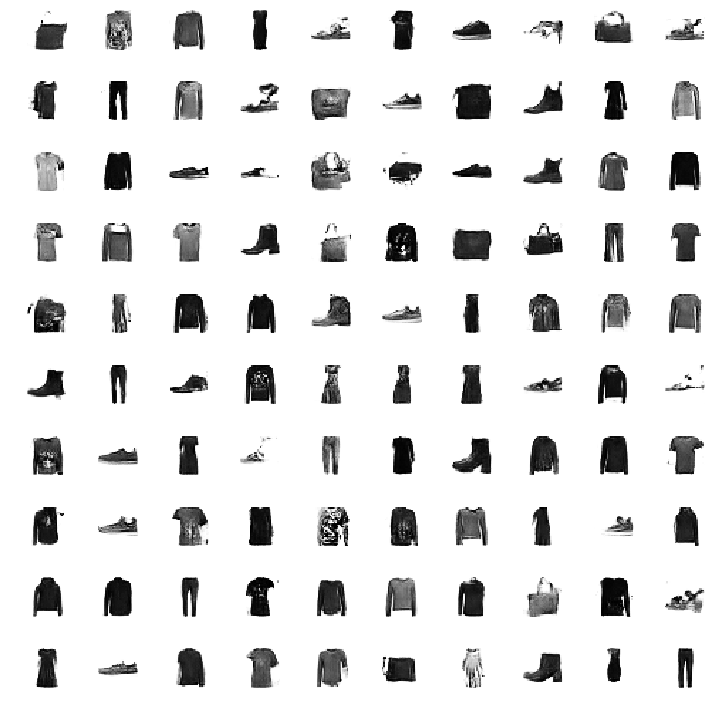

>Saved: conditional-gan_generated_plot_0035.png and conditional-gan_model_0035
>36, 1/468, d1=0.711, d2=0.627 g=0.773
>36, 2/468, d1=0.677, d2=0.682 g=0.798
>36, 3/468, d1=0.634, d2=0.703 g=0.806
>36, 4/468, d1=0.657, d2=0.635 g=0.786
>36, 5/468, d1=0.705, d2=0.676 g=0.784
>36, 6/468, d1=0.657, d2=0.672 g=0.802
>36, 7/468, d1=0.690, d2=0.650 g=0.768
>36, 8/468, d1=0.679, d2=0.659 g=0.797
>36, 9/468, d1=0.619, d2=0.716 g=0.775
>36, 10/468, d1=0.677, d2=0.702 g=0.799
>36, 11/468, d1=0.678, d2=0.662 g=0.796
>36, 12/468, d1=0.634, d2=0.658 g=0.776
>36, 13/468, d1=0.681, d2=0.648 g=0.783
>36, 14/468, d1=0.700, d2=0.667 g=0.760
>36, 15/468, d1=0.679, d2=0.643 g=0.787
>36, 16/468, d1=0.665, d2=0.676 g=0.788
>36, 17/468, d1=0.616, d2=0.661 g=0.822
>36, 18/468, d1=0.696, d2=0.654 g=0.795
>36, 19/468, d1=0.672, d2=0.674 g=0.787
>36, 20/468, d1=0.667, d2=0.675 g=0.779
>36, 21/468, d1=0.671, d2=0.654 g=0.798
>36, 22/468, d1=0.721, d2=0.649 g=0.787
>36, 23/468, d1=0.689, d2=0.624 g=0.815
>36, 24/46

>36, 204/468, d1=0.682, d2=0.626 g=0.849
>36, 205/468, d1=0.656, d2=0.677 g=0.830
>36, 206/468, d1=0.670, d2=0.636 g=0.797
>36, 207/468, d1=0.665, d2=0.685 g=0.771
>36, 208/468, d1=0.705, d2=0.667 g=0.811
>36, 209/468, d1=0.662, d2=0.671 g=0.783
>36, 210/468, d1=0.680, d2=0.610 g=0.772
>36, 211/468, d1=0.660, d2=0.647 g=0.779
>36, 212/468, d1=0.696, d2=0.644 g=0.768
>36, 213/468, d1=0.640, d2=0.656 g=0.793
>36, 214/468, d1=0.712, d2=0.675 g=0.775
>36, 215/468, d1=0.644, d2=0.668 g=0.809
>36, 216/468, d1=0.677, d2=0.636 g=0.792
>36, 217/468, d1=0.650, d2=0.681 g=0.752
>36, 218/468, d1=0.646, d2=0.683 g=0.793
>36, 219/468, d1=0.650, d2=0.709 g=0.745
>36, 220/468, d1=0.660, d2=0.670 g=0.784
>36, 221/468, d1=0.656, d2=0.685 g=0.774
>36, 222/468, d1=0.695, d2=0.662 g=0.787
>36, 223/468, d1=0.668, d2=0.664 g=0.808
>36, 224/468, d1=0.681, d2=0.638 g=0.776
>36, 225/468, d1=0.658, d2=0.648 g=0.761
>36, 226/468, d1=0.714, d2=0.689 g=0.745
>36, 227/468, d1=0.626, d2=0.697 g=0.776
>36, 228/468, d1

>36, 408/468, d1=0.667, d2=0.646 g=0.836
>36, 409/468, d1=0.710, d2=0.641 g=0.784
>36, 410/468, d1=0.724, d2=0.718 g=0.767
>36, 411/468, d1=0.667, d2=0.654 g=0.815
>36, 412/468, d1=0.642, d2=0.697 g=0.763
>36, 413/468, d1=0.647, d2=0.664 g=0.762
>36, 414/468, d1=0.673, d2=0.688 g=0.744
>36, 415/468, d1=0.661, d2=0.695 g=0.776
>36, 416/468, d1=0.661, d2=0.631 g=0.849
>36, 417/468, d1=0.635, d2=0.632 g=0.821
>36, 418/468, d1=0.691, d2=0.673 g=0.800
>36, 419/468, d1=0.680, d2=0.643 g=0.804
>36, 420/468, d1=0.653, d2=0.661 g=0.819
>36, 421/468, d1=0.646, d2=0.628 g=0.804
>36, 422/468, d1=0.672, d2=0.698 g=0.824
>36, 423/468, d1=0.671, d2=0.678 g=0.794
>36, 424/468, d1=0.660, d2=0.636 g=0.766
>36, 425/468, d1=0.631, d2=0.664 g=0.808
>36, 426/468, d1=0.693, d2=0.659 g=0.785
>36, 427/468, d1=0.701, d2=0.614 g=0.788
>36, 428/468, d1=0.699, d2=0.670 g=0.797
>36, 429/468, d1=0.697, d2=0.653 g=0.792
>36, 430/468, d1=0.696, d2=0.680 g=0.787
>36, 431/468, d1=0.649, d2=0.641 g=0.787
>36, 432/468, d1

>37, 143/468, d1=0.645, d2=0.714 g=0.785
>37, 144/468, d1=0.676, d2=0.669 g=0.809
>37, 145/468, d1=0.615, d2=0.659 g=0.813
>37, 146/468, d1=0.692, d2=0.613 g=0.802
>37, 147/468, d1=0.681, d2=0.616 g=0.799
>37, 148/468, d1=0.692, d2=0.644 g=0.776
>37, 149/468, d1=0.705, d2=0.619 g=0.790
>37, 150/468, d1=0.671, d2=0.670 g=0.808
>37, 151/468, d1=0.662, d2=0.672 g=0.779
>37, 152/468, d1=0.699, d2=0.693 g=0.848
>37, 153/468, d1=0.641, d2=0.666 g=0.793
>37, 154/468, d1=0.669, d2=0.679 g=0.794
>37, 155/468, d1=0.670, d2=0.679 g=0.790
>37, 156/468, d1=0.678, d2=0.667 g=0.782
>37, 157/468, d1=0.685, d2=0.647 g=0.798
>37, 158/468, d1=0.662, d2=0.634 g=0.777
>37, 159/468, d1=0.681, d2=0.709 g=0.768
>37, 160/468, d1=0.661, d2=0.646 g=0.782
>37, 161/468, d1=0.695, d2=0.672 g=0.797
>37, 162/468, d1=0.676, d2=0.642 g=0.821
>37, 163/468, d1=0.692, d2=0.683 g=0.784
>37, 164/468, d1=0.682, d2=0.670 g=0.779
>37, 165/468, d1=0.659, d2=0.680 g=0.789
>37, 166/468, d1=0.694, d2=0.672 g=0.793
>37, 167/468, d1

>37, 347/468, d1=0.643, d2=0.701 g=0.789
>37, 348/468, d1=0.657, d2=0.646 g=0.761
>37, 349/468, d1=0.676, d2=0.624 g=0.815
>37, 350/468, d1=0.668, d2=0.695 g=0.761
>37, 351/468, d1=0.654, d2=0.658 g=0.764
>37, 352/468, d1=0.660, d2=0.653 g=0.752
>37, 353/468, d1=0.676, d2=0.641 g=0.753
>37, 354/468, d1=0.657, d2=0.655 g=0.785
>37, 355/468, d1=0.667, d2=0.718 g=0.778
>37, 356/468, d1=0.621, d2=0.676 g=0.785
>37, 357/468, d1=0.667, d2=0.673 g=0.799
>37, 358/468, d1=0.641, d2=0.649 g=0.813
>37, 359/468, d1=0.680, d2=0.684 g=0.762
>37, 360/468, d1=0.671, d2=0.670 g=0.801
>37, 361/468, d1=0.703, d2=0.677 g=0.781
>37, 362/468, d1=0.642, d2=0.665 g=0.791
>37, 363/468, d1=0.682, d2=0.656 g=0.833
>37, 364/468, d1=0.726, d2=0.658 g=0.786
>37, 365/468, d1=0.688, d2=0.673 g=0.762
>37, 366/468, d1=0.650, d2=0.652 g=0.808
>37, 367/468, d1=0.642, d2=0.639 g=0.802
>37, 368/468, d1=0.689, d2=0.626 g=0.793
>37, 369/468, d1=0.659, d2=0.704 g=0.770
>37, 370/468, d1=0.693, d2=0.611 g=0.796
>37, 371/468, d1

>38, 82/468, d1=0.634, d2=0.681 g=0.791
>38, 83/468, d1=0.648, d2=0.656 g=0.835
>38, 84/468, d1=0.694, d2=0.646 g=0.818
>38, 85/468, d1=0.674, d2=0.648 g=0.746
>38, 86/468, d1=0.631, d2=0.689 g=0.786
>38, 87/468, d1=0.665, d2=0.689 g=0.794
>38, 88/468, d1=0.652, d2=0.634 g=0.761
>38, 89/468, d1=0.669, d2=0.663 g=0.800
>38, 90/468, d1=0.680, d2=0.635 g=0.787
>38, 91/468, d1=0.678, d2=0.654 g=0.819
>38, 92/468, d1=0.677, d2=0.654 g=0.808
>38, 93/468, d1=0.663, d2=0.653 g=0.796
>38, 94/468, d1=0.625, d2=0.686 g=0.772
>38, 95/468, d1=0.646, d2=0.665 g=0.786
>38, 96/468, d1=0.695, d2=0.676 g=0.810
>38, 97/468, d1=0.662, d2=0.655 g=0.848
>38, 98/468, d1=0.658, d2=0.672 g=0.782
>38, 99/468, d1=0.710, d2=0.650 g=0.789
>38, 100/468, d1=0.698, d2=0.654 g=0.791
>38, 101/468, d1=0.655, d2=0.655 g=0.777
>38, 102/468, d1=0.660, d2=0.620 g=0.788
>38, 103/468, d1=0.651, d2=0.668 g=0.776
>38, 104/468, d1=0.656, d2=0.660 g=0.765
>38, 105/468, d1=0.694, d2=0.746 g=0.783
>38, 106/468, d1=0.704, d2=0.672 g

>38, 286/468, d1=0.662, d2=0.654 g=0.784
>38, 287/468, d1=0.646, d2=0.666 g=0.818
>38, 288/468, d1=0.658, d2=0.639 g=0.808
>38, 289/468, d1=0.651, d2=0.671 g=0.799
>38, 290/468, d1=0.664, d2=0.699 g=0.788
>38, 291/468, d1=0.674, d2=0.640 g=0.768
>38, 292/468, d1=0.703, d2=0.661 g=0.833
>38, 293/468, d1=0.660, d2=0.675 g=0.792
>38, 294/468, d1=0.674, d2=0.673 g=0.780
>38, 295/468, d1=0.675, d2=0.701 g=0.804
>38, 296/468, d1=0.702, d2=0.672 g=0.800
>38, 297/468, d1=0.695, d2=0.688 g=0.863
>38, 298/468, d1=0.680, d2=0.619 g=0.818
>38, 299/468, d1=0.681, d2=0.618 g=0.772
>38, 300/468, d1=0.698, d2=0.661 g=0.795
>38, 301/468, d1=0.613, d2=0.629 g=0.805
>38, 302/468, d1=0.680, d2=0.639 g=0.764
>38, 303/468, d1=0.631, d2=0.682 g=0.817
>38, 304/468, d1=0.680, d2=0.676 g=0.766
>38, 305/468, d1=0.679, d2=0.688 g=0.808
>38, 306/468, d1=0.650, d2=0.678 g=0.824
>38, 307/468, d1=0.657, d2=0.669 g=0.795
>38, 308/468, d1=0.682, d2=0.621 g=0.791
>38, 309/468, d1=0.660, d2=0.663 g=0.799
>38, 310/468, d1

>39, 21/468, d1=0.630, d2=0.672 g=0.818
>39, 22/468, d1=0.654, d2=0.649 g=0.819
>39, 23/468, d1=0.660, d2=0.688 g=0.772
>39, 24/468, d1=0.677, d2=0.689 g=0.782
>39, 25/468, d1=0.657, d2=0.663 g=0.835
>39, 26/468, d1=0.694, d2=0.602 g=0.864
>39, 27/468, d1=0.719, d2=0.658 g=0.798
>39, 28/468, d1=0.675, d2=0.655 g=0.809
>39, 29/468, d1=0.655, d2=0.674 g=0.795
>39, 30/468, d1=0.724, d2=0.679 g=0.791
>39, 31/468, d1=0.680, d2=0.647 g=0.823
>39, 32/468, d1=0.677, d2=0.646 g=0.820
>39, 33/468, d1=0.688, d2=0.654 g=0.774
>39, 34/468, d1=0.638, d2=0.651 g=0.800
>39, 35/468, d1=0.644, d2=0.651 g=0.798
>39, 36/468, d1=0.683, d2=0.634 g=0.790
>39, 37/468, d1=0.668, d2=0.675 g=0.817
>39, 38/468, d1=0.719, d2=0.708 g=0.762
>39, 39/468, d1=0.666, d2=0.680 g=0.777
>39, 40/468, d1=0.633, d2=0.658 g=0.744
>39, 41/468, d1=0.631, d2=0.684 g=0.804
>39, 42/468, d1=0.662, d2=0.692 g=0.822
>39, 43/468, d1=0.696, d2=0.678 g=0.774
>39, 44/468, d1=0.688, d2=0.656 g=0.765
>39, 45/468, d1=0.679, d2=0.677 g=0.796


>39, 225/468, d1=0.646, d2=0.646 g=0.793
>39, 226/468, d1=0.680, d2=0.697 g=0.786
>39, 227/468, d1=0.661, d2=0.679 g=0.802
>39, 228/468, d1=0.706, d2=0.628 g=0.805
>39, 229/468, d1=0.659, d2=0.651 g=0.813
>39, 230/468, d1=0.702, d2=0.660 g=0.752
>39, 231/468, d1=0.659, d2=0.685 g=0.792
>39, 232/468, d1=0.661, d2=0.679 g=0.766
>39, 233/468, d1=0.639, d2=0.652 g=0.786
>39, 234/468, d1=0.693, d2=0.668 g=0.829
>39, 235/468, d1=0.649, d2=0.667 g=0.802
>39, 236/468, d1=0.647, d2=0.692 g=0.787
>39, 237/468, d1=0.679, d2=0.631 g=0.805
>39, 238/468, d1=0.646, d2=0.678 g=0.813
>39, 239/468, d1=0.640, d2=0.672 g=0.786
>39, 240/468, d1=0.634, d2=0.663 g=0.810
>39, 241/468, d1=0.692, d2=0.653 g=0.808
>39, 242/468, d1=0.664, d2=0.655 g=0.787
>39, 243/468, d1=0.704, d2=0.663 g=0.772
>39, 244/468, d1=0.667, d2=0.668 g=0.804
>39, 245/468, d1=0.656, d2=0.618 g=0.802
>39, 246/468, d1=0.645, d2=0.628 g=0.776
>39, 247/468, d1=0.703, d2=0.669 g=0.791
>39, 248/468, d1=0.629, d2=0.644 g=0.815
>39, 249/468, d1

>39, 429/468, d1=0.671, d2=0.702 g=0.755
>39, 430/468, d1=0.695, d2=0.659 g=0.786
>39, 431/468, d1=0.693, d2=0.631 g=0.782
>39, 432/468, d1=0.653, d2=0.652 g=0.796
>39, 433/468, d1=0.680, d2=0.694 g=0.762
>39, 434/468, d1=0.675, d2=0.692 g=0.793
>39, 435/468, d1=0.654, d2=0.670 g=0.795
>39, 436/468, d1=0.703, d2=0.648 g=0.807
>39, 437/468, d1=0.681, d2=0.680 g=0.800
>39, 438/468, d1=0.681, d2=0.667 g=0.821
>39, 439/468, d1=0.649, d2=0.670 g=0.804
>39, 440/468, d1=0.651, d2=0.670 g=0.811
>39, 441/468, d1=0.638, d2=0.635 g=0.807
>39, 442/468, d1=0.646, d2=0.604 g=0.789
>39, 443/468, d1=0.711, d2=0.649 g=0.818
>39, 444/468, d1=0.635, d2=0.706 g=0.790
>39, 445/468, d1=0.652, d2=0.622 g=0.783
>39, 446/468, d1=0.648, d2=0.638 g=0.802
>39, 447/468, d1=0.660, d2=0.661 g=0.761
>39, 448/468, d1=0.662, d2=0.662 g=0.775
>39, 449/468, d1=0.678, d2=0.682 g=0.773
>39, 450/468, d1=0.681, d2=0.643 g=0.783
>39, 451/468, d1=0.705, d2=0.636 g=0.760
>39, 452/468, d1=0.699, d2=0.670 g=0.794
>39, 453/468, d1

>40, 164/468, d1=0.671, d2=0.673 g=0.817
>40, 165/468, d1=0.658, d2=0.621 g=0.809
>40, 166/468, d1=0.709, d2=0.687 g=0.771
>40, 167/468, d1=0.669, d2=0.672 g=0.766
>40, 168/468, d1=0.662, d2=0.658 g=0.762
>40, 169/468, d1=0.689, d2=0.664 g=0.802
>40, 170/468, d1=0.641, d2=0.654 g=0.811
>40, 171/468, d1=0.687, d2=0.687 g=0.802
>40, 172/468, d1=0.679, d2=0.703 g=0.773
>40, 173/468, d1=0.720, d2=0.717 g=0.789
>40, 174/468, d1=0.637, d2=0.668 g=0.811
>40, 175/468, d1=0.653, d2=0.642 g=0.838
>40, 176/468, d1=0.678, d2=0.663 g=0.804
>40, 177/468, d1=0.655, d2=0.684 g=0.775
>40, 178/468, d1=0.640, d2=0.658 g=0.817
>40, 179/468, d1=0.644, d2=0.646 g=0.815
>40, 180/468, d1=0.714, d2=0.637 g=0.847
>40, 181/468, d1=0.689, d2=0.692 g=0.774
>40, 182/468, d1=0.693, d2=0.704 g=0.775
>40, 183/468, d1=0.633, d2=0.684 g=0.809
>40, 184/468, d1=0.676, d2=0.691 g=0.840
>40, 185/468, d1=0.697, d2=0.657 g=0.791
>40, 186/468, d1=0.676, d2=0.632 g=0.782
>40, 187/468, d1=0.712, d2=0.695 g=0.807
>40, 188/468, d1

>40, 368/468, d1=0.638, d2=0.642 g=0.770
>40, 369/468, d1=0.669, d2=0.658 g=0.815
>40, 370/468, d1=0.702, d2=0.701 g=0.786
>40, 371/468, d1=0.695, d2=0.672 g=0.771
>40, 372/468, d1=0.687, d2=0.648 g=0.791
>40, 373/468, d1=0.695, d2=0.670 g=0.790
>40, 374/468, d1=0.634, d2=0.655 g=0.780
>40, 375/468, d1=0.617, d2=0.665 g=0.781
>40, 376/468, d1=0.651, d2=0.617 g=0.807
>40, 377/468, d1=0.701, d2=0.667 g=0.826
>40, 378/468, d1=0.659, d2=0.606 g=0.796
>40, 379/468, d1=0.680, d2=0.712 g=0.765
>40, 380/468, d1=0.628, d2=0.687 g=0.763
>40, 381/468, d1=0.627, d2=0.672 g=0.801
>40, 382/468, d1=0.661, d2=0.662 g=0.839
>40, 383/468, d1=0.673, d2=0.662 g=0.827
>40, 384/468, d1=0.648, d2=0.690 g=0.776
>40, 385/468, d1=0.714, d2=0.695 g=0.788
>40, 386/468, d1=0.660, d2=0.712 g=0.799
>40, 387/468, d1=0.668, d2=0.635 g=0.841
>40, 388/468, d1=0.667, d2=0.635 g=0.871
>40, 389/468, d1=0.718, d2=0.739 g=0.794
>40, 390/468, d1=0.711, d2=0.633 g=0.776
>40, 391/468, d1=0.635, d2=0.649 g=0.843
>40, 392/468, d1

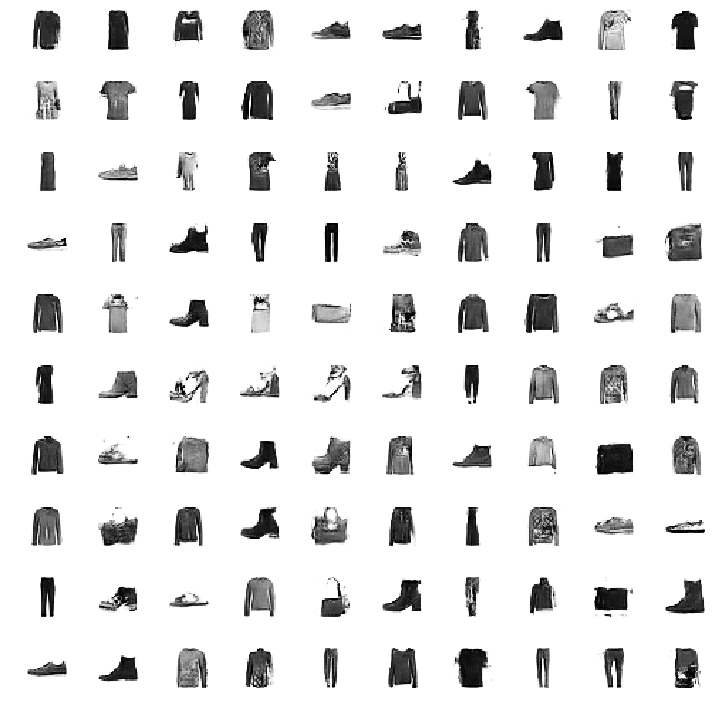

>Saved: conditional-gan_generated_plot_0040.png and conditional-gan_model_0040
>41, 1/468, d1=0.671, d2=0.663 g=0.801
>41, 2/468, d1=0.642, d2=0.654 g=0.829
>41, 3/468, d1=0.684, d2=0.684 g=0.769
>41, 4/468, d1=0.665, d2=0.686 g=0.806
>41, 5/468, d1=0.647, d2=0.670 g=0.788
>41, 6/468, d1=0.697, d2=0.678 g=0.795
>41, 7/468, d1=0.709, d2=0.659 g=0.824
>41, 8/468, d1=0.693, d2=0.612 g=0.804
>41, 9/468, d1=0.695, d2=0.640 g=0.785
>41, 10/468, d1=0.699, d2=0.682 g=0.814
>41, 11/468, d1=0.674, d2=0.659 g=0.773
>41, 12/468, d1=0.698, d2=0.672 g=0.777
>41, 13/468, d1=0.665, d2=0.673 g=0.764
>41, 14/468, d1=0.666, d2=0.679 g=0.769
>41, 15/468, d1=0.699, d2=0.631 g=0.799
>41, 16/468, d1=0.678, d2=0.678 g=0.783
>41, 17/468, d1=0.653, d2=0.652 g=0.800
>41, 18/468, d1=0.667, d2=0.707 g=0.789
>41, 19/468, d1=0.652, d2=0.663 g=0.797
>41, 20/468, d1=0.699, d2=0.667 g=0.777
>41, 21/468, d1=0.690, d2=0.699 g=0.781
>41, 22/468, d1=0.673, d2=0.670 g=0.808
>41, 23/468, d1=0.679, d2=0.642 g=0.801
>41, 24/46

>41, 207/468, d1=0.690, d2=0.638 g=0.809
>41, 208/468, d1=0.657, d2=0.624 g=0.785
>41, 209/468, d1=0.732, d2=0.707 g=0.770
>41, 210/468, d1=0.638, d2=0.647 g=0.783
>41, 211/468, d1=0.692, d2=0.664 g=0.799
>41, 212/468, d1=0.680, d2=0.692 g=0.801
>41, 213/468, d1=0.718, d2=0.628 g=0.771
>41, 214/468, d1=0.664, d2=0.690 g=0.791
>41, 215/468, d1=0.633, d2=0.636 g=0.800
>41, 216/468, d1=0.718, d2=0.652 g=0.789
>41, 217/468, d1=0.658, d2=0.631 g=0.799
>41, 218/468, d1=0.717, d2=0.647 g=0.783
>41, 219/468, d1=0.714, d2=0.669 g=0.801
>41, 220/468, d1=0.645, d2=0.673 g=0.811
>41, 221/468, d1=0.688, d2=0.659 g=0.774
>41, 222/468, d1=0.660, d2=0.691 g=0.754
>41, 223/468, d1=0.640, d2=0.665 g=0.793
>41, 224/468, d1=0.677, d2=0.660 g=0.759
>41, 225/468, d1=0.671, d2=0.633 g=0.818
>41, 226/468, d1=0.656, d2=0.645 g=0.804
>41, 227/468, d1=0.685, d2=0.668 g=0.797
>41, 228/468, d1=0.670, d2=0.697 g=0.802
>41, 229/468, d1=0.695, d2=0.690 g=0.753
>41, 230/468, d1=0.663, d2=0.637 g=0.820
>41, 231/468, d1

>41, 409/468, d1=0.699, d2=0.651 g=0.788
>41, 410/468, d1=0.655, d2=0.646 g=0.775
>41, 411/468, d1=0.651, d2=0.660 g=0.790
>41, 412/468, d1=0.689, d2=0.658 g=0.760
>41, 413/468, d1=0.687, d2=0.655 g=0.775
>41, 414/468, d1=0.658, d2=0.690 g=0.777
>41, 415/468, d1=0.682, d2=0.674 g=0.781
>41, 416/468, d1=0.685, d2=0.678 g=0.775
>41, 417/468, d1=0.673, d2=0.657 g=0.819
>41, 418/468, d1=0.642, d2=0.711 g=0.785
>41, 419/468, d1=0.684, d2=0.675 g=0.787
>41, 420/468, d1=0.640, d2=0.688 g=0.778
>41, 421/468, d1=0.683, d2=0.628 g=0.766
>41, 422/468, d1=0.675, d2=0.642 g=0.760
>41, 423/468, d1=0.670, d2=0.664 g=0.806
>41, 424/468, d1=0.696, d2=0.691 g=0.774
>41, 425/468, d1=0.678, d2=0.669 g=0.823
>41, 426/468, d1=0.650, d2=0.654 g=0.797
>41, 427/468, d1=0.652, d2=0.669 g=0.747
>41, 428/468, d1=0.710, d2=0.696 g=0.760
>41, 429/468, d1=0.645, d2=0.660 g=0.782
>41, 430/468, d1=0.647, d2=0.643 g=0.791
>41, 431/468, d1=0.671, d2=0.685 g=0.760
>41, 432/468, d1=0.673, d2=0.649 g=0.781
>41, 433/468, d1

>42, 144/468, d1=0.631, d2=0.643 g=0.834
>42, 145/468, d1=0.675, d2=0.645 g=0.820
>42, 146/468, d1=0.664, d2=0.649 g=0.819
>42, 147/468, d1=0.683, d2=0.647 g=0.803
>42, 148/468, d1=0.731, d2=0.672 g=0.788
>42, 149/468, d1=0.648, d2=0.644 g=0.806
>42, 150/468, d1=0.638, d2=0.662 g=0.810
>42, 151/468, d1=0.652, d2=0.698 g=0.765
>42, 152/468, d1=0.663, d2=0.685 g=0.729
>42, 153/468, d1=0.658, d2=0.672 g=0.817
>42, 154/468, d1=0.643, d2=0.657 g=0.801
>42, 155/468, d1=0.683, d2=0.688 g=0.761
>42, 156/468, d1=0.707, d2=0.672 g=0.757
>42, 157/468, d1=0.629, d2=0.683 g=0.770
>42, 158/468, d1=0.662, d2=0.630 g=0.761
>42, 159/468, d1=0.675, d2=0.669 g=0.775
>42, 160/468, d1=0.712, d2=0.664 g=0.765
>42, 161/468, d1=0.678, d2=0.718 g=0.766
>42, 162/468, d1=0.694, d2=0.667 g=0.782
>42, 163/468, d1=0.661, d2=0.693 g=0.825
>42, 164/468, d1=0.678, d2=0.646 g=0.789
>42, 165/468, d1=0.705, d2=0.678 g=0.803
>42, 166/468, d1=0.674, d2=0.662 g=0.812
>42, 167/468, d1=0.685, d2=0.661 g=0.791
>42, 168/468, d1

>42, 348/468, d1=0.641, d2=0.682 g=0.791
>42, 349/468, d1=0.681, d2=0.664 g=0.761
>42, 350/468, d1=0.665, d2=0.692 g=0.790
>42, 351/468, d1=0.672, d2=0.651 g=0.805
>42, 352/468, d1=0.644, d2=0.682 g=0.773
>42, 353/468, d1=0.694, d2=0.644 g=0.806
>42, 354/468, d1=0.690, d2=0.625 g=0.782
>42, 355/468, d1=0.631, d2=0.600 g=0.766
>42, 356/468, d1=0.697, d2=0.670 g=0.760
>42, 357/468, d1=0.669, d2=0.685 g=0.779
>42, 358/468, d1=0.681, d2=0.732 g=0.785
>42, 359/468, d1=0.692, d2=0.696 g=0.762
>42, 360/468, d1=0.667, d2=0.709 g=0.798
>42, 361/468, d1=0.672, d2=0.689 g=0.828
>42, 362/468, d1=0.668, d2=0.682 g=0.801
>42, 363/468, d1=0.658, d2=0.671 g=0.801
>42, 364/468, d1=0.695, d2=0.664 g=0.809
>42, 365/468, d1=0.707, d2=0.662 g=0.774
>42, 366/468, d1=0.681, d2=0.683 g=0.814
>42, 367/468, d1=0.661, d2=0.653 g=0.765
>42, 368/468, d1=0.674, d2=0.684 g=0.743
>42, 369/468, d1=0.683, d2=0.695 g=0.760
>42, 370/468, d1=0.678, d2=0.677 g=0.821
>42, 371/468, d1=0.659, d2=0.654 g=0.784
>42, 372/468, d1

>43, 83/468, d1=0.650, d2=0.636 g=0.785
>43, 84/468, d1=0.681, d2=0.633 g=0.767
>43, 85/468, d1=0.698, d2=0.688 g=0.824
>43, 86/468, d1=0.702, d2=0.641 g=0.795
>43, 87/468, d1=0.660, d2=0.653 g=0.825
>43, 88/468, d1=0.695, d2=0.664 g=0.766
>43, 89/468, d1=0.708, d2=0.680 g=0.818
>43, 90/468, d1=0.684, d2=0.661 g=0.825
>43, 91/468, d1=0.660, d2=0.618 g=0.827
>43, 92/468, d1=0.651, d2=0.675 g=0.798
>43, 93/468, d1=0.648, d2=0.681 g=0.781
>43, 94/468, d1=0.657, d2=0.664 g=0.793
>43, 95/468, d1=0.705, d2=0.646 g=0.830
>43, 96/468, d1=0.720, d2=0.676 g=0.809
>43, 97/468, d1=0.715, d2=0.646 g=0.801
>43, 98/468, d1=0.693, d2=0.692 g=0.784
>43, 99/468, d1=0.680, d2=0.642 g=0.766
>43, 100/468, d1=0.690, d2=0.694 g=0.792
>43, 101/468, d1=0.681, d2=0.634 g=0.792
>43, 102/468, d1=0.652, d2=0.675 g=0.787
>43, 103/468, d1=0.641, d2=0.667 g=0.774
>43, 104/468, d1=0.655, d2=0.667 g=0.779
>43, 105/468, d1=0.690, d2=0.682 g=0.784
>43, 106/468, d1=0.654, d2=0.673 g=0.782
>43, 107/468, d1=0.684, d2=0.631 

>43, 286/468, d1=0.711, d2=0.661 g=0.811
>43, 287/468, d1=0.673, d2=0.669 g=0.815
>43, 288/468, d1=0.680, d2=0.638 g=0.767
>43, 289/468, d1=0.685, d2=0.743 g=0.763
>43, 290/468, d1=0.671, d2=0.696 g=0.797
>43, 291/468, d1=0.650, d2=0.661 g=0.817
>43, 292/468, d1=0.711, d2=0.703 g=0.794
>43, 293/468, d1=0.677, d2=0.670 g=0.784
>43, 294/468, d1=0.698, d2=0.651 g=0.832
>43, 295/468, d1=0.672, d2=0.655 g=0.774
>43, 296/468, d1=0.726, d2=0.694 g=0.791
>43, 297/468, d1=0.700, d2=0.657 g=0.811
>43, 298/468, d1=0.727, d2=0.621 g=0.792
>43, 299/468, d1=0.682, d2=0.666 g=0.786
>43, 300/468, d1=0.646, d2=0.657 g=0.811
>43, 301/468, d1=0.646, d2=0.685 g=0.755
>43, 302/468, d1=0.662, d2=0.684 g=0.772
>43, 303/468, d1=0.665, d2=0.681 g=0.796
>43, 304/468, d1=0.666, d2=0.627 g=0.826
>43, 305/468, d1=0.652, d2=0.653 g=0.817
>43, 306/468, d1=0.643, d2=0.669 g=0.773
>43, 307/468, d1=0.700, d2=0.633 g=0.794
>43, 308/468, d1=0.623, d2=0.689 g=0.770
>43, 309/468, d1=0.651, d2=0.661 g=0.793
>43, 310/468, d1

>44, 21/468, d1=0.696, d2=0.677 g=0.760
>44, 22/468, d1=0.668, d2=0.694 g=0.780
>44, 23/468, d1=0.702, d2=0.641 g=0.778
>44, 24/468, d1=0.675, d2=0.664 g=0.789
>44, 25/468, d1=0.713, d2=0.675 g=0.796
>44, 26/468, d1=0.662, d2=0.624 g=0.793
>44, 27/468, d1=0.650, d2=0.672 g=0.774
>44, 28/468, d1=0.683, d2=0.663 g=0.779
>44, 29/468, d1=0.686, d2=0.644 g=0.785
>44, 30/468, d1=0.618, d2=0.711 g=0.781
>44, 31/468, d1=0.686, d2=0.685 g=0.816
>44, 32/468, d1=0.664, d2=0.682 g=0.786
>44, 33/468, d1=0.667, d2=0.696 g=0.798
>44, 34/468, d1=0.650, d2=0.672 g=0.787
>44, 35/468, d1=0.715, d2=0.687 g=0.763
>44, 36/468, d1=0.690, d2=0.697 g=0.788
>44, 37/468, d1=0.653, d2=0.629 g=0.785
>44, 38/468, d1=0.660, d2=0.690 g=0.797
>44, 39/468, d1=0.674, d2=0.671 g=0.764
>44, 40/468, d1=0.686, d2=0.702 g=0.782
>44, 41/468, d1=0.716, d2=0.663 g=0.807
>44, 42/468, d1=0.729, d2=0.655 g=0.755
>44, 43/468, d1=0.639, d2=0.683 g=0.770
>44, 44/468, d1=0.653, d2=0.695 g=0.784
>44, 45/468, d1=0.671, d2=0.644 g=0.820


>44, 224/468, d1=0.664, d2=0.689 g=0.797
>44, 225/468, d1=0.686, d2=0.668 g=0.788
>44, 226/468, d1=0.696, d2=0.659 g=0.785
>44, 227/468, d1=0.643, d2=0.692 g=0.783
>44, 228/468, d1=0.673, d2=0.666 g=0.788
>44, 229/468, d1=0.660, d2=0.661 g=0.764
>44, 230/468, d1=0.698, d2=0.661 g=0.793
>44, 231/468, d1=0.695, d2=0.691 g=0.804
>44, 232/468, d1=0.672, d2=0.678 g=0.801
>44, 233/468, d1=0.664, d2=0.666 g=0.762
>44, 234/468, d1=0.674, d2=0.649 g=0.818
>44, 235/468, d1=0.692, d2=0.637 g=0.824
>44, 236/468, d1=0.679, d2=0.684 g=0.753
>44, 237/468, d1=0.630, d2=0.693 g=0.799
>44, 238/468, d1=0.656, d2=0.665 g=0.813
>44, 239/468, d1=0.674, d2=0.671 g=0.809
>44, 240/468, d1=0.645, d2=0.646 g=0.777
>44, 241/468, d1=0.667, d2=0.664 g=0.750
>44, 242/468, d1=0.704, d2=0.636 g=0.769
>44, 243/468, d1=0.659, d2=0.724 g=0.873
>44, 244/468, d1=0.675, d2=0.651 g=0.817
>44, 245/468, d1=0.678, d2=0.680 g=0.803
>44, 246/468, d1=0.736, d2=0.693 g=0.778
>44, 247/468, d1=0.685, d2=0.658 g=0.794
>44, 248/468, d1

>44, 428/468, d1=0.679, d2=0.688 g=0.820
>44, 429/468, d1=0.698, d2=0.639 g=0.806
>44, 430/468, d1=0.652, d2=0.679 g=0.770
>44, 431/468, d1=0.711, d2=0.649 g=0.784
>44, 432/468, d1=0.677, d2=0.670 g=0.802
>44, 433/468, d1=0.655, d2=0.629 g=0.779
>44, 434/468, d1=0.659, d2=0.670 g=0.769
>44, 435/468, d1=0.654, d2=0.688 g=0.771
>44, 436/468, d1=0.681, d2=0.672 g=0.805
>44, 437/468, d1=0.639, d2=0.665 g=0.778
>44, 438/468, d1=0.660, d2=0.669 g=0.795
>44, 439/468, d1=0.630, d2=0.669 g=0.795
>44, 440/468, d1=0.680, d2=0.613 g=0.792
>44, 441/468, d1=0.663, d2=0.641 g=0.780
>44, 442/468, d1=0.700, d2=0.704 g=0.823
>44, 443/468, d1=0.707, d2=0.671 g=0.797
>44, 444/468, d1=0.644, d2=0.665 g=0.792
>44, 445/468, d1=0.703, d2=0.687 g=0.789
>44, 446/468, d1=0.664, d2=0.691 g=0.761
>44, 447/468, d1=0.706, d2=0.663 g=0.800
>44, 448/468, d1=0.652, d2=0.673 g=0.796
>44, 449/468, d1=0.673, d2=0.717 g=0.800
>44, 450/468, d1=0.705, d2=0.671 g=0.792
>44, 451/468, d1=0.633, d2=0.663 g=0.790
>44, 452/468, d1

>45, 168/468, d1=0.650, d2=0.646 g=0.782
>45, 169/468, d1=0.704, d2=0.660 g=0.808
>45, 170/468, d1=0.646, d2=0.679 g=0.765
>45, 171/468, d1=0.664, d2=0.673 g=0.810
>45, 172/468, d1=0.718, d2=0.633 g=0.794
>45, 173/468, d1=0.652, d2=0.667 g=0.804
>45, 174/468, d1=0.643, d2=0.625 g=0.771
>45, 175/468, d1=0.655, d2=0.699 g=0.735
>45, 176/468, d1=0.645, d2=0.676 g=0.786
>45, 177/468, d1=0.668, d2=0.635 g=0.832
>45, 178/468, d1=0.659, d2=0.631 g=0.827
>45, 179/468, d1=0.694, d2=0.685 g=0.783
>45, 180/468, d1=0.688, d2=0.654 g=0.777
>45, 181/468, d1=0.653, d2=0.655 g=0.803
>45, 182/468, d1=0.673, d2=0.642 g=0.818
>45, 183/468, d1=0.647, d2=0.657 g=0.852
>45, 184/468, d1=0.672, d2=0.677 g=0.788
>45, 185/468, d1=0.673, d2=0.716 g=0.793
>45, 186/468, d1=0.651, d2=0.661 g=0.851
>45, 187/468, d1=0.685, d2=0.664 g=0.832
>45, 188/468, d1=0.666, d2=0.621 g=0.833
>45, 189/468, d1=0.672, d2=0.682 g=0.837
>45, 190/468, d1=0.699, d2=0.611 g=0.781
>45, 191/468, d1=0.676, d2=0.656 g=0.801
>45, 192/468, d1

>45, 372/468, d1=0.652, d2=0.648 g=0.759
>45, 373/468, d1=0.637, d2=0.661 g=0.766
>45, 374/468, d1=0.636, d2=0.669 g=0.777
>45, 375/468, d1=0.676, d2=0.649 g=0.793
>45, 376/468, d1=0.649, d2=0.657 g=0.767
>45, 377/468, d1=0.673, d2=0.672 g=0.781
>45, 378/468, d1=0.643, d2=0.699 g=0.825
>45, 379/468, d1=0.676, d2=0.666 g=0.790
>45, 380/468, d1=0.683, d2=0.646 g=0.818
>45, 381/468, d1=0.659, d2=0.641 g=0.777
>45, 382/468, d1=0.673, d2=0.635 g=0.792
>45, 383/468, d1=0.655, d2=0.660 g=0.796
>45, 384/468, d1=0.691, d2=0.678 g=0.789
>45, 385/468, d1=0.646, d2=0.699 g=0.811
>45, 386/468, d1=0.670, d2=0.680 g=0.802
>45, 387/468, d1=0.703, d2=0.676 g=0.810
>45, 388/468, d1=0.661, d2=0.660 g=0.795
>45, 389/468, d1=0.676, d2=0.661 g=0.792
>45, 390/468, d1=0.665, d2=0.634 g=0.776
>45, 391/468, d1=0.688, d2=0.656 g=0.781
>45, 392/468, d1=0.670, d2=0.683 g=0.789
>45, 393/468, d1=0.638, d2=0.668 g=0.780
>45, 394/468, d1=0.651, d2=0.656 g=0.771
>45, 395/468, d1=0.692, d2=0.659 g=0.783
>45, 396/468, d1

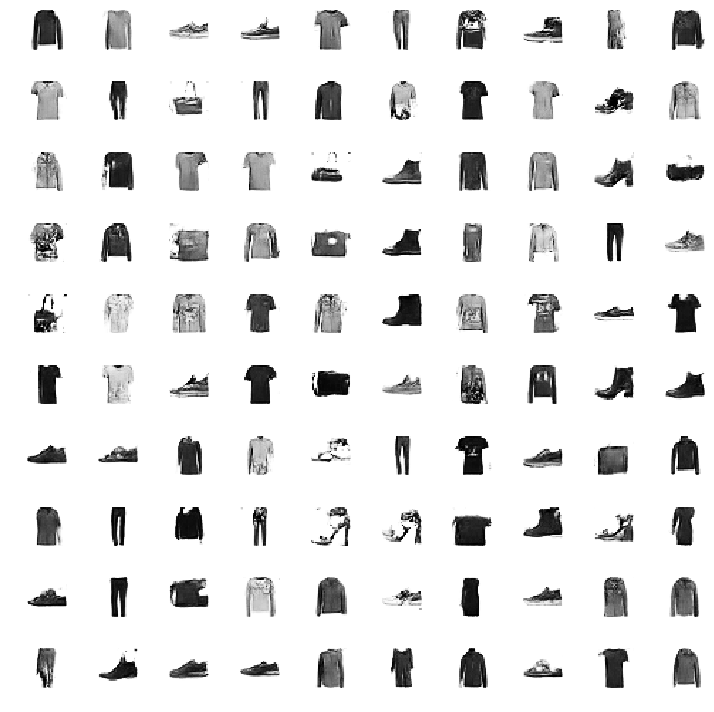

>Saved: conditional-gan_generated_plot_0045.png and conditional-gan_model_0045
>46, 1/468, d1=0.662, d2=0.693 g=0.777
>46, 2/468, d1=0.692, d2=0.686 g=0.758
>46, 3/468, d1=0.696, d2=0.665 g=0.777
>46, 4/468, d1=0.662, d2=0.675 g=0.749
>46, 5/468, d1=0.688, d2=0.711 g=0.789
>46, 6/468, d1=0.667, d2=0.665 g=0.819
>46, 7/468, d1=0.646, d2=0.659 g=0.786
>46, 8/468, d1=0.676, d2=0.693 g=0.797
>46, 9/468, d1=0.694, d2=0.626 g=0.801
>46, 10/468, d1=0.639, d2=0.665 g=0.795
>46, 11/468, d1=0.673, d2=0.642 g=0.779
>46, 12/468, d1=0.705, d2=0.686 g=0.773
>46, 13/468, d1=0.678, d2=0.635 g=0.783
>46, 14/468, d1=0.689, d2=0.665 g=0.766
>46, 15/468, d1=0.653, d2=0.676 g=0.789
>46, 16/468, d1=0.677, d2=0.696 g=0.780
>46, 17/468, d1=0.692, d2=0.632 g=0.813
>46, 18/468, d1=0.637, d2=0.679 g=0.794
>46, 19/468, d1=0.662, d2=0.662 g=0.797
>46, 20/468, d1=0.672, d2=0.641 g=0.810
>46, 21/468, d1=0.716, d2=0.650 g=0.787
>46, 22/468, d1=0.651, d2=0.667 g=0.800
>46, 23/468, d1=0.704, d2=0.675 g=0.797
>46, 24/46

>46, 203/468, d1=0.712, d2=0.642 g=0.784
>46, 204/468, d1=0.676, d2=0.662 g=0.796
>46, 205/468, d1=0.666, d2=0.670 g=0.806
>46, 206/468, d1=0.688, d2=0.660 g=0.763
>46, 207/468, d1=0.658, d2=0.685 g=0.780
>46, 208/468, d1=0.654, d2=0.648 g=0.799
>46, 209/468, d1=0.683, d2=0.639 g=0.803
>46, 210/468, d1=0.658, d2=0.636 g=0.793
>46, 211/468, d1=0.674, d2=0.685 g=0.772
>46, 212/468, d1=0.661, d2=0.674 g=0.797
>46, 213/468, d1=0.677, d2=0.699 g=0.761
>46, 214/468, d1=0.672, d2=0.685 g=0.770
>46, 215/468, d1=0.666, d2=0.727 g=0.806
>46, 216/468, d1=0.683, d2=0.680 g=0.766
>46, 217/468, d1=0.701, d2=0.653 g=0.803
>46, 218/468, d1=0.645, d2=0.672 g=0.791
>46, 219/468, d1=0.638, d2=0.621 g=0.787
>46, 220/468, d1=0.685, d2=0.657 g=0.778
>46, 221/468, d1=0.705, d2=0.700 g=0.778
>46, 222/468, d1=0.659, d2=0.678 g=0.822
>46, 223/468, d1=0.641, d2=0.655 g=0.792
>46, 224/468, d1=0.655, d2=0.655 g=0.783
>46, 225/468, d1=0.666, d2=0.666 g=0.795
>46, 226/468, d1=0.700, d2=0.746 g=0.789
>46, 227/468, d1

>46, 407/468, d1=0.692, d2=0.680 g=0.785
>46, 408/468, d1=0.675, d2=0.687 g=0.784
>46, 409/468, d1=0.662, d2=0.647 g=0.766
>46, 410/468, d1=0.709, d2=0.672 g=0.780
>46, 411/468, d1=0.644, d2=0.653 g=0.781
>46, 412/468, d1=0.692, d2=0.666 g=0.794
>46, 413/468, d1=0.653, d2=0.689 g=0.814
>46, 414/468, d1=0.687, d2=0.662 g=0.814
>46, 415/468, d1=0.677, d2=0.643 g=0.769
>46, 416/468, d1=0.674, d2=0.645 g=0.775
>46, 417/468, d1=0.673, d2=0.680 g=0.799
>46, 418/468, d1=0.702, d2=0.647 g=0.793
>46, 419/468, d1=0.684, d2=0.647 g=0.813
>46, 420/468, d1=0.708, d2=0.657 g=0.794
>46, 421/468, d1=0.696, d2=0.677 g=0.788
>46, 422/468, d1=0.688, d2=0.640 g=0.797
>46, 423/468, d1=0.691, d2=0.642 g=0.774
>46, 424/468, d1=0.690, d2=0.680 g=0.781
>46, 425/468, d1=0.641, d2=0.707 g=0.779
>46, 426/468, d1=0.679, d2=0.671 g=0.743
>46, 427/468, d1=0.657, d2=0.639 g=0.788
>46, 428/468, d1=0.645, d2=0.699 g=0.786
>46, 429/468, d1=0.664, d2=0.686 g=0.776
>46, 430/468, d1=0.658, d2=0.695 g=0.782
>46, 431/468, d1

>47, 147/468, d1=0.694, d2=0.690 g=0.771
>47, 148/468, d1=0.625, d2=0.673 g=0.755
>47, 149/468, d1=0.638, d2=0.652 g=0.793
>47, 150/468, d1=0.669, d2=0.633 g=0.811
>47, 151/468, d1=0.699, d2=0.654 g=0.764
>47, 152/468, d1=0.642, d2=0.648 g=0.789
>47, 153/468, d1=0.641, d2=0.666 g=0.793
>47, 154/468, d1=0.667, d2=0.657 g=0.830
>47, 155/468, d1=0.691, d2=0.700 g=0.829
>47, 156/468, d1=0.700, d2=0.679 g=0.772
>47, 157/468, d1=0.714, d2=0.657 g=0.790
>47, 158/468, d1=0.680, d2=0.664 g=0.815
>47, 159/468, d1=0.665, d2=0.684 g=0.812
>47, 160/468, d1=0.665, d2=0.648 g=0.820
>47, 161/468, d1=0.698, d2=0.654 g=0.808
>47, 162/468, d1=0.684, d2=0.656 g=0.799
>47, 163/468, d1=0.675, d2=0.659 g=0.797
>47, 164/468, d1=0.644, d2=0.696 g=0.799
>47, 165/468, d1=0.701, d2=0.712 g=0.755
>47, 166/468, d1=0.631, d2=0.654 g=0.770
>47, 167/468, d1=0.669, d2=0.645 g=0.805
>47, 168/468, d1=0.667, d2=0.639 g=0.797
>47, 169/468, d1=0.698, d2=0.641 g=0.769
>47, 170/468, d1=0.657, d2=0.655 g=0.810
>47, 171/468, d1

>47, 351/468, d1=0.709, d2=0.666 g=0.800
>47, 352/468, d1=0.652, d2=0.675 g=0.805
>47, 353/468, d1=0.701, d2=0.678 g=0.829
>47, 354/468, d1=0.623, d2=0.621 g=0.828
>47, 355/468, d1=0.656, d2=0.707 g=0.820
>47, 356/468, d1=0.718, d2=0.655 g=0.817
>47, 357/468, d1=0.698, d2=0.655 g=0.795
>47, 358/468, d1=0.643, d2=0.650 g=0.809
>47, 359/468, d1=0.647, d2=0.642 g=0.800
>47, 360/468, d1=0.700, d2=0.682 g=0.786
>47, 361/468, d1=0.696, d2=0.659 g=0.796
>47, 362/468, d1=0.693, d2=0.630 g=0.802
>47, 363/468, d1=0.678, d2=0.657 g=0.804
>47, 364/468, d1=0.716, d2=0.691 g=0.793
>47, 365/468, d1=0.703, d2=0.652 g=0.829
>47, 366/468, d1=0.659, d2=0.636 g=0.800
>47, 367/468, d1=0.704, d2=0.650 g=0.792
>47, 368/468, d1=0.666, d2=0.662 g=0.780
>47, 369/468, d1=0.691, d2=0.656 g=0.769
>47, 370/468, d1=0.673, d2=0.708 g=0.775
>47, 371/468, d1=0.669, d2=0.692 g=0.824
>47, 372/468, d1=0.667, d2=0.700 g=0.787
>47, 373/468, d1=0.655, d2=0.680 g=0.750
>47, 374/468, d1=0.668, d2=0.721 g=0.783
>47, 375/468, d1

>48, 91/468, d1=0.671, d2=0.686 g=0.767
>48, 92/468, d1=0.680, d2=0.647 g=0.774
>48, 93/468, d1=0.646, d2=0.672 g=0.774
>48, 94/468, d1=0.675, d2=0.659 g=0.788
>48, 95/468, d1=0.685, d2=0.706 g=0.799
>48, 96/468, d1=0.647, d2=0.663 g=0.779
>48, 97/468, d1=0.624, d2=0.640 g=0.765
>48, 98/468, d1=0.714, d2=0.686 g=0.773
>48, 99/468, d1=0.665, d2=0.670 g=0.776
>48, 100/468, d1=0.680, d2=0.689 g=0.785
>48, 101/468, d1=0.695, d2=0.623 g=0.762
>48, 102/468, d1=0.644, d2=0.682 g=0.795
>48, 103/468, d1=0.691, d2=0.642 g=0.765
>48, 104/468, d1=0.664, d2=0.660 g=0.811
>48, 105/468, d1=0.654, d2=0.648 g=0.778
>48, 106/468, d1=0.640, d2=0.667 g=0.788
>48, 107/468, d1=0.668, d2=0.672 g=0.783
>48, 108/468, d1=0.717, d2=0.676 g=0.770
>48, 109/468, d1=0.673, d2=0.674 g=0.807
>48, 110/468, d1=0.688, d2=0.674 g=0.793
>48, 111/468, d1=0.673, d2=0.679 g=0.789
>48, 112/468, d1=0.672, d2=0.667 g=0.796
>48, 113/468, d1=0.671, d2=0.656 g=0.776
>48, 114/468, d1=0.680, d2=0.684 g=0.782
>48, 115/468, d1=0.655, d

>48, 295/468, d1=0.666, d2=0.637 g=0.797
>48, 296/468, d1=0.717, d2=0.674 g=0.765
>48, 297/468, d1=0.660, d2=0.673 g=0.772
>48, 298/468, d1=0.679, d2=0.648 g=0.812
>48, 299/468, d1=0.714, d2=0.659 g=0.795
>48, 300/468, d1=0.632, d2=0.709 g=0.806
>48, 301/468, d1=0.661, d2=0.680 g=0.765
>48, 302/468, d1=0.651, d2=0.645 g=0.805
>48, 303/468, d1=0.668, d2=0.644 g=0.808
>48, 304/468, d1=0.609, d2=0.632 g=0.814
>48, 305/468, d1=0.647, d2=0.700 g=0.771
>48, 306/468, d1=0.679, d2=0.671 g=0.780
>48, 307/468, d1=0.693, d2=0.659 g=0.764
>48, 308/468, d1=0.697, d2=0.660 g=0.784
>48, 309/468, d1=0.669, d2=0.673 g=0.792
>48, 310/468, d1=0.672, d2=0.699 g=0.761
>48, 311/468, d1=0.628, d2=0.676 g=0.780
>48, 312/468, d1=0.664, d2=0.663 g=0.774
>48, 313/468, d1=0.649, d2=0.674 g=0.818
>48, 314/468, d1=0.671, d2=0.688 g=0.782
>48, 315/468, d1=0.669, d2=0.674 g=0.777
>48, 316/468, d1=0.653, d2=0.645 g=0.785
>48, 317/468, d1=0.667, d2=0.638 g=0.774
>48, 318/468, d1=0.680, d2=0.626 g=0.790
>48, 319/468, d1

>49, 29/468, d1=0.649, d2=0.671 g=0.802
>49, 30/468, d1=0.660, d2=0.674 g=0.781
>49, 31/468, d1=0.665, d2=0.624 g=0.822
>49, 32/468, d1=0.672, d2=0.628 g=0.792
>49, 33/468, d1=0.694, d2=0.669 g=0.755
>49, 34/468, d1=0.660, d2=0.651 g=0.812
>49, 35/468, d1=0.662, d2=0.681 g=0.774
>49, 36/468, d1=0.647, d2=0.629 g=0.779
>49, 37/468, d1=0.636, d2=0.707 g=0.795
>49, 38/468, d1=0.693, d2=0.664 g=0.746
>49, 39/468, d1=0.679, d2=0.647 g=0.774
>49, 40/468, d1=0.644, d2=0.645 g=0.808
>49, 41/468, d1=0.678, d2=0.642 g=0.796
>49, 42/468, d1=0.630, d2=0.656 g=0.784
>49, 43/468, d1=0.658, d2=0.678 g=0.773
>49, 44/468, d1=0.639, d2=0.681 g=0.797
>49, 45/468, d1=0.644, d2=0.676 g=0.795
>49, 46/468, d1=0.701, d2=0.643 g=0.788
>49, 47/468, d1=0.727, d2=0.679 g=0.763
>49, 48/468, d1=0.683, d2=0.641 g=0.772
>49, 49/468, d1=0.655, d2=0.676 g=0.799
>49, 50/468, d1=0.633, d2=0.693 g=0.797
>49, 51/468, d1=0.648, d2=0.687 g=0.787
>49, 52/468, d1=0.692, d2=0.660 g=0.788
>49, 53/468, d1=0.678, d2=0.666 g=0.787


>49, 233/468, d1=0.719, d2=0.672 g=0.763
>49, 234/468, d1=0.641, d2=0.685 g=0.783
>49, 235/468, d1=0.696, d2=0.661 g=0.788
>49, 236/468, d1=0.654, d2=0.701 g=0.771
>49, 237/468, d1=0.651, d2=0.671 g=0.792
>49, 238/468, d1=0.656, d2=0.685 g=0.794
>49, 239/468, d1=0.666, d2=0.637 g=0.774
>49, 240/468, d1=0.702, d2=0.648 g=0.788
>49, 241/468, d1=0.677, d2=0.654 g=0.797
>49, 242/468, d1=0.682, d2=0.649 g=0.801
>49, 243/468, d1=0.690, d2=0.657 g=0.835
>49, 244/468, d1=0.696, d2=0.674 g=0.792
>49, 245/468, d1=0.640, d2=0.682 g=0.750
>49, 246/468, d1=0.662, d2=0.647 g=0.801
>49, 247/468, d1=0.735, d2=0.647 g=0.835
>49, 248/468, d1=0.646, d2=0.631 g=0.816
>49, 249/468, d1=0.665, d2=0.679 g=0.781
>49, 250/468, d1=0.667, d2=0.679 g=0.816
>49, 251/468, d1=0.666, d2=0.697 g=0.819
>49, 252/468, d1=0.644, d2=0.648 g=0.837
>49, 253/468, d1=0.664, d2=0.601 g=0.898
>49, 254/468, d1=0.691, d2=0.640 g=0.791
>49, 255/468, d1=0.664, d2=0.715 g=0.784
>49, 256/468, d1=0.702, d2=0.676 g=0.805
>49, 257/468, d1

>49, 437/468, d1=0.697, d2=0.665 g=0.806
>49, 438/468, d1=0.616, d2=0.653 g=0.801
>49, 439/468, d1=0.634, d2=0.666 g=0.791
>49, 440/468, d1=0.645, d2=0.674 g=0.798
>49, 441/468, d1=0.703, d2=0.638 g=0.804
>49, 442/468, d1=0.680, d2=0.665 g=0.769
>49, 443/468, d1=0.648, d2=0.646 g=0.791
>49, 444/468, d1=0.690, d2=0.686 g=0.812
>49, 445/468, d1=0.693, d2=0.697 g=0.759
>49, 446/468, d1=0.659, d2=0.667 g=0.781
>49, 447/468, d1=0.717, d2=0.652 g=0.778
>49, 448/468, d1=0.691, d2=0.700 g=0.840
>49, 449/468, d1=0.680, d2=0.649 g=0.863
>49, 450/468, d1=0.715, d2=0.737 g=0.763
>49, 451/468, d1=0.700, d2=0.665 g=0.779
>49, 452/468, d1=0.686, d2=0.641 g=0.821
>49, 453/468, d1=0.674, d2=0.607 g=0.841
>49, 454/468, d1=0.688, d2=0.652 g=0.841
>49, 455/468, d1=0.643, d2=0.711 g=0.764
>49, 456/468, d1=0.698, d2=0.718 g=0.794
>49, 457/468, d1=0.680, d2=0.644 g=0.870
>49, 458/468, d1=0.735, d2=0.641 g=0.799
>49, 459/468, d1=0.649, d2=0.641 g=0.784
>49, 460/468, d1=0.666, d2=0.695 g=0.742
>49, 461/468, d1

>50, 177/468, d1=0.695, d2=0.677 g=0.775
>50, 178/468, d1=0.673, d2=0.684 g=0.784
>50, 179/468, d1=0.653, d2=0.665 g=0.821
>50, 180/468, d1=0.694, d2=0.635 g=0.782
>50, 181/468, d1=0.678, d2=0.664 g=0.800
>50, 182/468, d1=0.698, d2=0.701 g=0.798
>50, 183/468, d1=0.675, d2=0.662 g=0.749
>50, 184/468, d1=0.690, d2=0.723 g=0.784
>50, 185/468, d1=0.684, d2=0.688 g=0.779
>50, 186/468, d1=0.705, d2=0.606 g=0.807
>50, 187/468, d1=0.652, d2=0.678 g=0.797
>50, 188/468, d1=0.665, d2=0.697 g=0.771
>50, 189/468, d1=0.662, d2=0.670 g=0.803
>50, 190/468, d1=0.667, d2=0.642 g=0.770
>50, 191/468, d1=0.625, d2=0.664 g=0.767
>50, 192/468, d1=0.691, d2=0.671 g=0.780
>50, 193/468, d1=0.637, d2=0.672 g=0.785
>50, 194/468, d1=0.685, d2=0.655 g=0.819
>50, 195/468, d1=0.663, d2=0.675 g=0.788
>50, 196/468, d1=0.653, d2=0.653 g=0.816
>50, 197/468, d1=0.684, d2=0.702 g=0.772
>50, 198/468, d1=0.639, d2=0.689 g=0.786
>50, 199/468, d1=0.671, d2=0.667 g=0.783
>50, 200/468, d1=0.672, d2=0.655 g=0.791
>50, 201/468, d1

>50, 381/468, d1=0.695, d2=0.664 g=0.761
>50, 382/468, d1=0.686, d2=0.671 g=0.793
>50, 383/468, d1=0.660, d2=0.724 g=0.780
>50, 384/468, d1=0.665, d2=0.726 g=0.774
>50, 385/468, d1=0.688, d2=0.714 g=0.792
>50, 386/468, d1=0.711, d2=0.637 g=0.813
>50, 387/468, d1=0.695, d2=0.663 g=0.801
>50, 388/468, d1=0.697, d2=0.613 g=0.788
>50, 389/468, d1=0.679, d2=0.649 g=0.782
>50, 390/468, d1=0.674, d2=0.687 g=0.758
>50, 391/468, d1=0.663, d2=0.650 g=0.780
>50, 392/468, d1=0.661, d2=0.666 g=0.774
>50, 393/468, d1=0.696, d2=0.688 g=0.772
>50, 394/468, d1=0.669, d2=0.670 g=0.770
>50, 395/468, d1=0.666, d2=0.678 g=0.820
>50, 396/468, d1=0.661, d2=0.646 g=0.782
>50, 397/468, d1=0.710, d2=0.651 g=0.774
>50, 398/468, d1=0.699, d2=0.717 g=0.792
>50, 399/468, d1=0.669, d2=0.654 g=0.795
>50, 400/468, d1=0.682, d2=0.653 g=0.792
>50, 401/468, d1=0.736, d2=0.688 g=0.761
>50, 402/468, d1=0.678, d2=0.696 g=0.780
>50, 403/468, d1=0.712, d2=0.682 g=0.807
>50, 404/468, d1=0.624, d2=0.646 g=0.773
>50, 405/468, d1

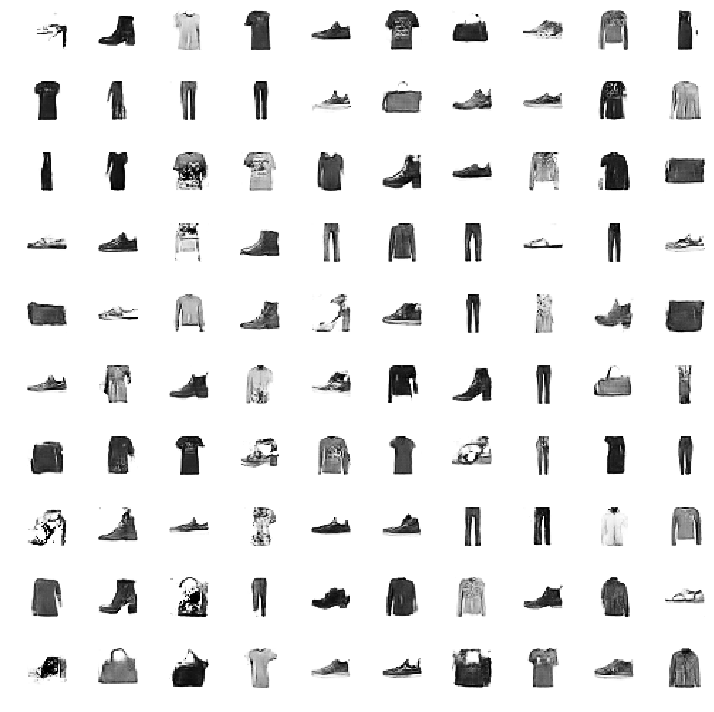

>Saved: conditional-gan_generated_plot_0050.png and conditional-gan_model_0050


In [9]:
# train model
fashion_conditional_gan.train(X, y, n_epochs=50, reporting_period=5)

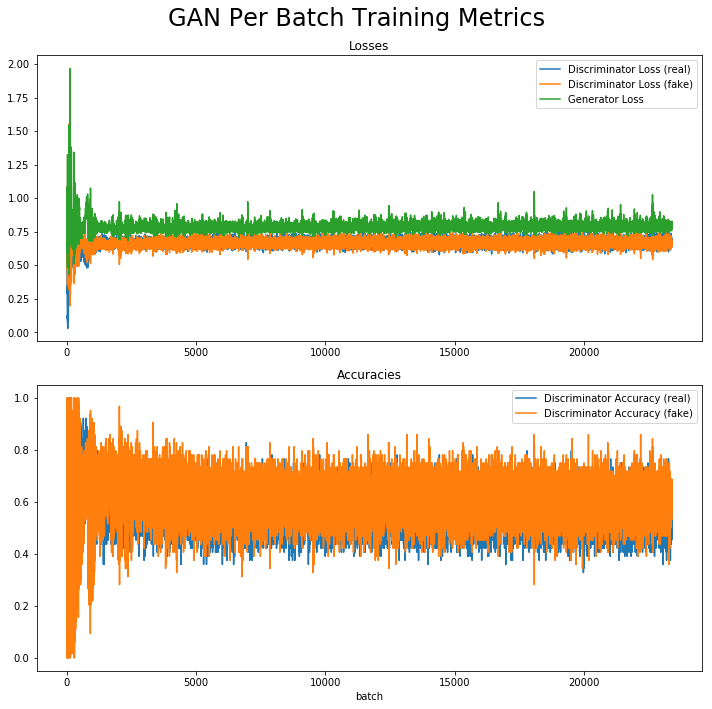

In [10]:
fashion_conditional_gan.plot_training_metrics()

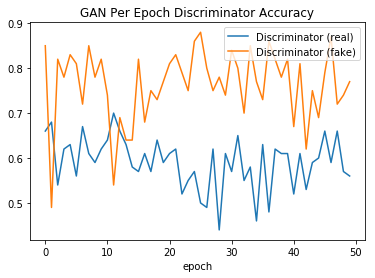

In [11]:
fashion_conditional_gan.plot_discriminator_accuracies()

## Evaluation
Show some plots for the different classes

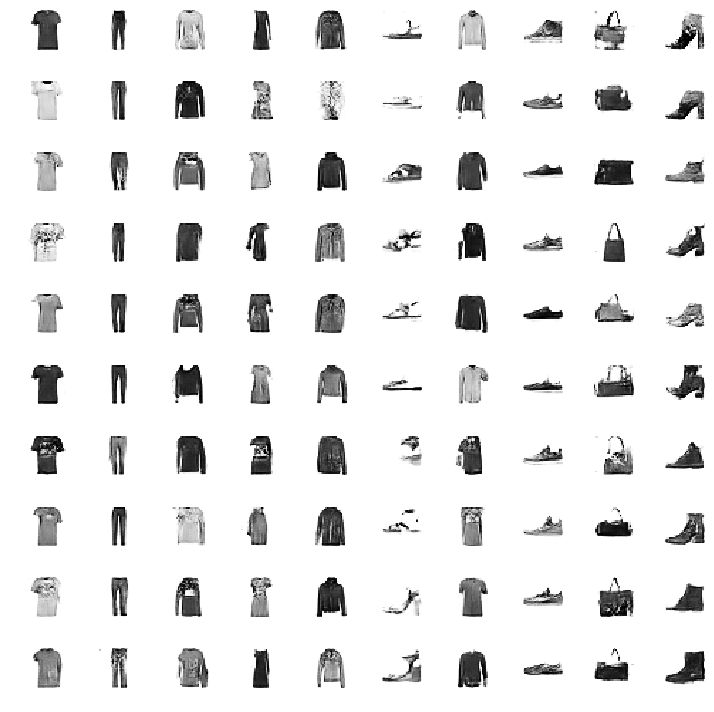

In [12]:
# generate latent points
latent_points, _ = fashion_conditional_gan.generate_latent_points(100)
# specify specific labels
labels = np.asarray([x for _ in range(10) for x in range(10)])

# generate images
X = fashion_conditional_gan.generator_prediction(latent_points, labels)
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0

# plot the result
fashion_conditional_gan.grid_plot(X)